# Maestría en Ciencia de Datos - Proyecto de Aprendizaje Supervisado
## Integrantes

- Alejandra Ruiz 
- Daniel Martinez
- Juan Vergara
- Felipe Montenegro

Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de clasificación. Además, utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

### 1. Librerías a básicas utilizar

In [172]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### 2. Diccionario de datos

- country / city
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target



### 3. Lectura de los datos

Capturamos los datos a partir de un archivo csv. Al no tener los nombres de las columnas pero sí un diccionario de datos, renombramos al momento de obtener el dataframe.

In [173]:
df = pd.read_csv('DatosCorazon.csv',names=[
	'country',
	'age',
	'sex',
	'chest_pain_type',
	'resting_blood_pressure',
	'serum_cholestoral',
	'fasting_blood_sugar',
	'resting_electrocardiographic_results',
	'maximum_heart_rate_achieved',
	'exercise_induced_angina',
	'oldpeak',
	'the_slope_of_the_peak_exercise_ST_segment',
	'number_of_major_vessels',
	'thal',
	'target',
],index_col=False, delimiter=';')
df

country   age  sex  chest_pain_type resting_blood_pressure  \
0    Cleveland  63.0    1                1                  145.0   
1    Cleveland  67.0    1                4                  160.0   
2    Cleveland  67.0    1                4                  120.0   
3    Cleveland  37.0    1                3                  130.0   
4    Cleveland  41.0    0                2                  130.0   
..         ...   ...  ...              ...                    ...   
715      Suiza  70.0    1                4                    115   
716      Suiza  70.0    1                4                    140   
717      Suiza  72.0    1                3                    160   
718      Suiza  73.0    0                3                    160   
719      Suiza  74.0    1                2                    145   

    serum_cholestoral fasting_blood_sugar  \
0               233.0                   1   
1               286.0                   0   
2               229.0                   0   
3               250.0                   0   
4               204.0                   0   
..                ...                 ...   
715                 0                   0   
716                 0                   1   
717                 0                   ?   
718                 0                   0   
719                 0                   ?   

    resting_electrocardiographic_results maximum_heart_rate_achieved  \
0                                      2                       150.0   
1                                      2                       108.0   
2                                      2                       129.0   
3                                      0                       187.0   
4                                      2                       172.0   
..                                   ...                         ...   
715                                    1                          92   
716                                    0                         157   
717                                    2                         114   
718                                    1                         121   
719                                    1                         123   

    exercise_induced_angina oldpeak the_slope_of_the_peak_exercise_ST_segment  \
0                         0     2.3                                         3   
1                         1     1.5                                         2   
2                         1     2.6                                         2   
3                         0     3.5                                         3   
4                         0     1.4                                         1   
..                      ...     ...                                       ...   
715                       1       0                                         2   
716                       1       2                                         2   
717                       0     1.6                                         2   
718                       0       0                                         1   
719                       0     1.3                                         1   

    number_of_major_vessels thal  target  
0                         0    6       0  
1                         3    3       2  
2                         2    7       1  
3                         0    3       0  
4                         0    3       0  
..                      ...  ...     ...  
715                       ?    7       1  
716                       ?    7       3  
717                       2    ?       0  
718                       ?    3       1  
719                       ?    ?       1  

[720 rows x 15 columns]

### 4. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

In [174]:
df.columns

Index(['country', 'age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak',
       'the_slope_of_the_peak_exercise_ST_segment', 'number_of_major_vessels',
       'thal', 'target'],
      dtype='object')

### 4.1 Limpieza de datos

### Valores faltantes y tipos de datos

Vamos a revisar los datos faltantes (explícitos e implícitos)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    720 non-null    object 
 1   age                                        720 non-null    float64
 2   sex                                        720 non-null    int64  
 3   chest_pain_type                            720 non-null    int64  
 4   resting_blood_pressure                     720 non-null    object 
 5   serum_cholestoral                          720 non-null    object 
 6   fasting_blood_sugar                        720 non-null    object 
 7   resting_electrocardiographic_results       720 non-null    object 
 8   maximum_heart_rate_achieved                720 non-null    object 
 9   exercise_induced_angina                    720 non-null    object 
 10  oldpeak                   

In [176]:
df.isnull().sum()

country                                      0
age                                          0
sex                                          0
chest_pain_type                              0
resting_blood_pressure                       0
serum_cholestoral                            0
fasting_blood_sugar                          0
resting_electrocardiographic_results         0
maximum_heart_rate_achieved                  0
exercise_induced_angina                      0
oldpeak                                      0
the_slope_of_the_peak_exercise_ST_segment    0
number_of_major_vessels                      0
thal                                         0
target                                       0
dtype: int64

Al revisar los datos básicos observamos que a primera vista no existen datos faltantes. 

In [177]:
df.head()

country   age  sex  chest_pain_type resting_blood_pressure  \
0  Cleveland  63.0    1                1                  145.0   
1  Cleveland  67.0    1                4                  160.0   
2  Cleveland  67.0    1                4                  120.0   
3  Cleveland  37.0    1                3                  130.0   
4  Cleveland  41.0    0                2                  130.0   

  serum_cholestoral fasting_blood_sugar resting_electrocardiographic_results  \
0             233.0                   1                                    2   
1             286.0                   0                                    2   
2             229.0                   0                                    2   
3             250.0                   0                                    0   
4             204.0                   0                                    2   

  maximum_heart_rate_achieved exercise_induced_angina oldpeak  \
0                       150.0                       0     2.3   
1                       108.0                       1     1.5   
2                       129.0                       1     2.6   
3                       187.0                       0     3.5   
4                       172.0                       0     1.4   

  the_slope_of_the_peak_exercise_ST_segment number_of_major_vessels thal  \
0                                         3                       0    6   
1                                         2                       3    3   
2                                         2                       2    7   
3                                         3                       0    3   
4                                         1                       0    3   

   target  
0       0  
1       2  
2       1  
3       0  
4       0

Pero, tan sólo al analizar los primeros registros del dataset (e.g. normalized_losses), nos damos cuenta de datos con valores = ?. Esto, claramente, puede indicar datos faltantes. Para ratificar esta sospecha, tenemos que mirar en que columnas pueden estar apareciendo estos valores.

In [178]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en country con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en serum_cholestoral con el valor ?
Existen 83 valores en fasting_blood_sugar con el valor ?
Existen 2 valores en resting_electrocardiographic_results con el valor ?
Existen 2 valores en maximum_heart_rate_achieved con el valor ?
Existen 2 valores en exercise_induced_angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en the_slope_of_the_peak_exercise_ST_segment con el valor ?
Existen 413 valores en number_of_major_vessels con el valor ?
Existen 320 valores en thal con el valor ?


- Contamos, de todas las variables de tipo objeto (pues son las únicas que pueden contener un valor ?), contamos los valores en los que un valor ? aparece.

- A partir de los resutados podemos observar que existen 10 variables con valores de este tipo.

- Cambiaremos los valores ? por nan, pero primero revisaremos tipos de datos inadecuados para todas las variables del dataset.


In [179]:
df.dtypes

country                                       object
age                                          float64
sex                                            int64
chest_pain_type                                int64
resting_blood_pressure                        object
serum_cholestoral                             object
fasting_blood_sugar                           object
resting_electrocardiographic_results          object
maximum_heart_rate_achieved                   object
exercise_induced_angina                       object
oldpeak                                       object
the_slope_of_the_peak_exercise_ST_segment     object
number_of_major_vessels                       object
thal                                          object
target                                         int64
dtype: object

Antes de meternos la limpieza de datos debemos ver como están distribuidas las categorías de la clase objetivo target. Es importante conocer si nuestro conjunto de datos se encuentra balanceado o no.

<Axes: xlabel='target', ylabel='count'>

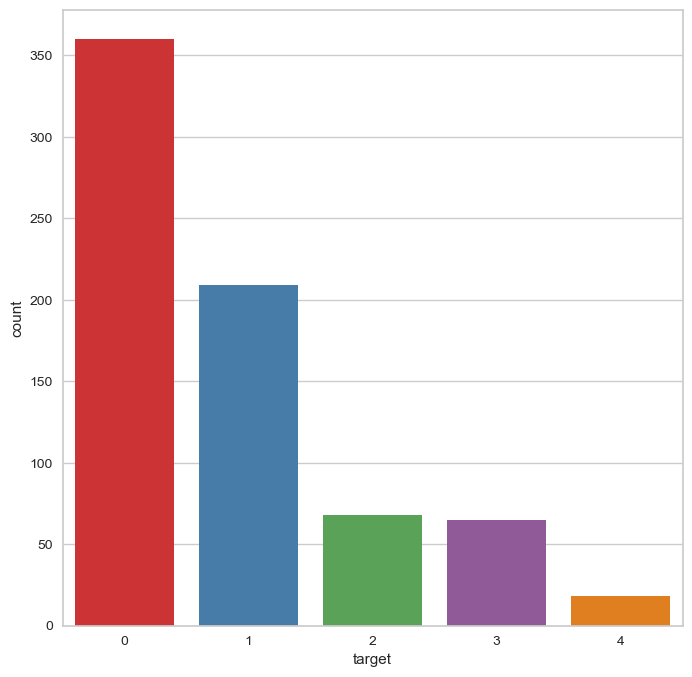

In [180]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=df, palette = "Set1")

Construímos una tabla para ver las cantidades para cada categoría

In [181]:
pd.crosstab(index=df["target"], columns="count")

col_0   count
target       
0         360
1         209
2          68
3          65
4          18

Creamos una función para cambiar los tipos de las variables independientes. Igualmente hacemos uso de un diccionario para transformar nuestros valores categóricos ordinales a numéricos.

In [182]:
# # Creamos un Transformer personalizado formatea la variable objetivo
# # Agrupamos valores con riesgo negativo
# # Convertimos el tipo de la variable objetivo a categórica

from sklearn.base import BaseEstimator, TransformerMixin

class Format_target(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result.loc[(result['target'] < 0), "target"] = -1
        result['target'] = result['target'].astype(int).astype(str)
        return result

In [183]:
df['target'] = df['target'].astype(str)
df['sex'] = df['sex'].astype(str)
df['chest_pain_type'] = df['chest_pain_type'].astype(str)

In [184]:
# df_modified = Format_target().fit_transform(df)

In [185]:
# plt.figure(figsize=(8,8))
# # sns.countplot(x='target',data=df_modified, palette='Set1')

In [186]:
# # Vemos la tabla luego del cambio

# pd.crosstab(index=df_modified["symboling"], columns="count")


In [187]:
# df_modified['symboling'][df_modified['symboling'] == '0'].count()/df.shape[0]*100

In [188]:
len(df[df['number_of_major_vessels'] == '?'])

413

Ahora trabajaremos con los problemas encontrados en las variables independientes con respecto a valores que podrían ser faltantes y tipos de datos distintos a los indicados en el diccionario de datos.

In [189]:
def convert(df,columns,val):
    result = df.copy()
    for col in columns:
        result[col] = result[col].astype(val)
    return result


In [190]:
obj_columns = df.columns[~df.columns.isin(['country',
                                           'sex',
                                           'chest_pain_type',
                                           'fasting_blood_sugar',
                                           'number_of_major_vessels', 
                                           'target', 
                                           'exercise_induced_angina', 
                                           'the_slope_of_the_peak_exercise_ST_segment',
                                           'resting_electrocardiographic_results',
                                           'thal'])]
obj_columns

Index(['age', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved', 'oldpeak'],
      dtype='object')

In [191]:
# Creamos un Transformer personalizado que nos cambia los valores ? por nulos
# Igualmente nos modifica los tipos de variables errados
from sklearn.base import BaseEstimator, TransformerMixin


class Format_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.replace('?',np.nan)
        result = convert(result,obj_columns ,'float64')
        return result

In [192]:
df_modified = Format_variables().fit_transform(df)

In [193]:
# Verificamos que los tipos de datos son los correctos
# Asimismo nos damos cuenta que ahora sí tenemos datos faltantes
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    720 non-null    object 
 1   age                                        720 non-null    float64
 2   sex                                        720 non-null    object 
 3   chest_pain_type                            720 non-null    object 
 4   resting_blood_pressure                     717 non-null    float64
 5   serum_cholestoral                          697 non-null    float64
 6   fasting_blood_sugar                        637 non-null    object 
 7   resting_electrocardiographic_results       718 non-null    object 
 8   maximum_heart_rate_achieved                718 non-null    float64
 9   exercise_induced_angina                    718 non-null    object 
 10  oldpeak                   

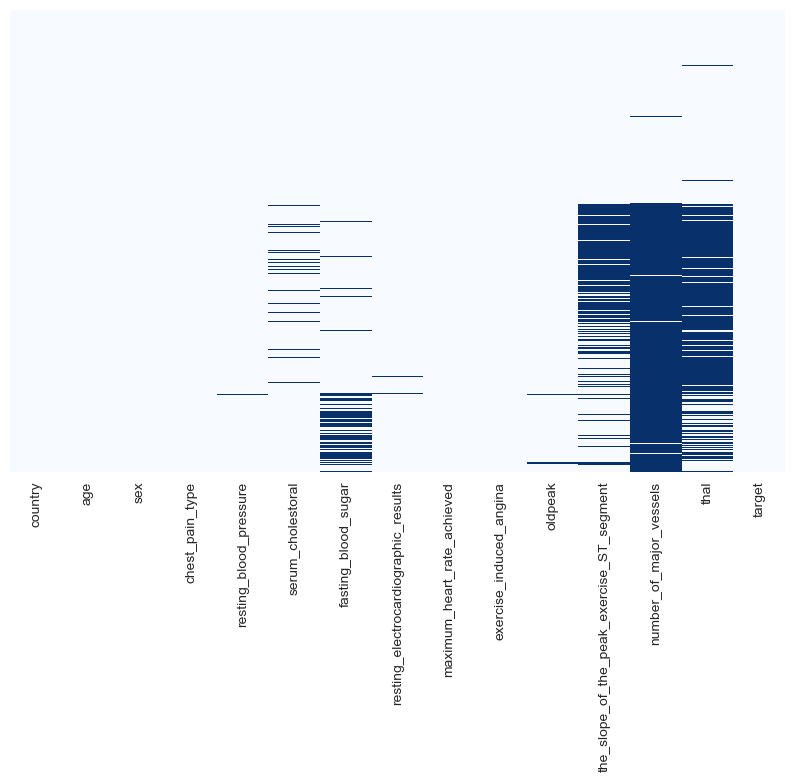

In [194]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_modified.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

(se imputan los datos, pero segun nuestro criterio creemos más apropiado la eliminación de la columna completamente 👍)

In [195]:
df_modified.isnull().sum()

country                                        0
age                                            0
sex                                            0
chest_pain_type                                0
resting_blood_pressure                         3
serum_cholestoral                             23
fasting_blood_sugar                           83
resting_electrocardiographic_results           2
maximum_heart_rate_achieved                    2
exercise_induced_angina                        2
oldpeak                                        6
the_slope_of_the_peak_exercise_ST_segment    207
number_of_major_vessels                      413
thal                                         320
target                                         0
dtype: int64

In [196]:
df_modified

country   age sex chest_pain_type  resting_blood_pressure  \
0    Cleveland  63.0   1               1                   145.0   
1    Cleveland  67.0   1               4                   160.0   
2    Cleveland  67.0   1               4                   120.0   
3    Cleveland  37.0   1               3                   130.0   
4    Cleveland  41.0   0               2                   130.0   
..         ...   ...  ..             ...                     ...   
715      Suiza  70.0   1               4                   115.0   
716      Suiza  70.0   1               4                   140.0   
717      Suiza  72.0   1               3                   160.0   
718      Suiza  73.0   0               3                   160.0   
719      Suiza  74.0   1               2                   145.0   

     serum_cholestoral fasting_blood_sugar  \
0                233.0                   1   
1                286.0                   0   
2                229.0                   0   
3                250.0                   0   
4                204.0                   0   
..                 ...                 ...   
715                0.0                   0   
716                0.0                   1   
717                0.0                 NaN   
718                0.0                   0   
719                0.0                 NaN   

    resting_electrocardiographic_results  maximum_heart_rate_achieved  \
0                                      2                        150.0   
1                                      2                        108.0   
2                                      2                        129.0   
3                                      0                        187.0   
4                                      2                        172.0   
..                                   ...                          ...   
715                                    1                         92.0   
716                                    0                        157.0   
717                                    2                        114.0   
718                                    1                        121.0   
719                                    1                        123.0   

    exercise_induced_angina  oldpeak  \
0                         0      2.3   
1                         1      1.5   
2                         1      2.6   
3                         0      3.5   
4                         0      1.4   
..                      ...      ...   
715                       1      0.0   
716                       1      2.0   
717                       0      1.6   
718                       0      0.0   
719                       0      1.3   

    the_slope_of_the_peak_exercise_ST_segment number_of_major_vessels thal  \
0                                           3                       0    6   
1                                           2                       3    3   
2                                           2                       2    7   
3                                           3                       0    3   
4                                           1                       0    3   
..                                        ...                     ...  ...   
715                                         2                     NaN    7   
716                                         2                     NaN    7   
717                                         2                       2  NaN   
718                                         1                     NaN    3   
719                                         1                     NaN  NaN   

    target  
0        0  
1        2  
2        1  
3        0  
4        0  
..     ...  
715      1  
716      3  
717      0  
718      1  
719      1  

[720 rows x 15 columns]

In [197]:
# Creamos un Transformer personalizado que nos imputa los valores faltantes
# Utiliza la media para columnas numéricas y la moda para las categóricas
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, cont, cat):
        self.cont = cont
        self.cat = cat

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for c in self.cont:
            avg = result[c].mean(axis=0)
            result[c].replace(np.nan,avg,inplace=True)
        for c in self.cat:
            mode = result[c].value_counts().idxmax()
            result[c].replace(np.nan,mode,inplace=True)
        return result

In [198]:
# get float values
cont = df_modified.select_dtypes(include=['float64']).columns
# get object values
cat = df_modified.select_dtypes(include=['object']).columns

In [199]:
df_modified = Imputer(cont,cat).fit_transform(df_modified)

In [200]:
df_modified.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    720 non-null    object 
 1   age                                        720 non-null    float64
 2   sex                                        720 non-null    object 
 3   chest_pain_type                            720 non-null    object 
 4   resting_blood_pressure                     720 non-null    float64
 5   serum_cholestoral                          720 non-null    float64
 6   fasting_blood_sugar                        720 non-null    object 
 7   resting_electrocardiographic_results       720 non-null    object 
 8   maximum_heart_rate_achieved                720 non-null    float64
 9   exercise_induced_angina                    720 non-null    object 
 10  oldpeak                   

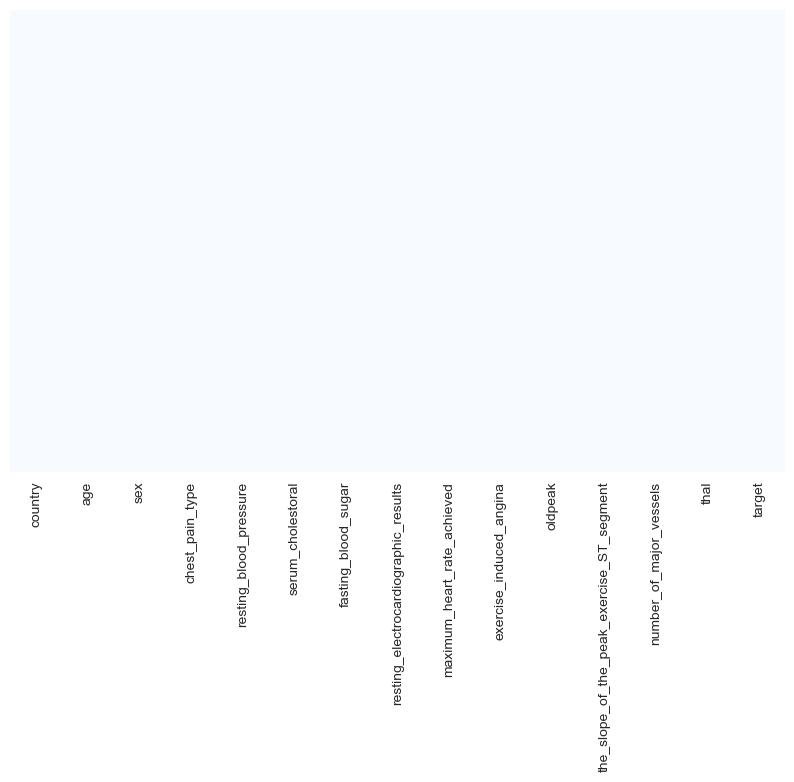

In [201]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df_modified.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Observamos que ya no contamos con valores faltantes.

### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [202]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

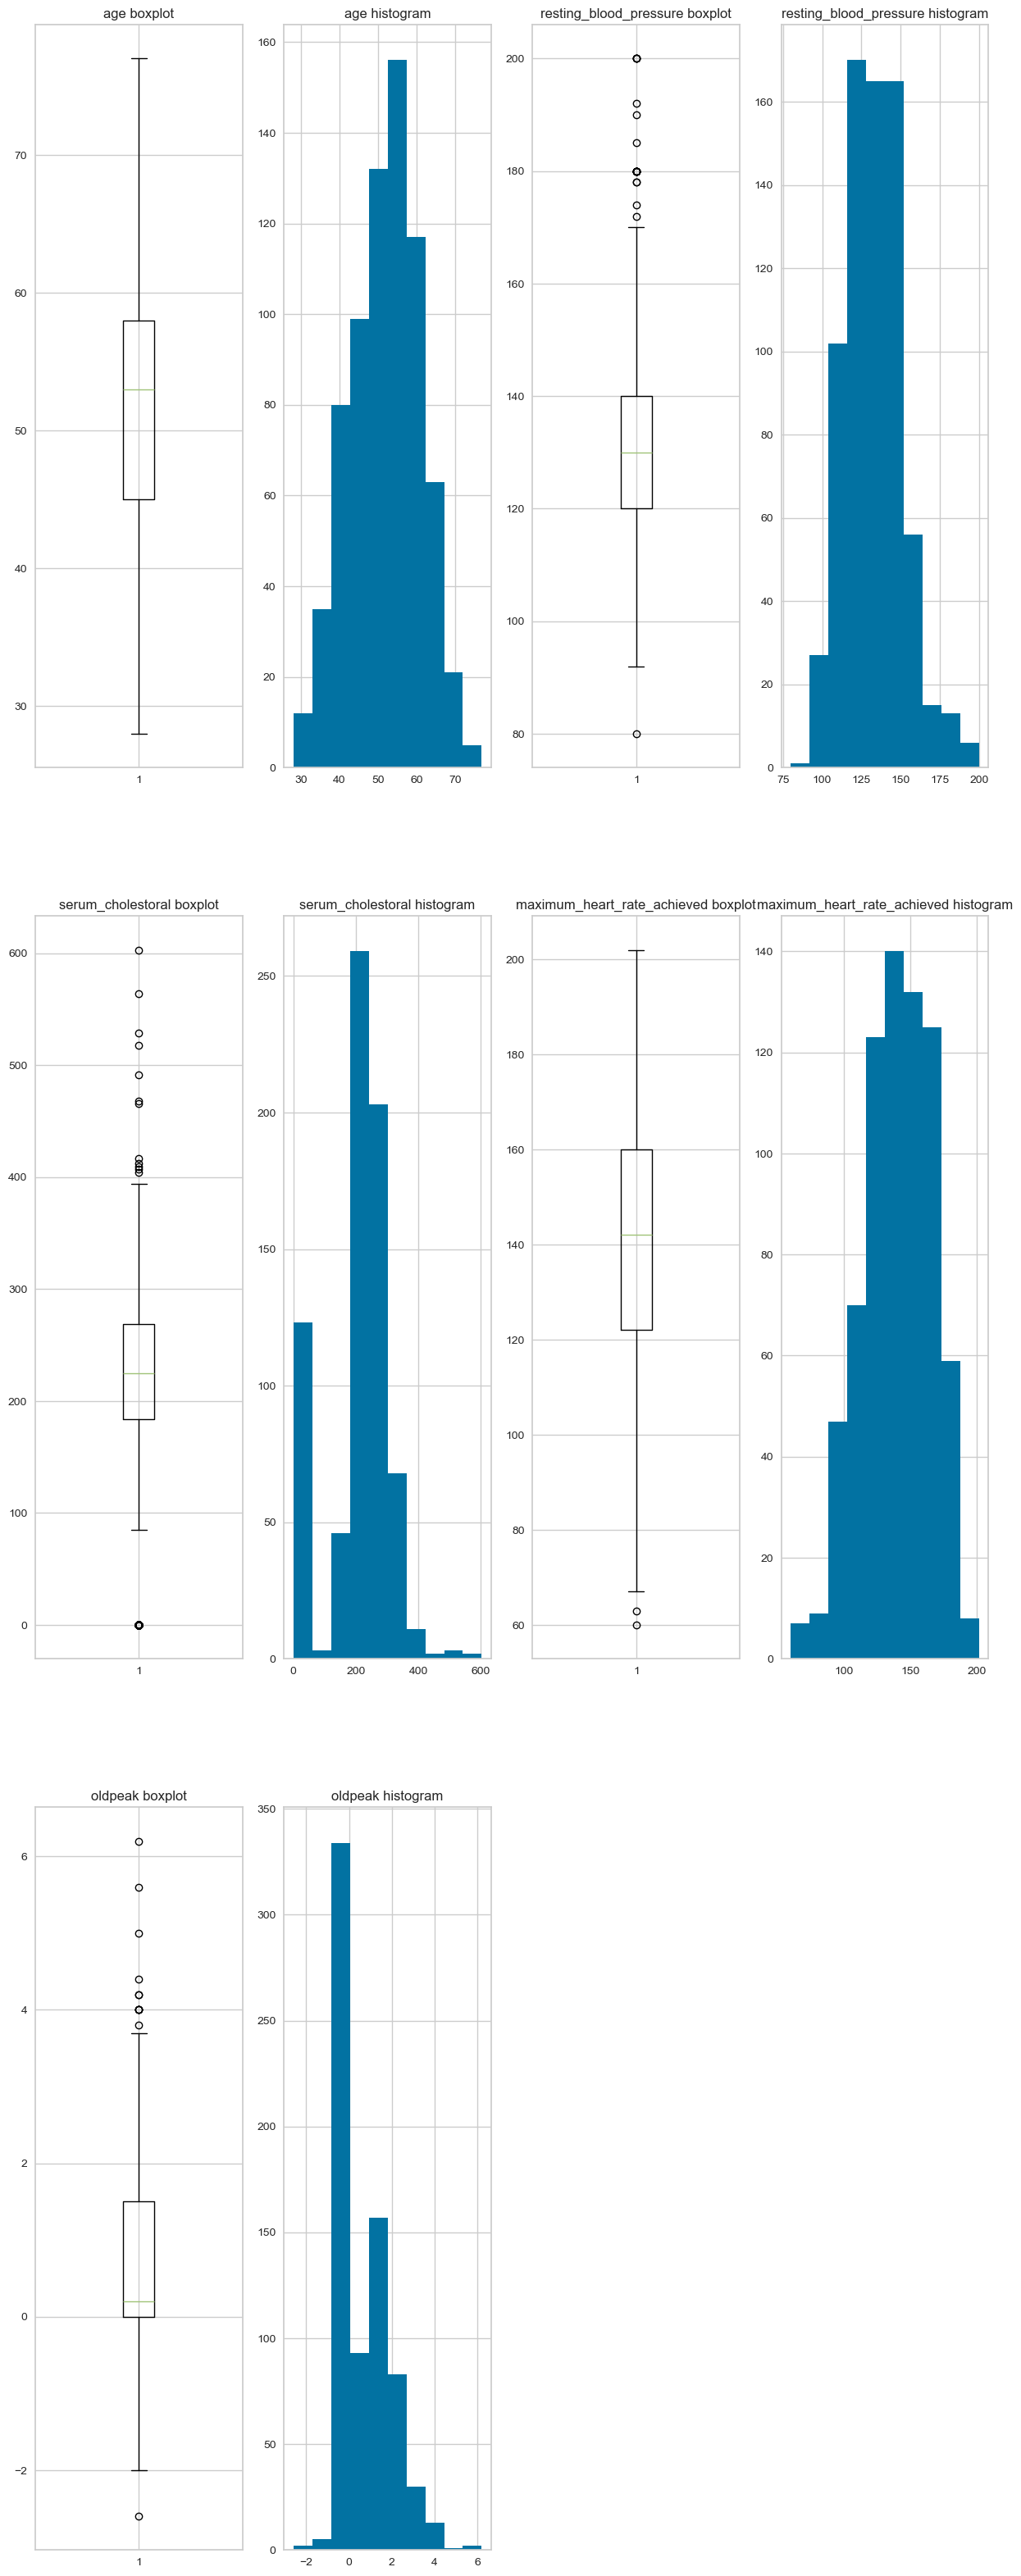

In [203]:
outliers_visual(df_modified)

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que existen outliers para algunas de las variables dentro del dataset:

- resting_blood_preasure
- serum_cholestoral
- oldpeak
- maximum_heart_rate_achieved

Podemos corroborar lo anterior de manera estadística haciendo uso del método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil)

In [204]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [205]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df_modified.select_dtypes('number').columns):
    if outlier_count(col, df_modified) > 0:
        cont_vars.append(col)

---------------age---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------resting_blood_pressure---------------
Number of outliers: 22
Percent of data that is outlier: 3.06%
---------------serum_cholestoral---------------
Number of outliers: 135
Percent of data that is outlier: 18.75%
---------------maximum_heart_rate_achieved---------------
Number of outliers: 2
Percent of data that is outlier: 0.28%
---------------oldpeak---------------
Number of outliers: 12
Percent of data that is outlier: 1.67%


Teniendo en cuenta los gráficos previos y los estadísticos, se puede ver que existen cantidades diferentes de outliers para cada variable y hacia diferentes direcciones. Limitaremos a través de winsorizing

In [206]:
len(cont_vars)

4

In [207]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

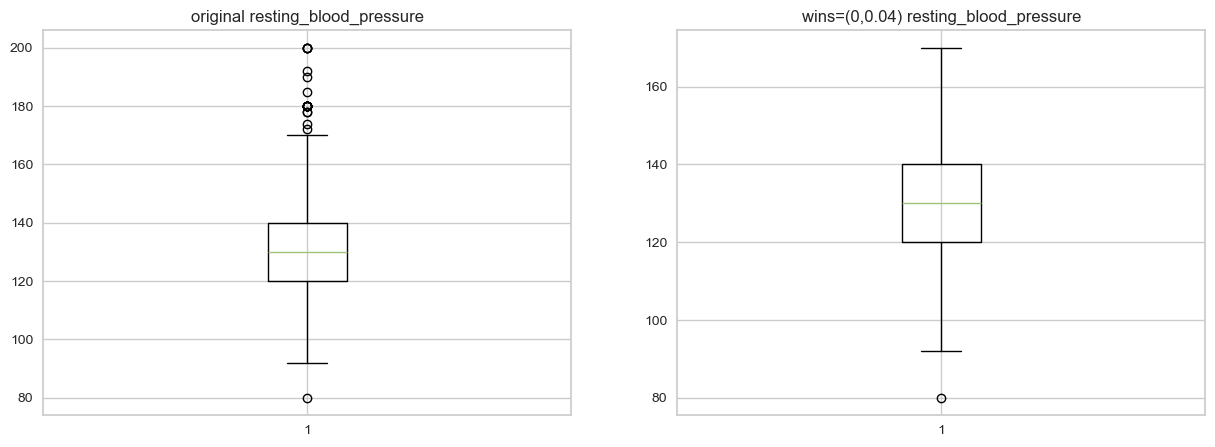

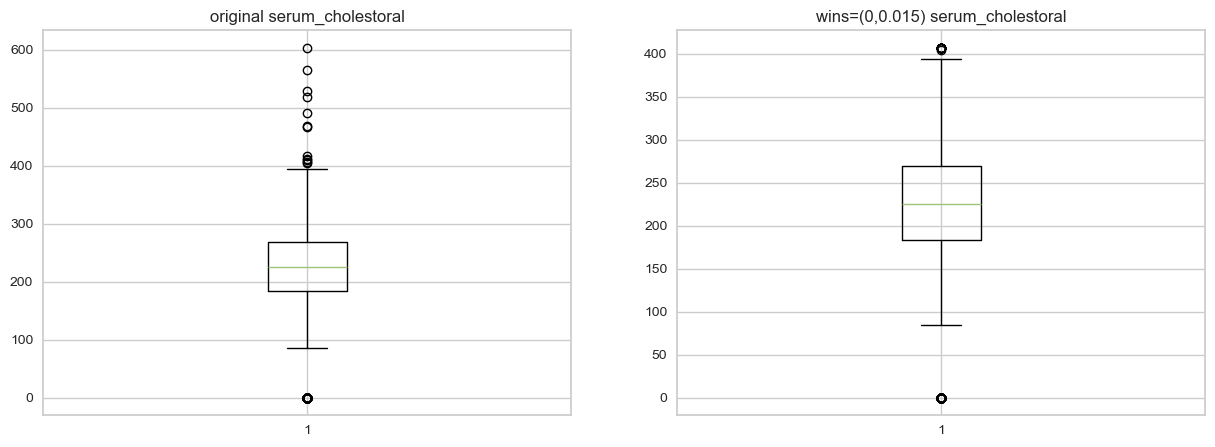

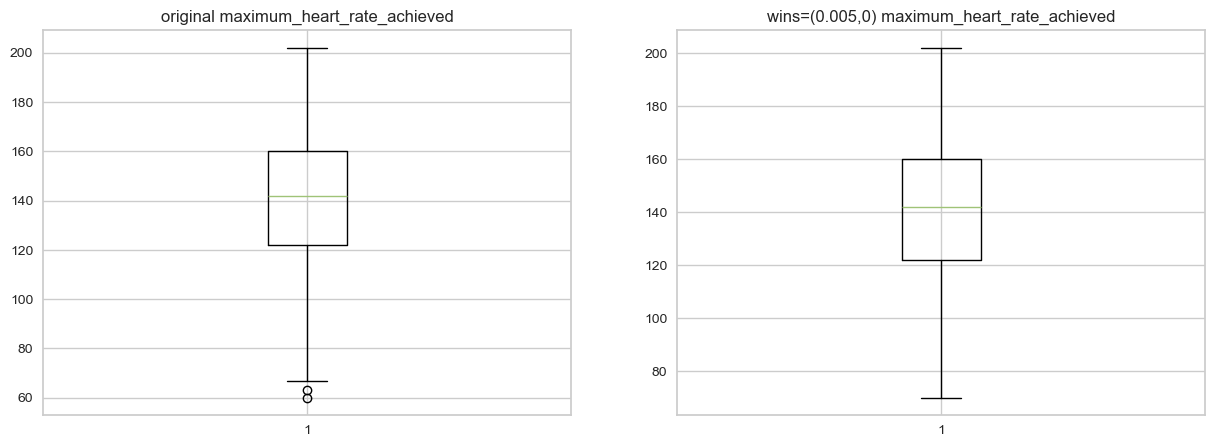

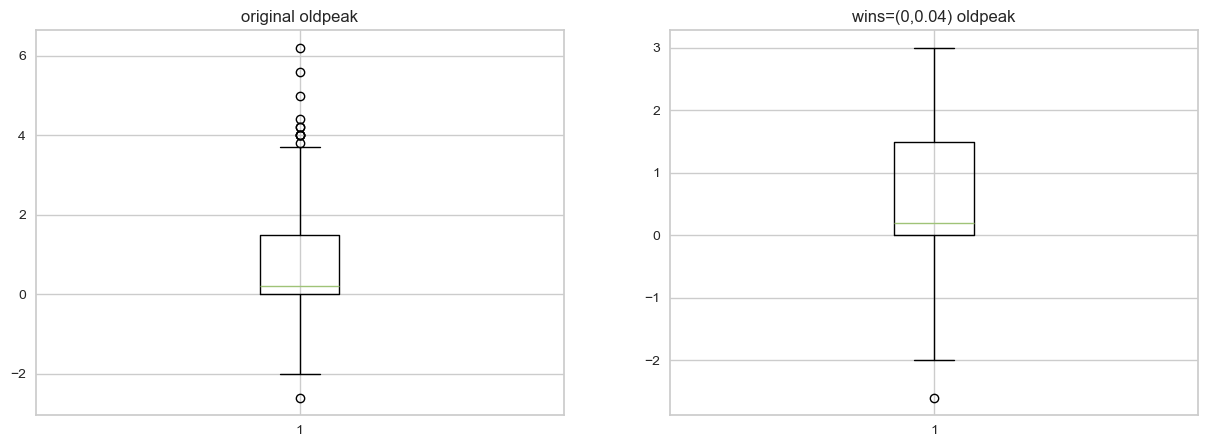

In [208]:
# Verificación de la winsorizing
wins_dict = {}
wins_dict = test_wins(cont_vars[0], df_modified, wins_dict, upper_limit=.04, show_plot=True)
wins_dict = test_wins(cont_vars[1], df_modified, wins_dict, upper_limit=.015, show_plot=True)
wins_dict = test_wins(cont_vars[2], df_modified, wins_dict, lower_limit=.005, show_plot=True)
wins_dict = test_wins(cont_vars[3], df_modified, wins_dict, upper_limit=.04, show_plot=True)
# wins_dict = test_wins(cont_vars[4], df_modified, wins_dict, upper_limit=.05, show_plot=True)
# wins_dict = test_wins(cont_vars[5], df_modified, wins_dict, lower_limit=.09, upper_limit=.04, show_plot=True)
# wins_dict = test_wins(cont_vars[6], df_modified, wins_dict, lower_limit=.09, upper_limit=.11, show_plot=True)
# wins_dict = test_wins(cont_vars[7], df_modified, wins_dict, upper_limit=.03, show_plot=True)
# wins_dict = test_wins(cont_vars[8], df_modified, wins_dict, upper_limit=.01, show_plot=True)
# wins_dict = test_wins(cont_vars[9], df_modified, wins_dict, upper_limit=.01, show_plot=True)
# wins_dict = test_wins(cont_vars[10], df_modified, wins_dict, upper_limit=.015, show_plot=True)
# wins_dict = test_wins(cont_vars[11], df_modified, wins_dict, upper_limit=.12, show_plot=True)

In [209]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for col in cont_vars:
            result[col] = self.wins[col]     
        return result

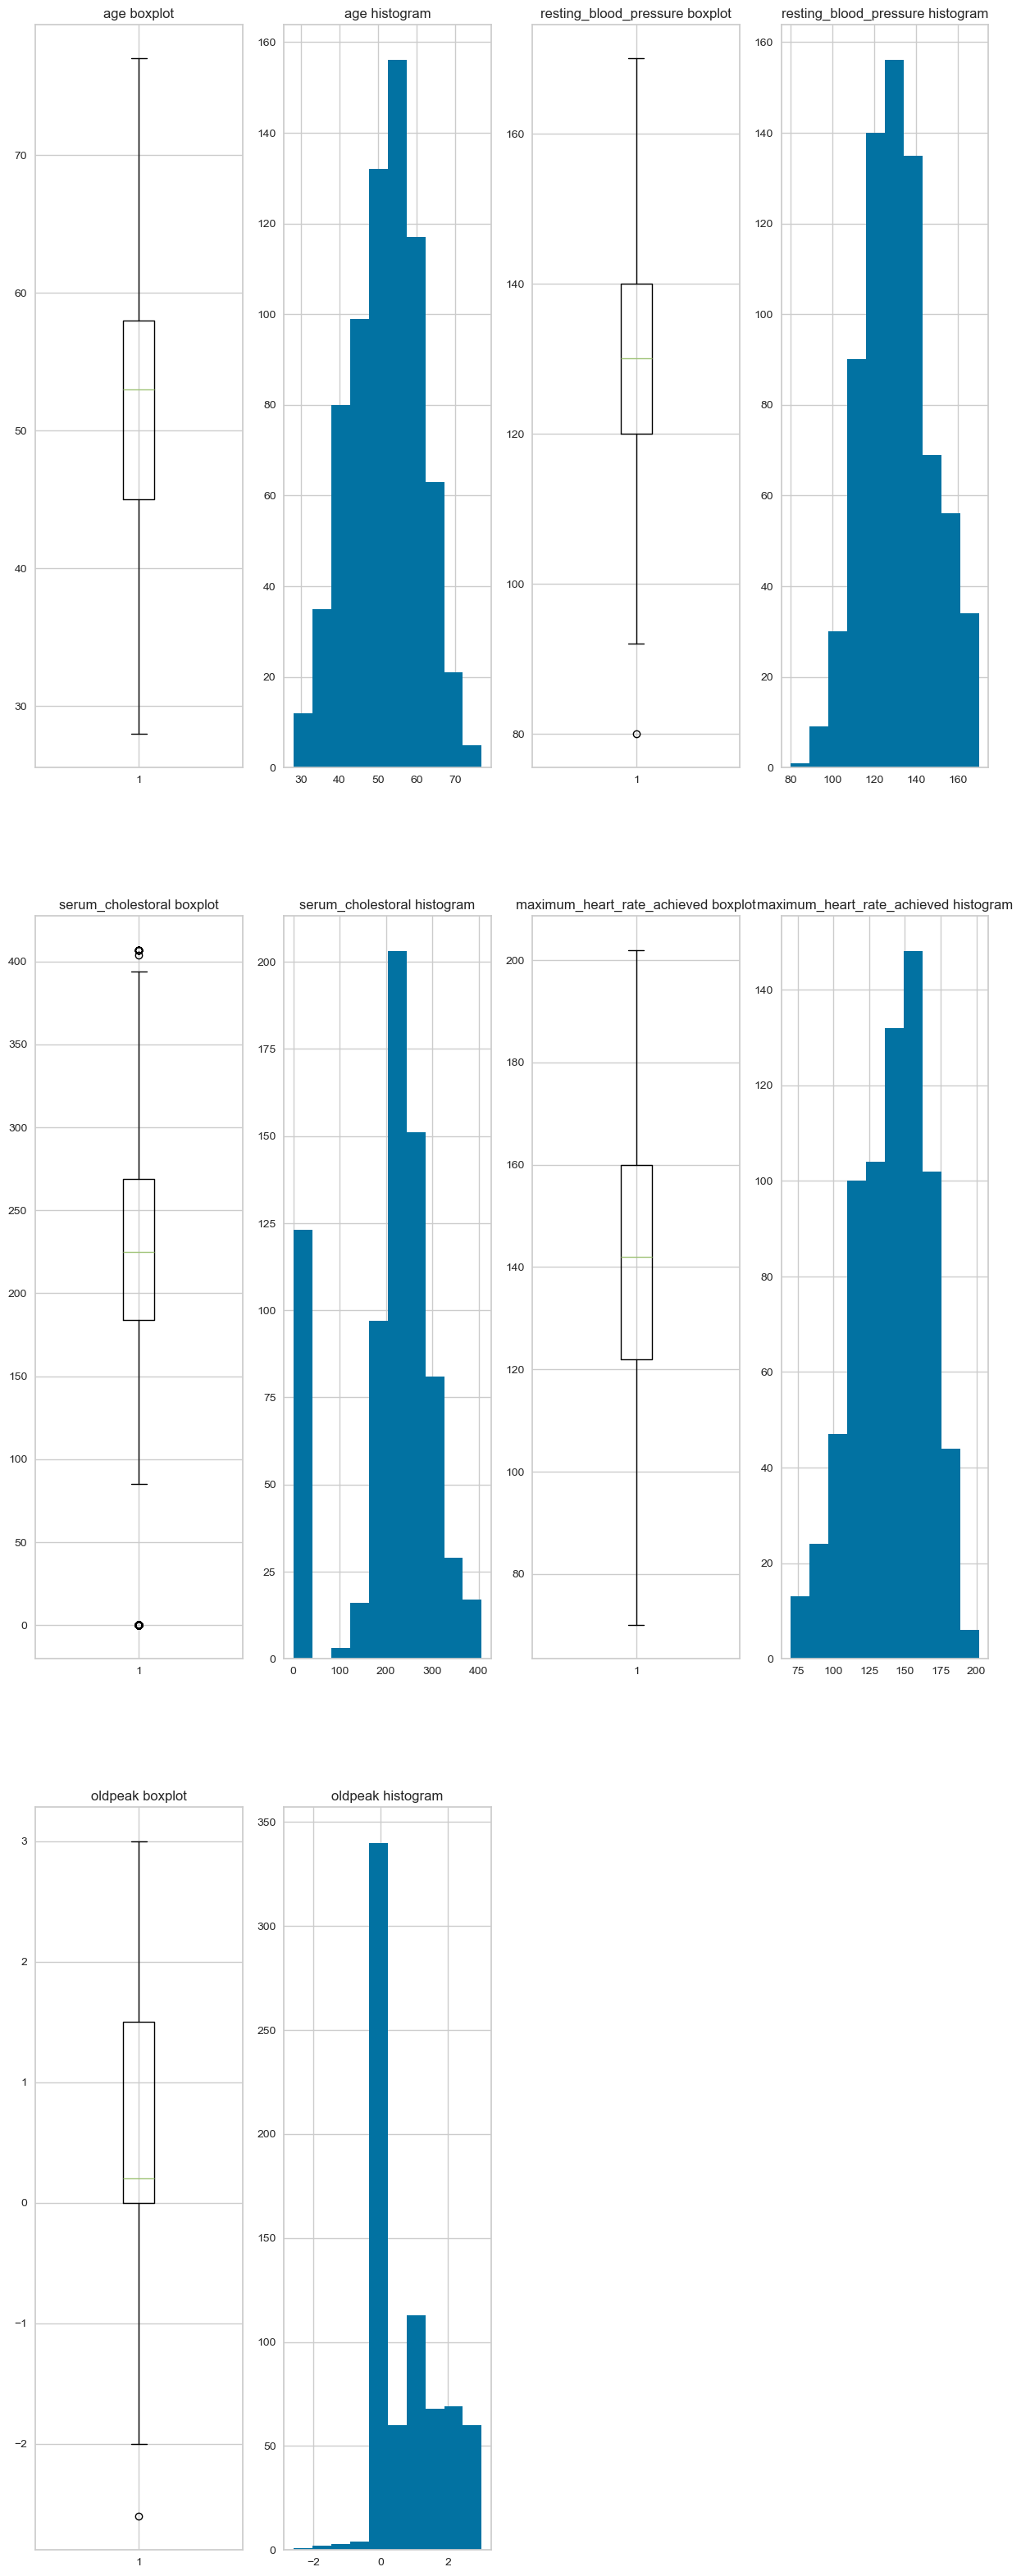

In [210]:
df_wins = Winsorizer(wins_dict,cont_vars).fit_transform(df_modified)
outliers_visual(df_wins)

### 4.2 Exploración de datos

#### Análisis univariado

In [211]:
# Descriptores estadísticos para valores continuos
df_wins.describe()

age  resting_blood_pressure  serum_cholestoral  \
count  720.000000              720.000000         720.000000   
mean    51.888889              131.389464         203.653916   
std      9.193720               17.372894         104.681945   
min     28.000000               80.000000           0.000000   
25%     45.000000              120.000000         184.000000   
50%     53.000000              130.000000         225.000000   
75%     58.000000              140.000000         269.000000   
max     77.000000              170.000000         407.000000   

       maximum_heart_rate_achieved     oldpeak  
count                   720.000000  720.000000  
mean                    140.593237    0.759497  
std                      25.530403    0.973837  
min                      70.000000   -2.600000  
25%                     122.000000    0.000000  
50%                     142.000000    0.200000  
75%                     160.000000    1.500000  
max                     202.000000    3.000000

In [212]:
# Descriptores estadísticos para valores categóricos
df_wins.describe(include='O')

country  sex chest_pain_type fasting_blood_sugar  \
count         720  720             720                 720   
unique          3    2               4                   2   
top     Cleveland    1               4                   0   
freq          303  532             365                 650   

       resting_electrocardiographic_results exercise_induced_angina  \
count                                   720                     720   
unique                                    3                       2   
top                                       0                       0   
freq                                    473                     478   

       the_slope_of_the_peak_exercise_ST_segment number_of_major_vessels thal  \
count                                        720                     720  720   
unique                                         5                       5    5   
top                                            2                       0    3   
freq                                         497                     590  510   

       target  
count     720  
unique      5  
top         0  
freq      360

In [213]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(15, 40))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

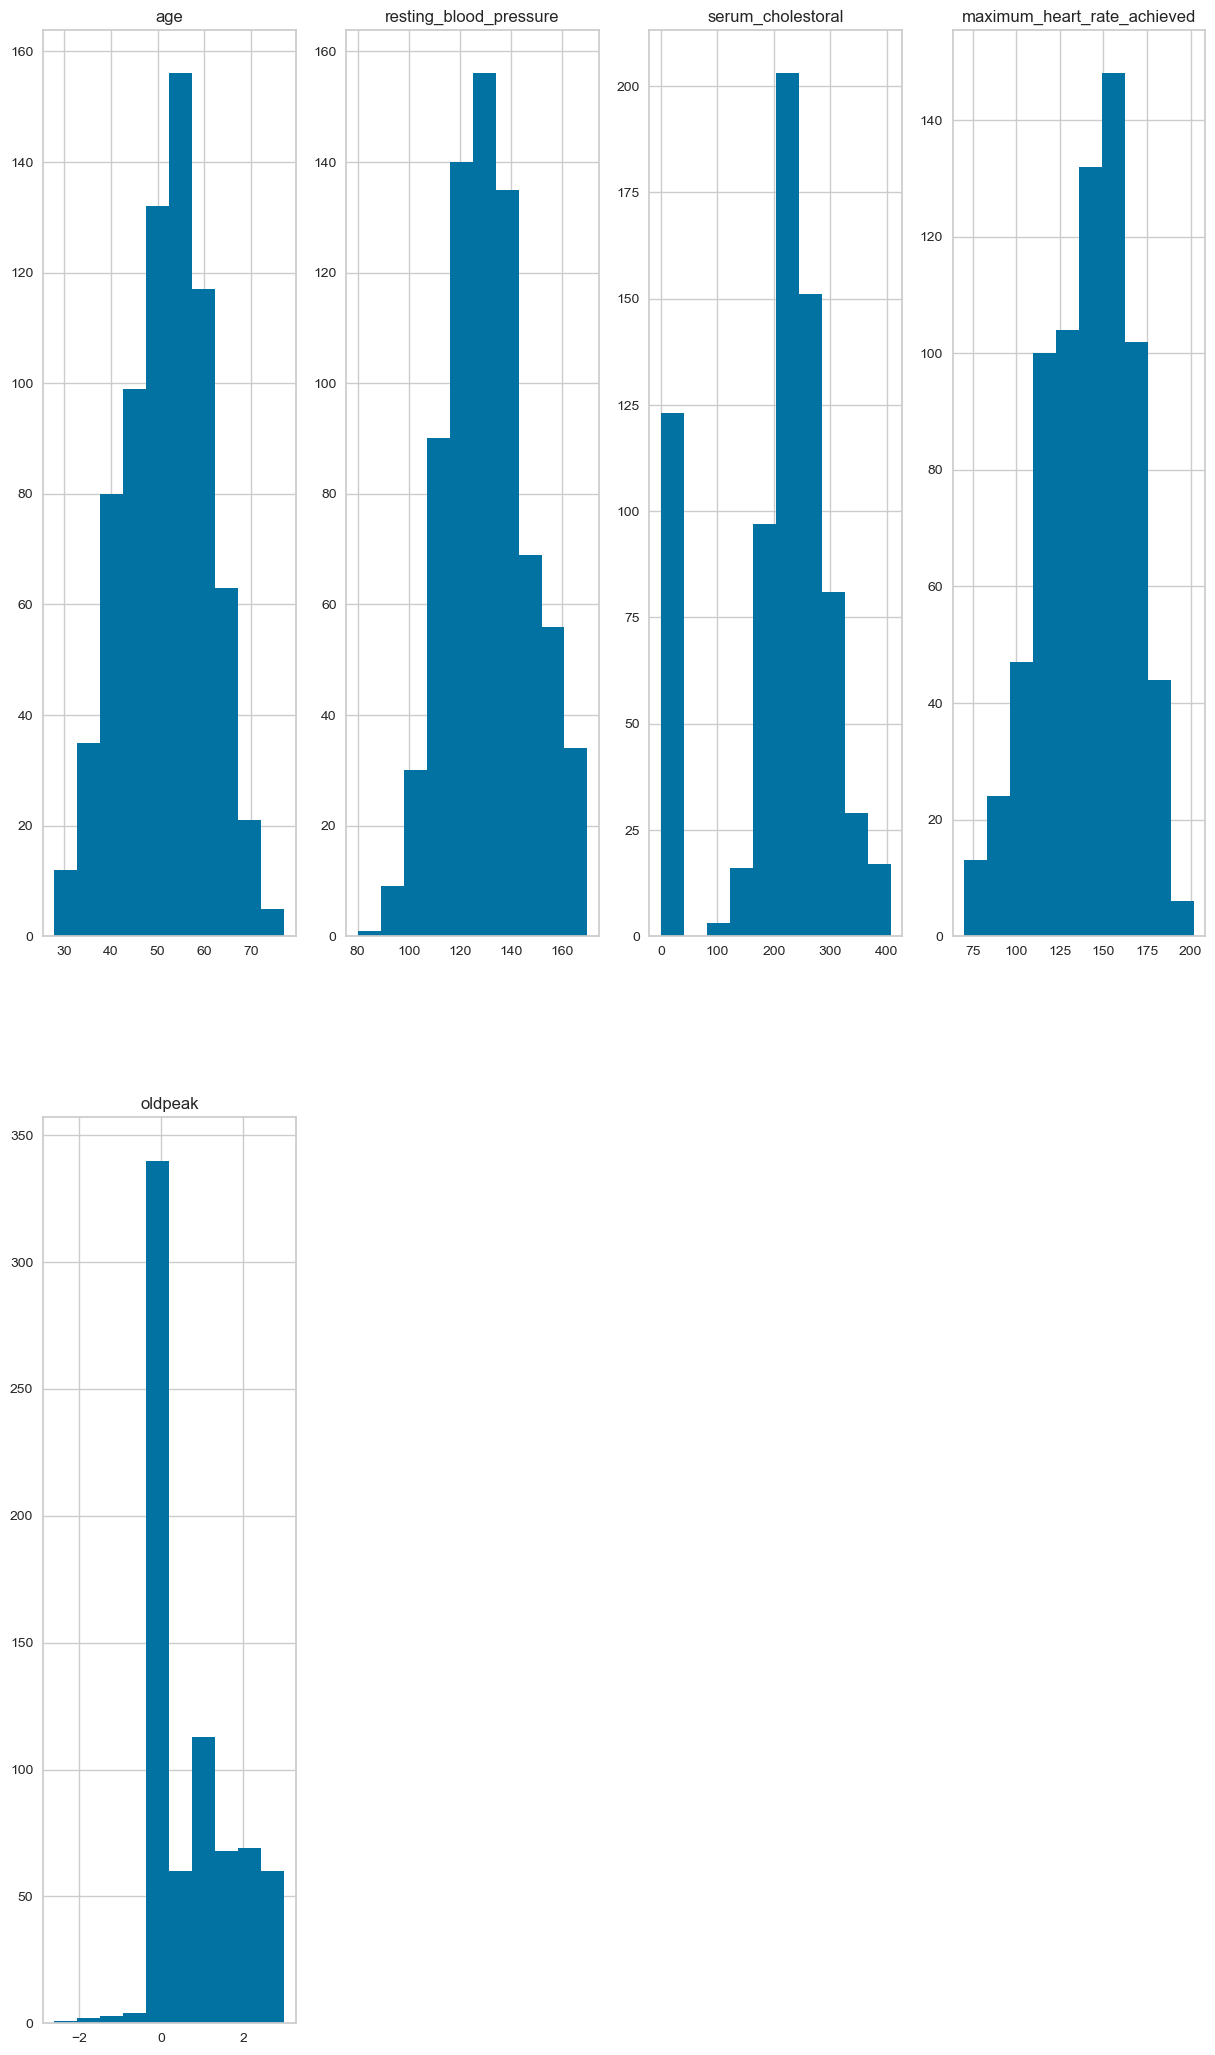

In [214]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(df_wins)

Luego de realizar la limpieza de datos, imputando datos y winsorizing, logramos percibir distribuciones menos segadas.

Text(0.5, 0, 'target')

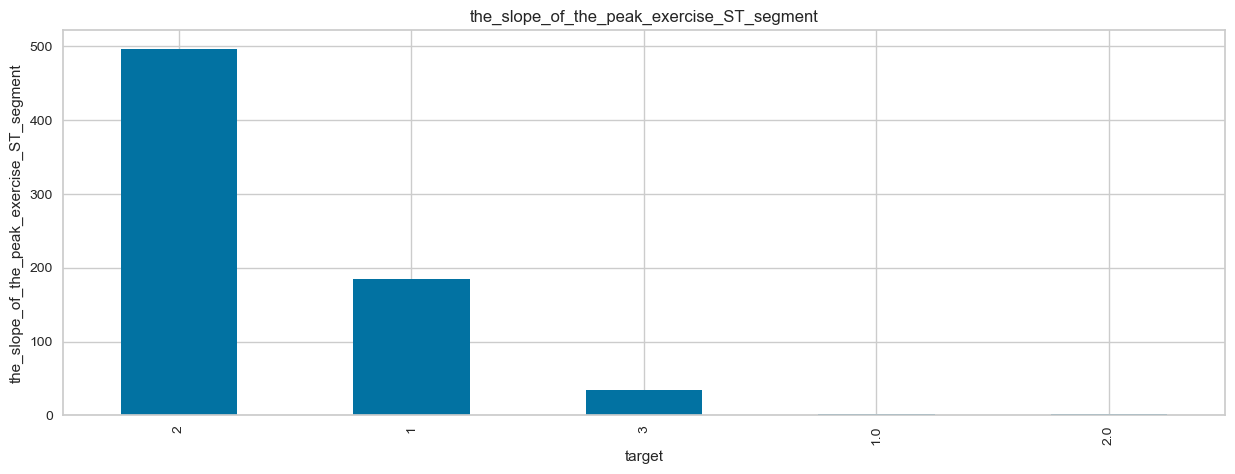

In [215]:
df_wins['the_slope_of_the_peak_exercise_ST_segment'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("the_slope_of_the_peak_exercise_ST_segment")
plt.ylabel('the_slope_of_the_peak_exercise_ST_segment')
plt.xlabel('target')

Text(0.5, 1.0, 'resting_electrocardiographic_results')

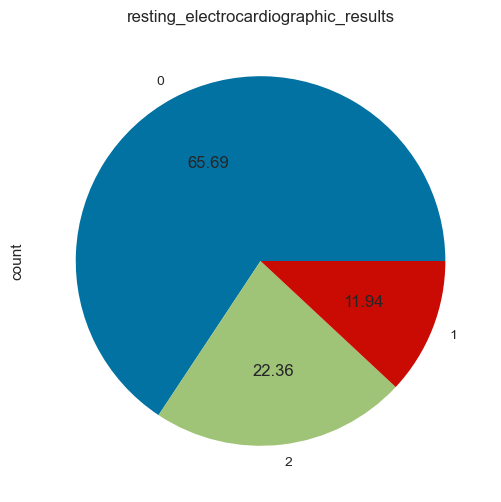

In [216]:
df_wins['resting_electrocardiographic_results'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("resting_electrocardiographic_results")

Text(0.5, 0, 'Curb weight')

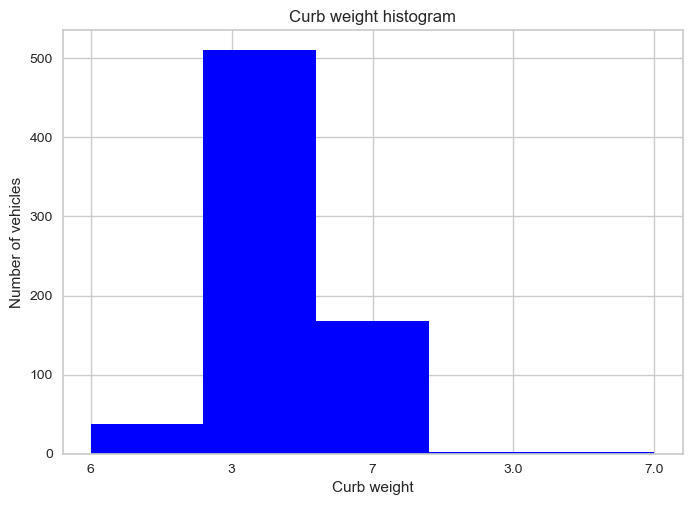

In [217]:
df_wins['thal'].hist(bins=5,color='blue')
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')

Text(0.5, 0, 'chest_pain_type')

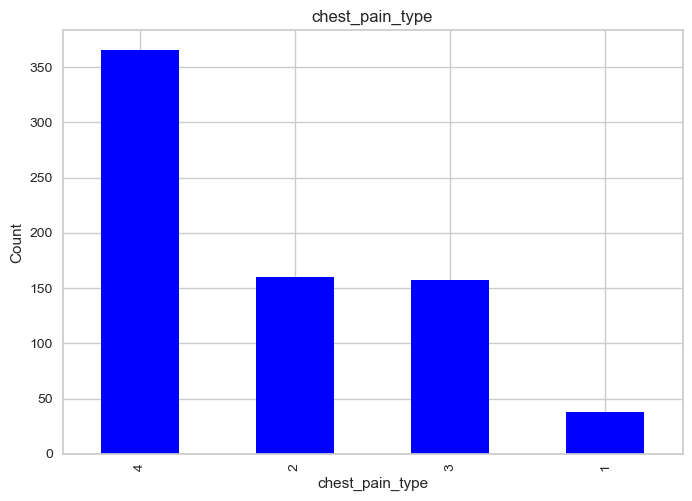

In [218]:
df_wins['chest_pain_type'].value_counts().plot(kind='bar',color='blue')
plt.title("chest_pain_type")
plt.ylabel('Count')
plt.xlabel('chest_pain_type')

#### Análisis Bivariado

Haciendo uso del diagrama de cajas y bigotes obtendremos un resumen visual de la distribución de cada una de las variables independientes con respecto a la dependiente, observando así la distribución de los distintos grupos.

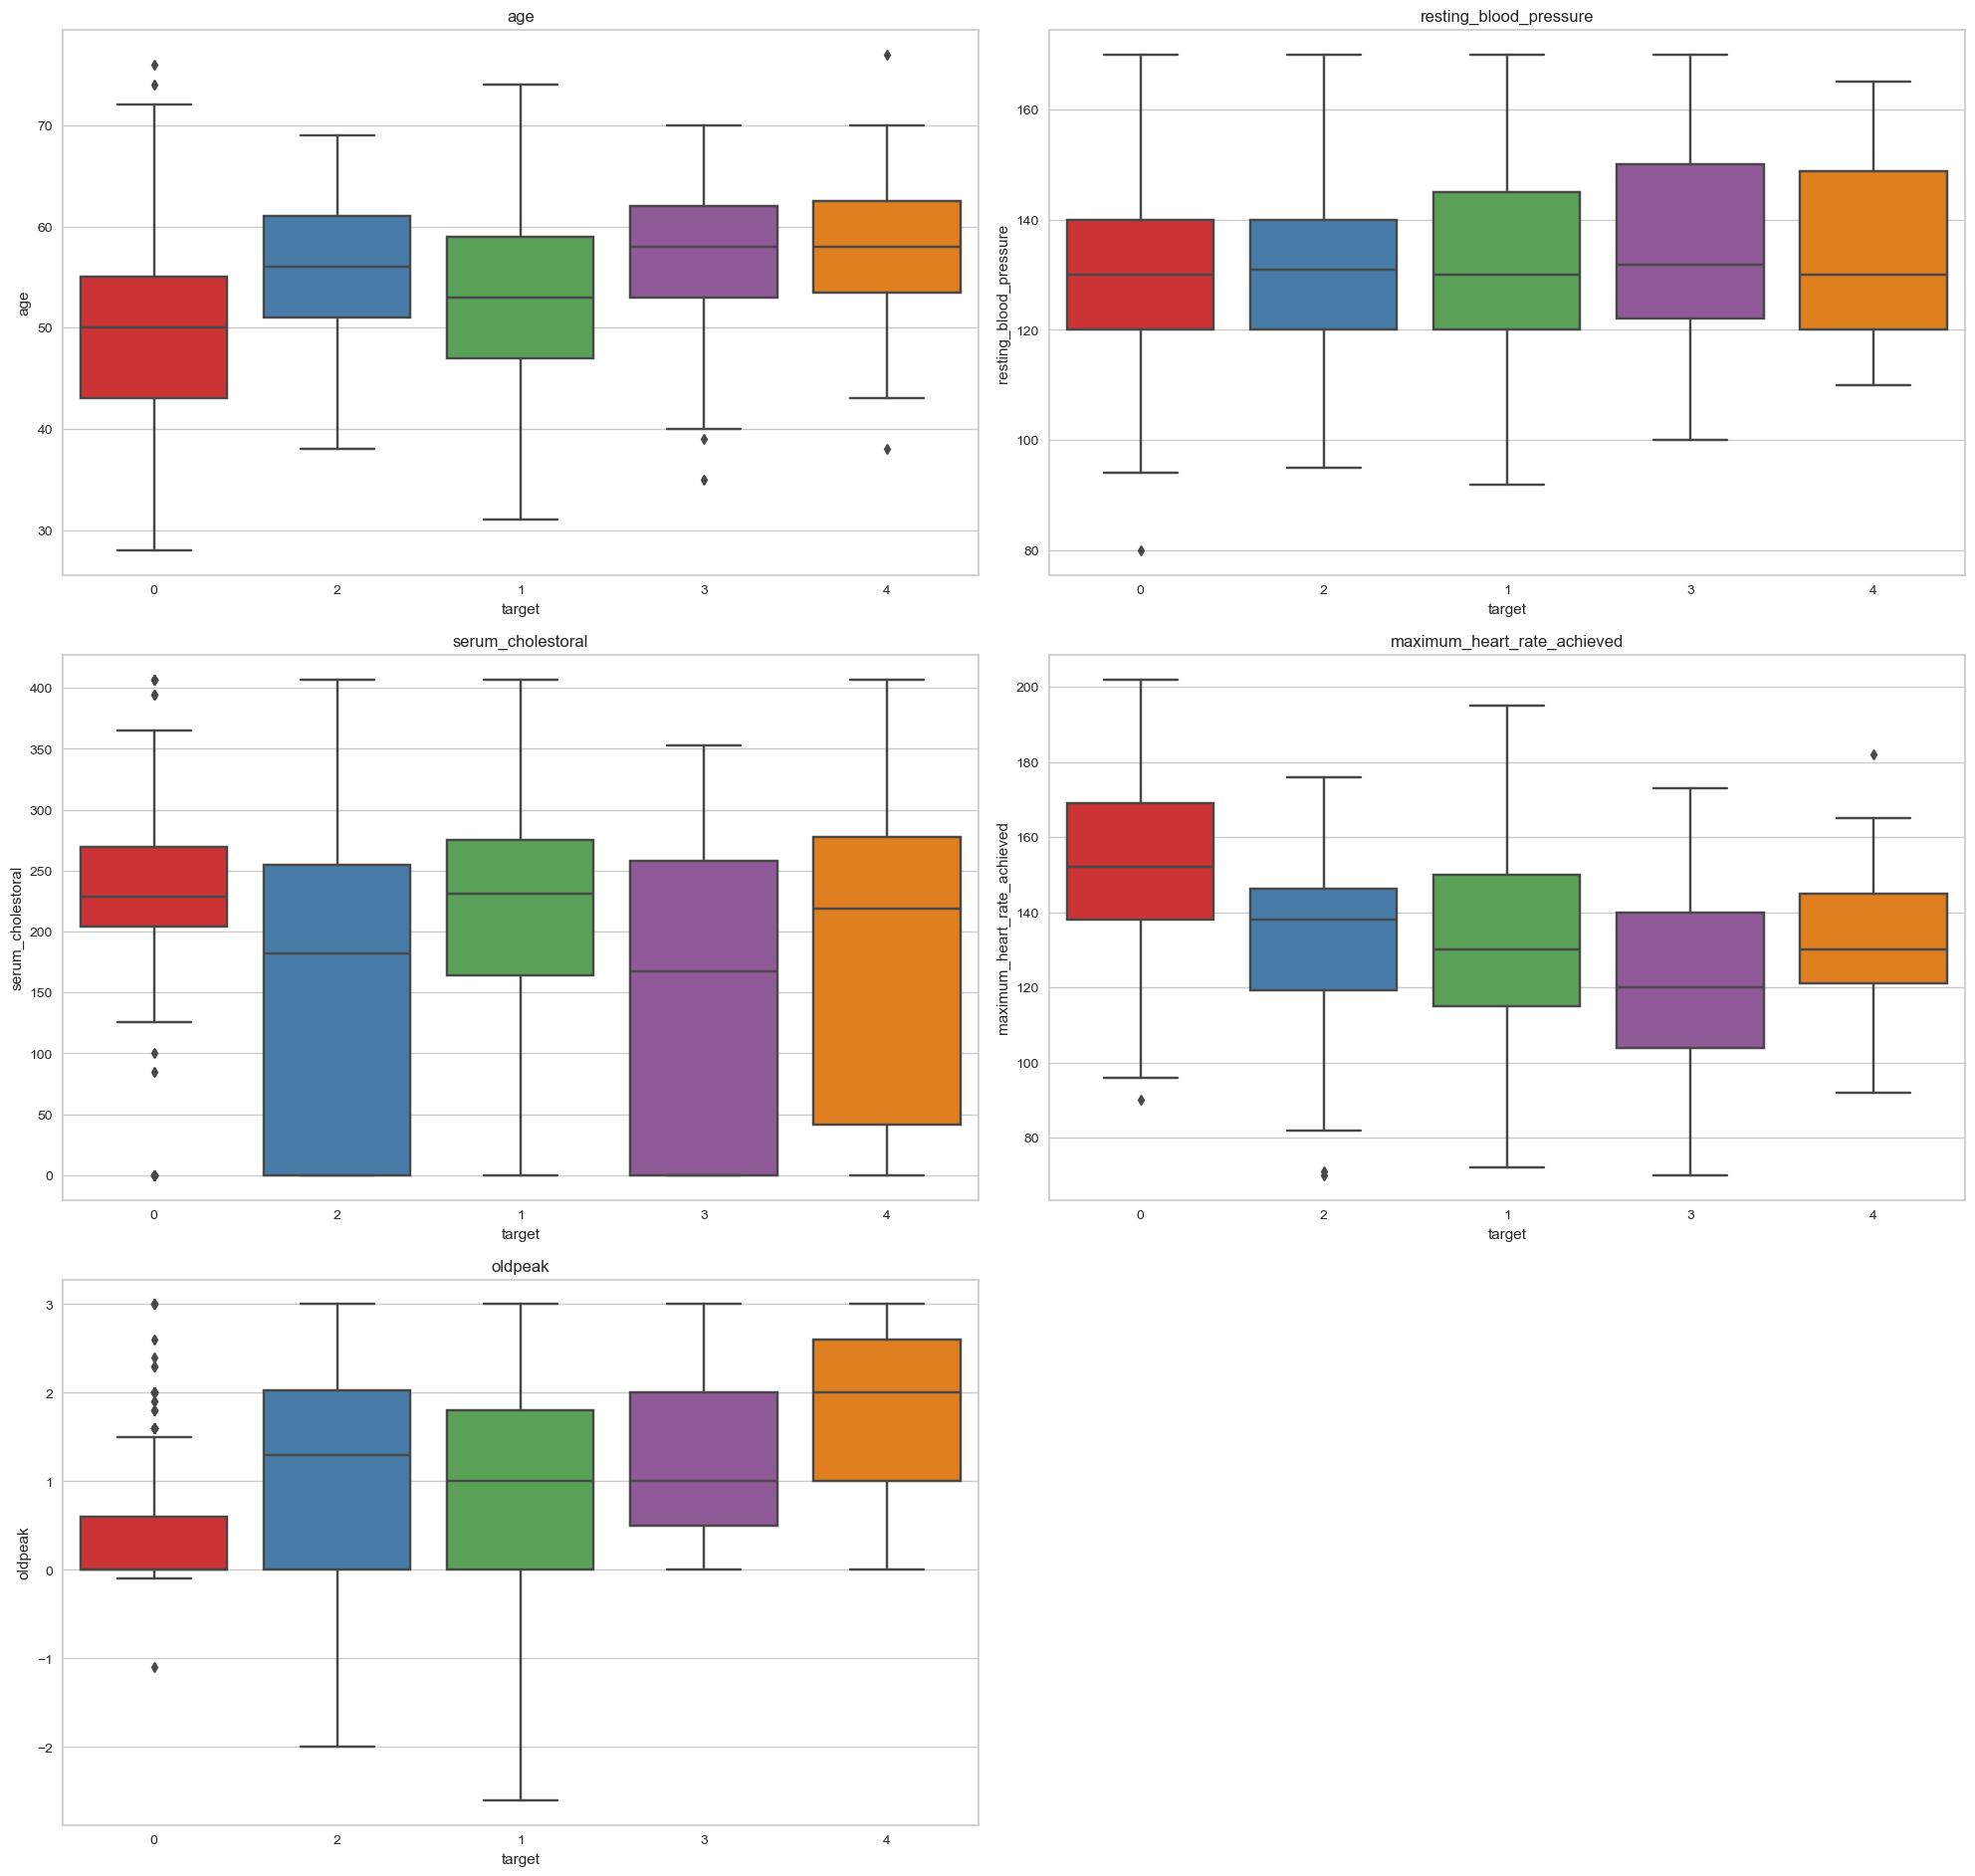

In [219]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.boxplot(x=df_wins['target'], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Conociendo un poco acerca de las distribuciones de las variables con respecto a la variable objetivo, nos podemos dar una primera idea sobre cuáles características podrían resultar siendo más importantes al momento de influir en la variable objetivo. Esto resulta útil pues al incluirlas, nuestro modelo puede brindarnos mejores resultados en cuanto a correctitud de la predicción.

Observando las medianas de cada grupo (características) nos puede mostrar si verdaderamente existe una relación entre dicha variable independiente y la objetivo.

El tamaño de la caja nos puede mostrar la variabilidad dentro de esa característica.

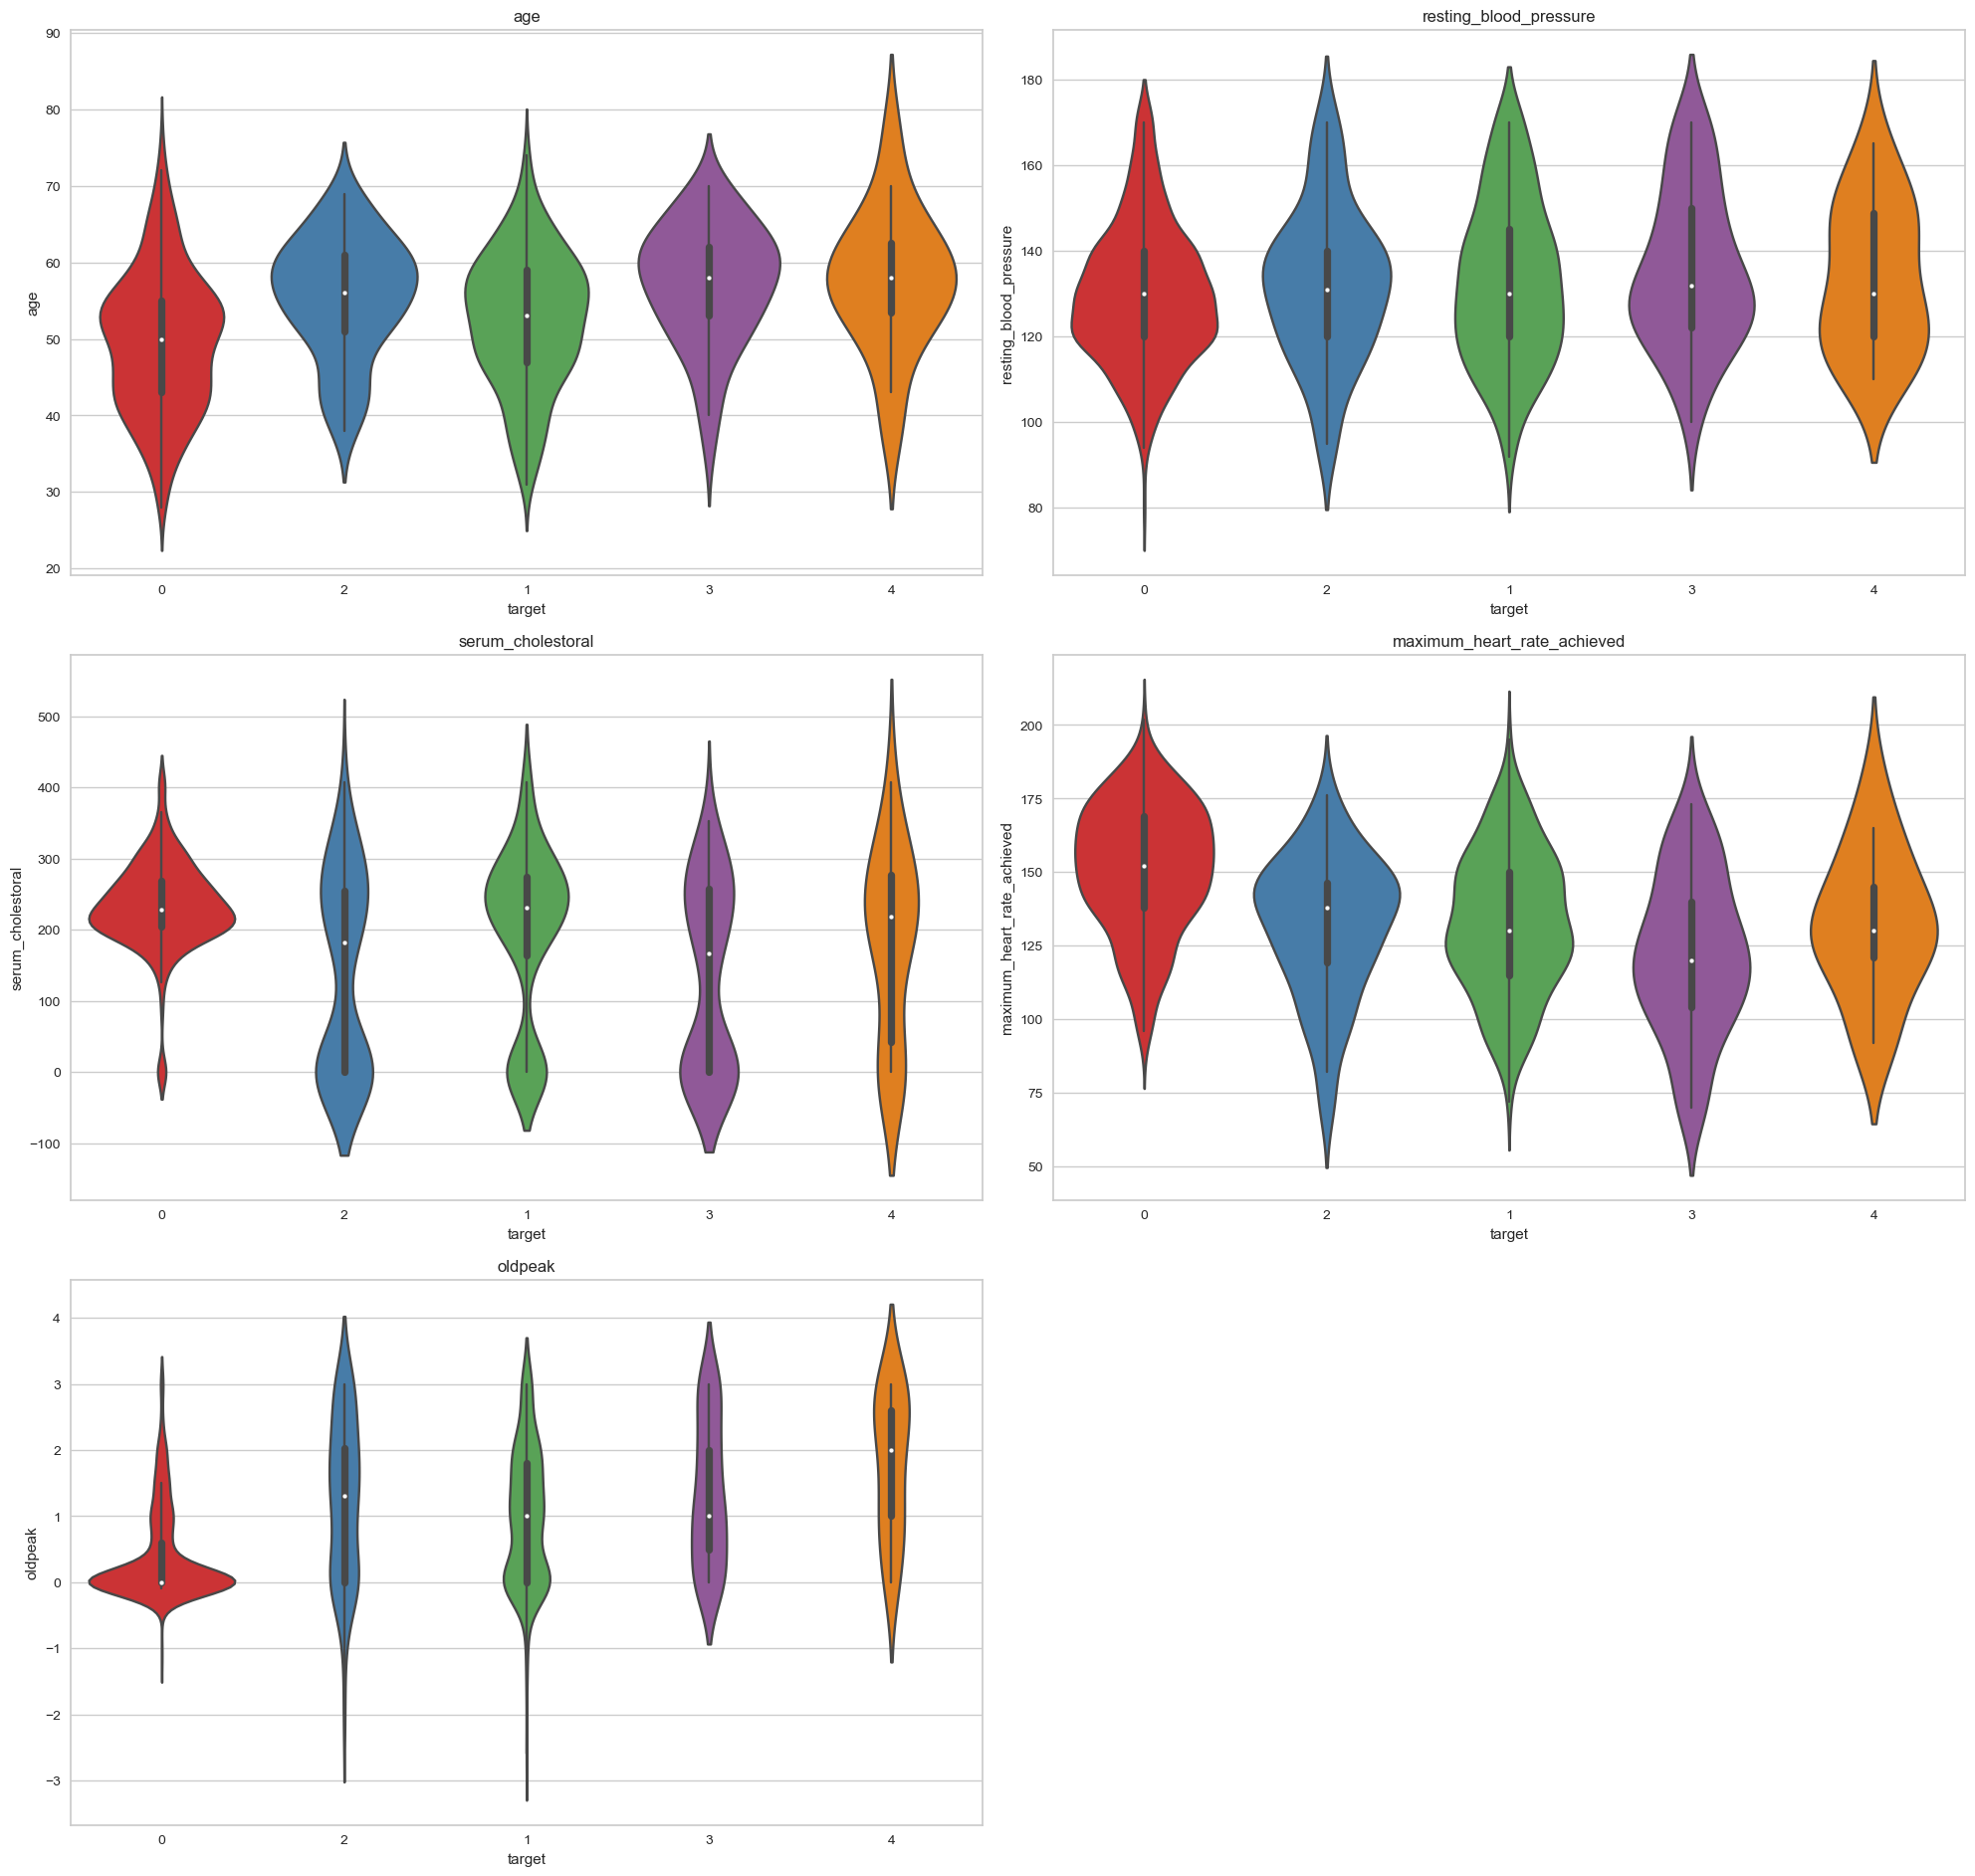

In [220]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.violinplot(x=df_wins['target'], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Vamos a ubicar los registros de acuerdo a su categoría, de manera que podamos dibujar nuestro diagrama de densidad.

In [221]:
def categories(df):
    risks = {}
    risks['neutral'] = df.loc[df['target'] == "0"]
    risks['1'] = df.loc[df['target'] == "1"]
    risks['2'] = df.loc[df['target'] == "2"]
    risks['3'] = df.loc[df['target'] == "3"]
    risks['4'] = df.loc[df['target'] == "4"]
    return risks 

Con el diagrama de densidad se puede observar aquellas variables independientes que mejor 
discriminan las clases de la variable objetivo.

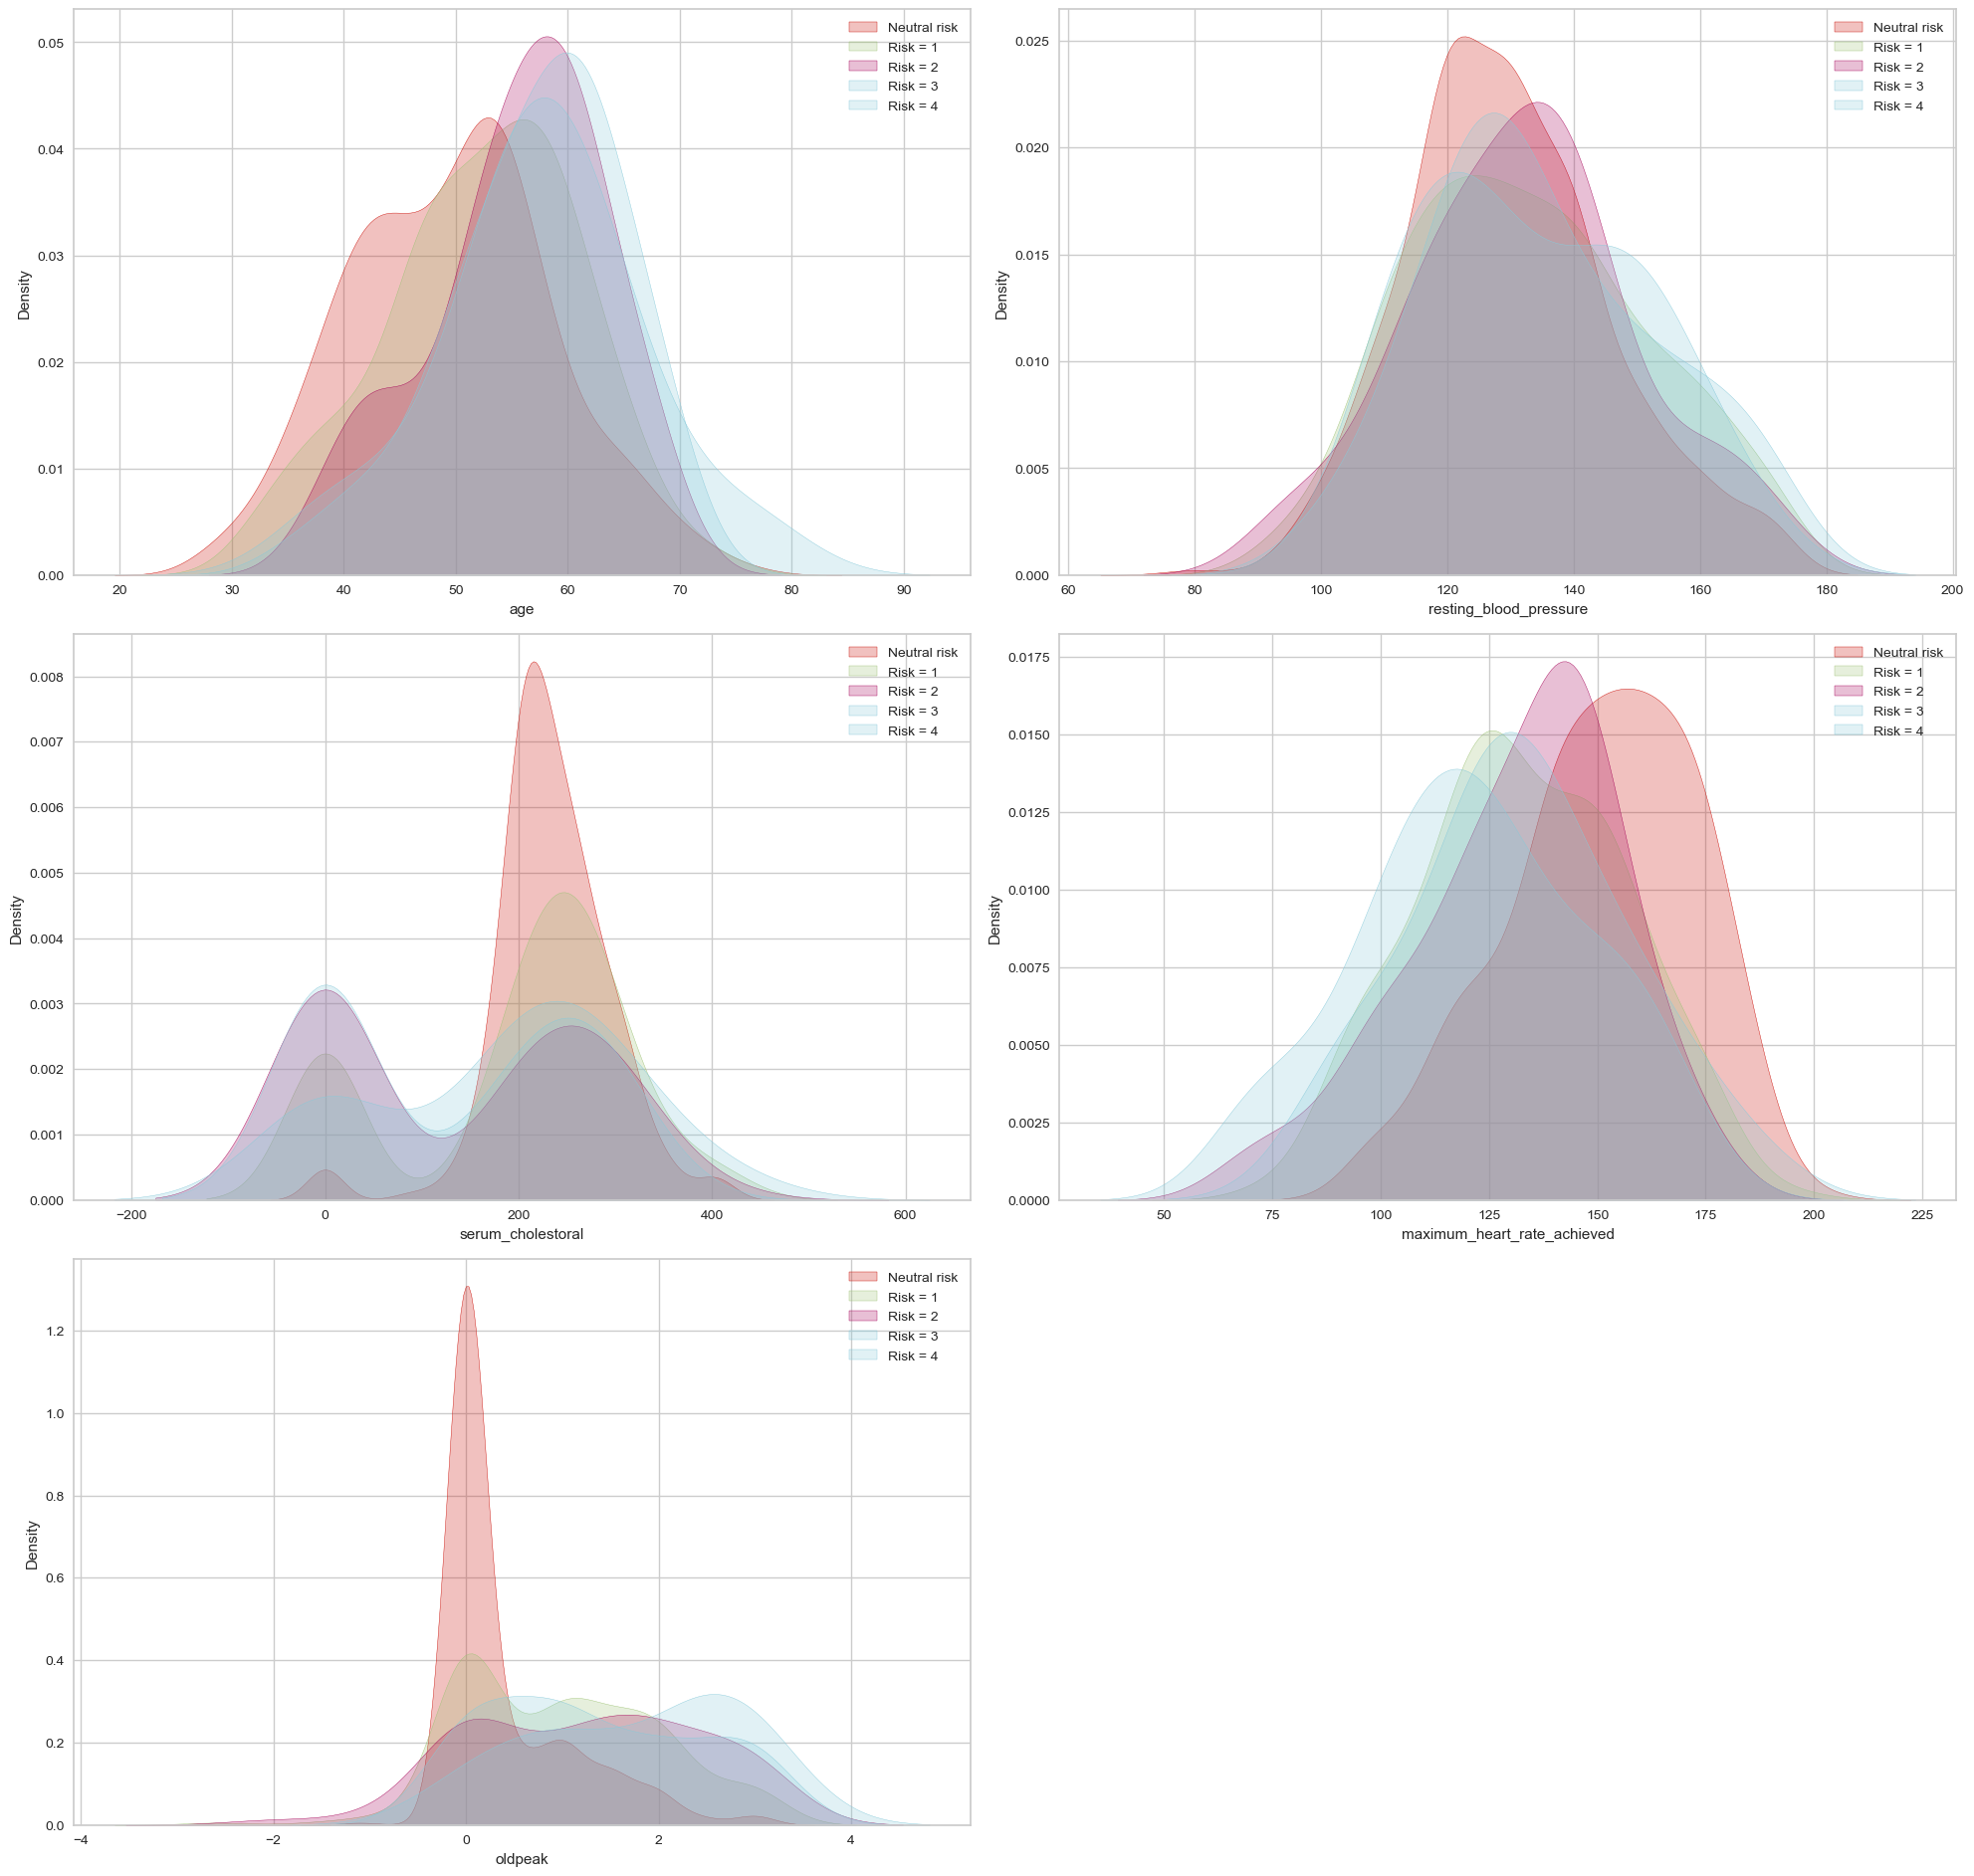

In [222]:
risks = categories(df_wins)

i=1
fig = plt.figure(figsize=[20, 50])
for var_num in df_wins.select_dtypes('number').columns:
    ax = fig.add_subplot(8, 2, i)
    sns.kdeplot(risks['neutral'][[var_num]].iloc[:,0], shade=True, color="r", label="Neutral risk",palette='Set1')
    sns.kdeplot(risks['1'][[var_num]].iloc[:,0], shade=True, color="g", label="Risk = 1",palette='Set1')
    sns.kdeplot(risks['2'][[var_num]].iloc[:,0], shade=True, color="m", label="Risk = 2",palette='Set1')
    sns.kdeplot(risks['3'][[var_num]].iloc[:,0], shade=True, color="c", label="Risk = 3",palette='Set1')
    sns.kdeplot(risks['4'][[var_num]].iloc[:,0], shade=True, color="c", label="Risk = 4",palette='Set1')
    plt.legend()
    i+=1
fig.tight_layout()

In [223]:
df_wins

country   age sex chest_pain_type  resting_blood_pressure  \
0    Cleveland  63.0   1               1                   145.0   
1    Cleveland  67.0   1               4                   160.0   
2    Cleveland  67.0   1               4                   120.0   
3    Cleveland  37.0   1               3                   130.0   
4    Cleveland  41.0   0               2                   130.0   
..         ...   ...  ..             ...                     ...   
715      Suiza  70.0   1               4                   115.0   
716      Suiza  70.0   1               4                   140.0   
717      Suiza  72.0   1               3                   160.0   
718      Suiza  73.0   0               3                   160.0   
719      Suiza  74.0   1               2                   145.0   

     serum_cholestoral fasting_blood_sugar  \
0                233.0                   1   
1                286.0                   0   
2                229.0                   0   
3                250.0                   0   
4                204.0                   0   
..                 ...                 ...   
715                0.0                   0   
716                0.0                   1   
717                0.0                   0   
718                0.0                   0   
719                0.0                   0   

    resting_electrocardiographic_results  maximum_heart_rate_achieved  \
0                                      2                        150.0   
1                                      2                        108.0   
2                                      2                        129.0   
3                                      0                        187.0   
4                                      2                        172.0   
..                                   ...                          ...   
715                                    1                         92.0   
716                                    0                        157.0   
717                                    2                        114.0   
718                                    1                        121.0   
719                                    1                        123.0   

    exercise_induced_angina  oldpeak  \
0                         0      2.3   
1                         1      1.5   
2                         1      2.6   
3                         0      3.0   
4                         0      1.4   
..                      ...      ...   
715                       1      0.0   
716                       1      2.0   
717                       0      1.6   
718                       0      0.0   
719                       0      1.3   

    the_slope_of_the_peak_exercise_ST_segment number_of_major_vessels thal  \
0                                           3                       0    6   
1                                           2                       3    3   
2                                           2                       2    7   
3                                           3                       0    3   
4                                           1                       0    3   
..                                        ...                     ...  ...   
715                                         2                       0    7   
716                                         2                       0    7   
717                                         2                       2    3   
718                                         1                       0    3   
719                                         1                       0    3   

    target  
0        0  
1        2  
2        1  
3        0  
4        0  
..     ...  
715      1  
716      3  
717      0  
718      1  
719      1  

[720 rows x 15 columns]

In [224]:
df_wins.columns

Index(['country', 'age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak',
       'the_slope_of_the_peak_exercise_ST_segment', 'number_of_major_vessels',
       'thal', 'target'],
      dtype='object')

Utilizando los gráficos de densidad logramos percibir que algunas features nos permiten distinguir la variable objetivo, mientras otras no nos brindan mayor información.

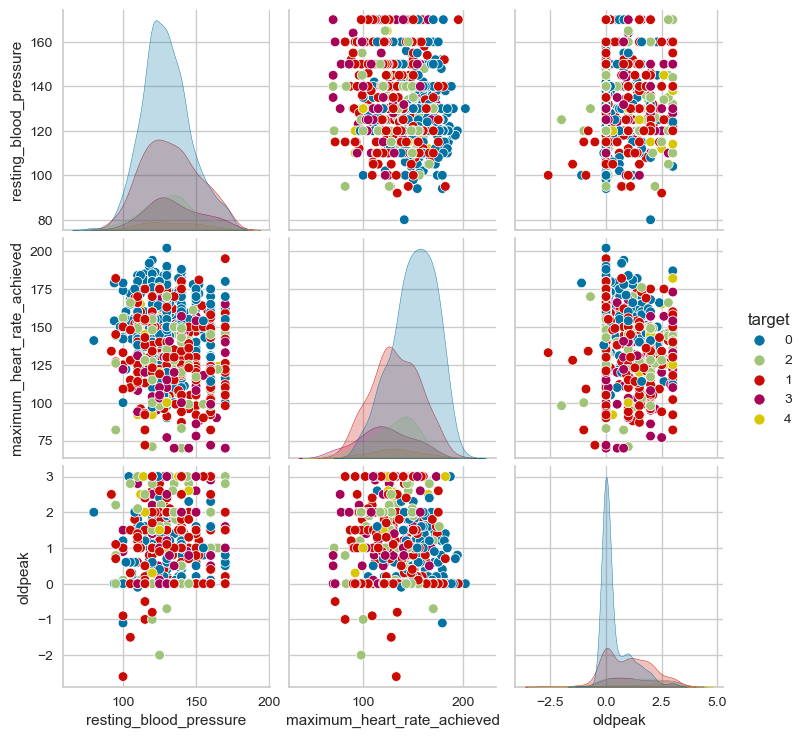

In [225]:
ax = sns.pairplot(df_wins, vars=['resting_blood_pressure',  'maximum_heart_rate_achieved', 'oldpeak' ], hue="target")

Haciendo uso de los pairplots de aquellas variables que mejor discriminaban la variable objetivo, intentamos encontrar combinaciones que nos ayuden a distinguir mejor los 5 grupos de riesgo que tenemos en nuestra variable objetivo symboling.

Definitivamente no resulta claro un par de variables que nos discrimene la variable objetivo

### Matriz de correlación

Vamos a utilizar la matriz de correlación para corroborar los indicios sobre las relaciones presentes entre algunas de las características y la variable objetivo.

El uso de la matriz de correlación es importante para conocer la correlación entre cada par de variables
- Las variables independientes a utilizar deberían estar altamente correlacionadas con la objetivo
- Se deben evitar problemas de multicolinealidad
- Las variables independientes no deben estar correlacionadas entre sí
- Si las variables independientes se encuentran altamente correlacionadas, el modelo puede presentar problemas al momento de entrenarlo e interpretarlo. No se podría aislar la relación entre cada variable independiente y la dependiente. Si no se pueden aislar los efectos, se pueden confundir dichos efectos
- Cuando las variables independientes están muy correlacionadas entre sí los cambios en una variable están asociados con cambios en otra variable y, por tanto, los coeficientes de regresión del modelo ya no van a medir el efecto de una variable independiente sobre la respuesta manteniendo constante, o sin variar, el resto de predictores. 
- Al contar con variables categóricas (la dependiente y varias dependientes) no podemos utilizar la matriz de correlación clásica que utiliza el coeficiente de correlación de Pearson ya que este tan sólo nos sirve para relación entre variables continuas.
- Al haber varias características categóricas utilizamos la función associations de dython que utiliza el coeficiente de Pearson para continuas vs continuas, la razón de correlación para continuas vs categóricas y Cramer's V o Theil's U para categóricas vs categóricas

In [226]:

# Utilizamos la librería dython para identificar las variables categóricas y numéricas

from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio
categorical_features=identify_nominal_columns(df_wins)
continuous_features=identify_numeric_columns(df_wins)
categorical_features

['country',
 'sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_electrocardiographic_results',
 'exercise_induced_angina',
 'the_slope_of_the_peak_exercise_ST_segment',
 'number_of_major_vessels',
 'thal',
 'target']

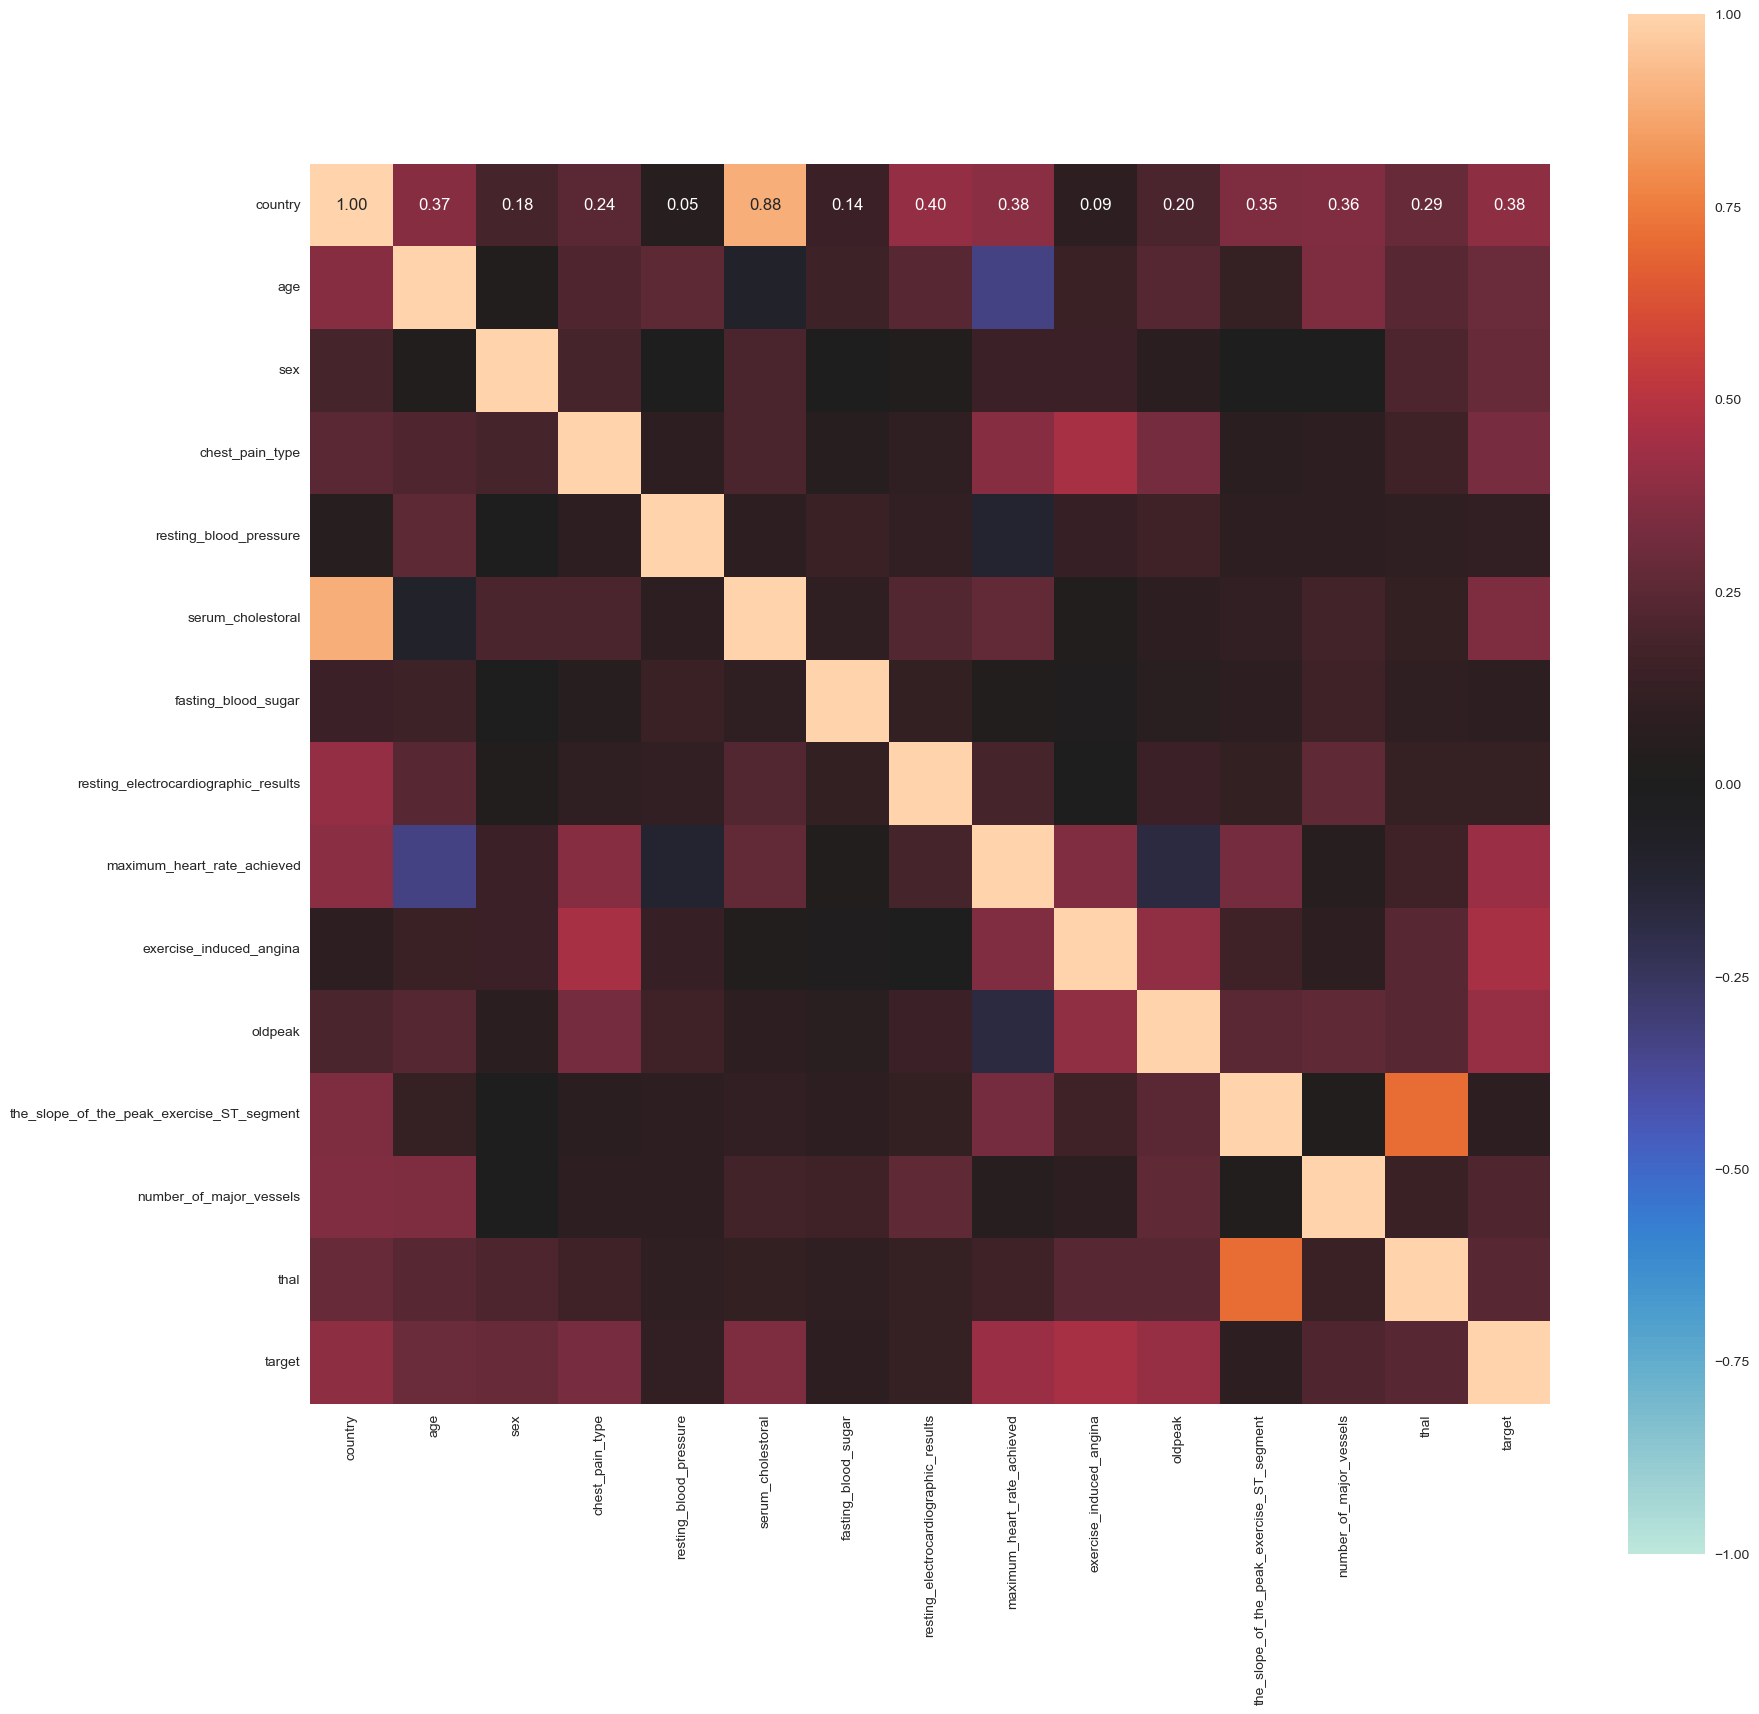

In [227]:

from dython.nominal import associations
complete_correlation= associations(df_wins, filename= 'complete_correlation.png', figsize=(20,20))


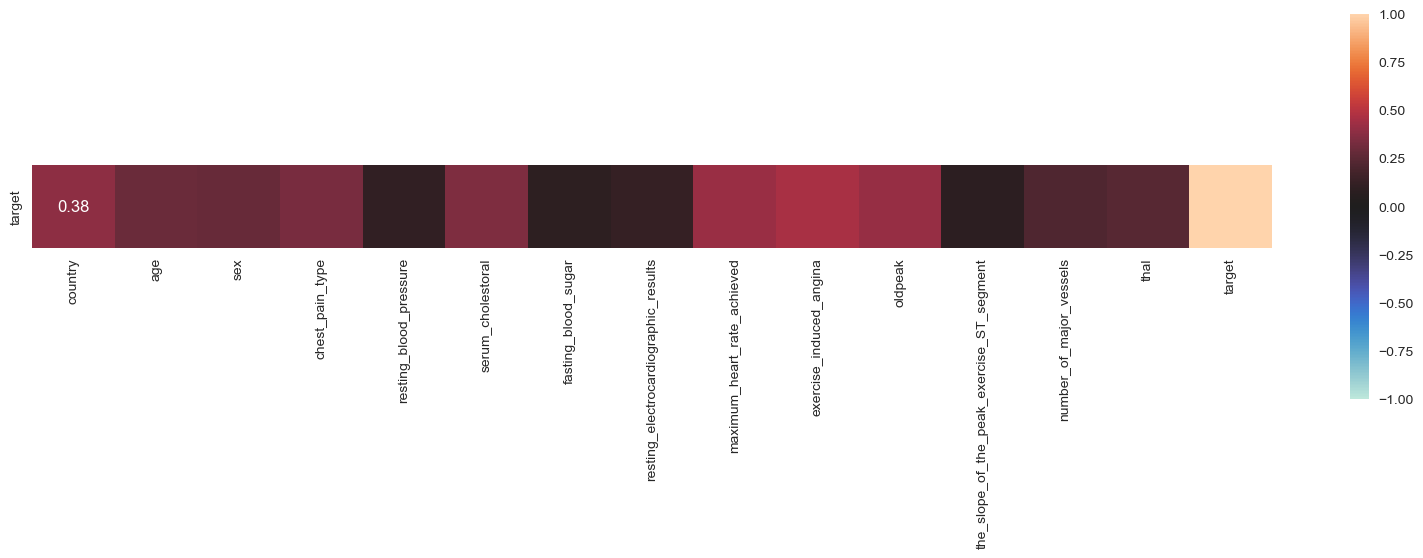

In [228]:
target_correlation= associations(df_wins, display_rows=['target'], filename= 'target_correlation.png', figsize=(20,5))

Detallamos primero las variables independientes que más influencian a la objetivo (aunque ninguna tiene una alta correlación >= 0.7 o <= -0.7):
- exercise_induced _angina
- maximum_heart_rate_achieved
- oldpeak

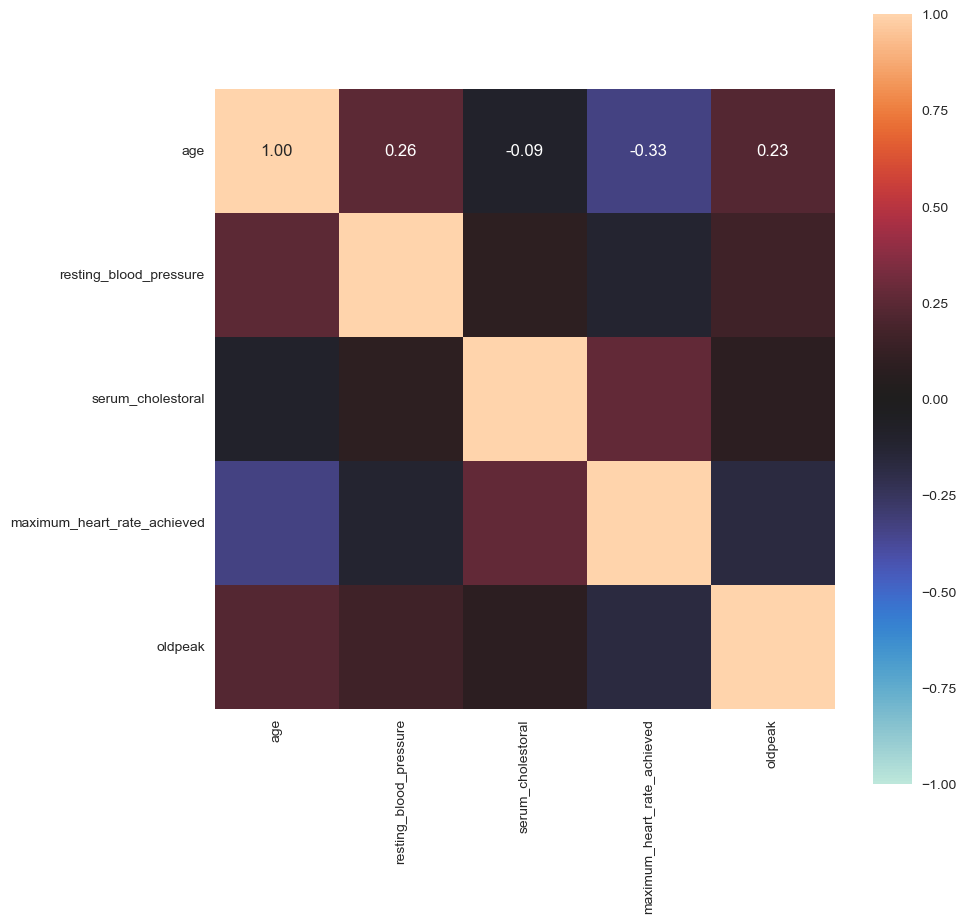

In [229]:
# Obtenemos la matriz de correlación entre las variables continuas

selected_column= df_wins[continuous_features]
continuous_df = selected_column.copy()

continuous_correlation= associations(continuous_df, filename= 'continuous_correlation.png', figsize=(10,10))

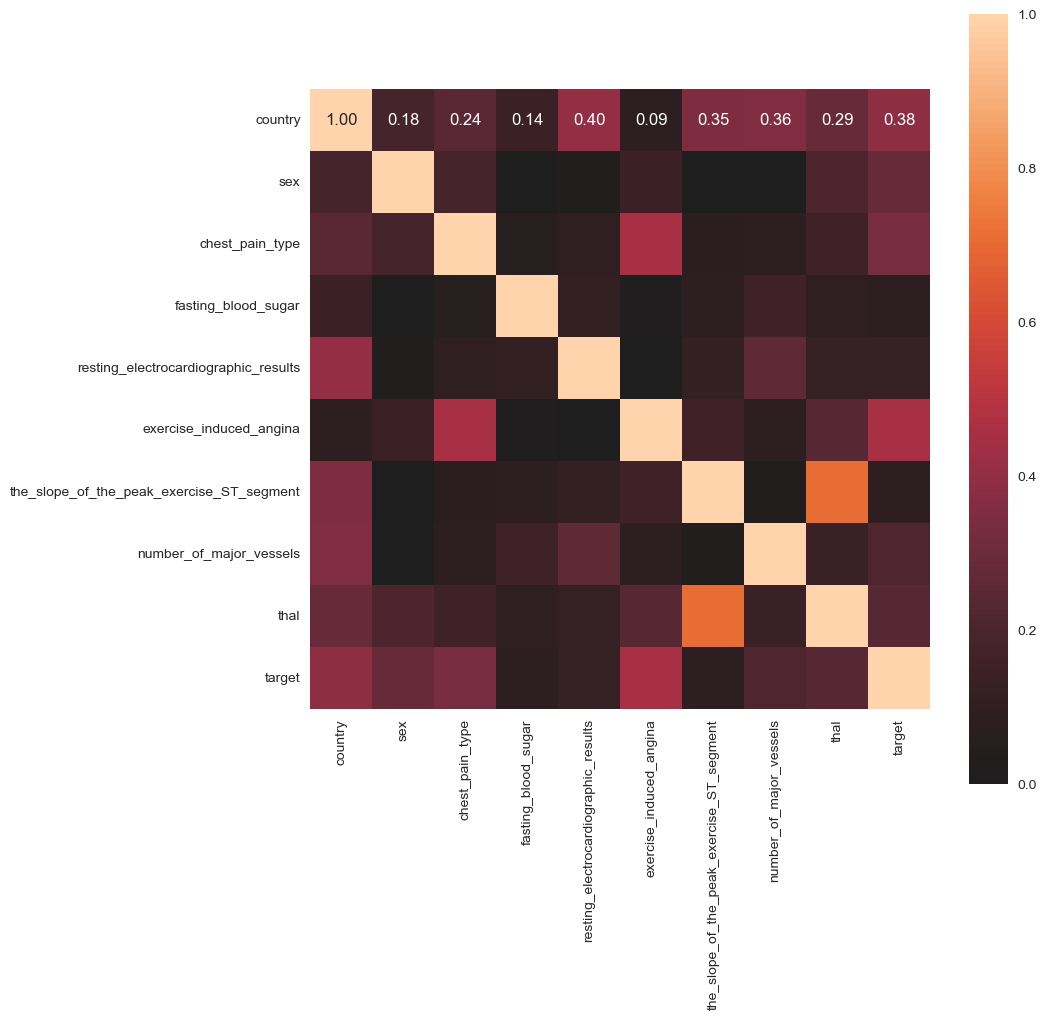

In [230]:
# Obtenemos la matriz de correlación entre las variables categoricas

selected_column= df_wins[categorical_features]
categorical_df = selected_column.copy()

categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

Revisamos aquellas variables independientes categóricas que pueden llegar a generar problemas al encontrarse altamente correlacionadas entre sí (redundacia y complejidad innecesaria del modelo):
- exercise_induced _angina y chest_pain_type

### 4.3. Ingeniería de características

Vamos a eliminar y/o crear nuevas características que nos resulten útiles para la futura implementación de nuestros modelos

###### NO SE ELIMINA NINGUNA VARIABLE, YA QUE LAS CORRELACIONES NO SON FUERTES ENTRE LAS VARIABLES NUMÉRICAS INDEPENDIENTES

In [231]:
#print(correlation_ratio(categories=df_wins['target'], measurements=df_wins['exercise_induced_angina']))

In [232]:
# Creamos un Transformer personalizado para realizar la eliminación de variables
# a partir de sus correlaciones
class Remove_highly_correlated_features(BaseEstimator, TransformerMixin):
    def __init__(self,elims):
        self.elims = elims
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.drop(columns=self.elims)
        return result

In [233]:
cols = ['chest_pain_type', 'country']

df_elims = Remove_highly_correlated_features(cols).fit_transform(df_wins)
df_elims

age sex  resting_blood_pressure  serum_cholestoral fasting_blood_sugar  \
0    63.0   1                   145.0              233.0                   1   
1    67.0   1                   160.0              286.0                   0   
2    67.0   1                   120.0              229.0                   0   
3    37.0   1                   130.0              250.0                   0   
4    41.0   0                   130.0              204.0                   0   
..    ...  ..                     ...                ...                 ...   
715  70.0   1                   115.0                0.0                   0   
716  70.0   1                   140.0                0.0                   1   
717  72.0   1                   160.0                0.0                   0   
718  73.0   0                   160.0                0.0                   0   
719  74.0   1                   145.0                0.0                   0   

    resting_electrocardiographic_results  maximum_heart_rate_achieved  \
0                                      2                        150.0   
1                                      2                        108.0   
2                                      2                        129.0   
3                                      0                        187.0   
4                                      2                        172.0   
..                                   ...                          ...   
715                                    1                         92.0   
716                                    0                        157.0   
717                                    2                        114.0   
718                                    1                        121.0   
719                                    1                        123.0   

    exercise_induced_angina  oldpeak  \
0                         0      2.3   
1                         1      1.5   
2                         1      2.6   
3                         0      3.0   
4                         0      1.4   
..                      ...      ...   
715                       1      0.0   
716                       1      2.0   
717                       0      1.6   
718                       0      0.0   
719                       0      1.3   

    the_slope_of_the_peak_exercise_ST_segment number_of_major_vessels thal  \
0                                           3                       0    6   
1                                           2                       3    3   
2                                           2                       2    7   
3                                           3                       0    3   
4                                           1                       0    3   
..                                        ...                     ...  ...   
715                                         2                       0    7   
716                                         2                       0    7   
717                                         2                       2    3   
718                                         1                       0    3   
719                                         1                       0    3   

    target  
0        0  
1        2  
2        1  
3        0  
4        0  
..     ...  
715      1  
716      3  
717      0  
718      1  
719      1  

[720 rows x 13 columns]

In [234]:
# Creamos un Transformer personalizado para dummificar las variables categóricas
class Dummify(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = pd.get_dummies(result,columns=result.select_dtypes('object').columns,dtype=float)
        return result

In [235]:
df_elims_dummified = Dummify().fit_transform(df_elims.drop(columns='target'))
df_elims_dummified

age  resting_blood_pressure  serum_cholestoral  \
0    63.0                   145.0              233.0   
1    67.0                   160.0              286.0   
2    67.0                   120.0              229.0   
3    37.0                   130.0              250.0   
4    41.0                   130.0              204.0   
..    ...                     ...                ...   
715  70.0                   115.0                0.0   
716  70.0                   140.0                0.0   
717  72.0                   160.0                0.0   
718  73.0                   160.0                0.0   
719  74.0                   145.0                0.0   

     maximum_heart_rate_achieved  oldpeak  sex_0  sex_1  \
0                          150.0      2.3    0.0    1.0   
1                          108.0      1.5    0.0    1.0   
2                          129.0      2.6    0.0    1.0   
3                          187.0      3.0    0.0    1.0   
4                          172.0      1.4    1.0    0.0   
..                           ...      ...    ...    ...   
715                         92.0      0.0    0.0    1.0   
716                        157.0      2.0    0.0    1.0   
717                        114.0      1.6    0.0    1.0   
718                        121.0      0.0    1.0    0.0   
719                        123.0      1.3    0.0    1.0   

     fasting_blood_sugar_0  fasting_blood_sugar_1  \
0                      0.0                    1.0   
1                      1.0                    0.0   
2                      1.0                    0.0   
3                      1.0                    0.0   
4                      1.0                    0.0   
..                     ...                    ...   
715                    1.0                    0.0   
716                    0.0                    1.0   
717                    1.0                    0.0   
718                    1.0                    0.0   
719                    1.0                    0.0   

     resting_electrocardiographic_results_0  ...  number_of_major_vessels_0  \
0                                       0.0  ...                        1.0   
1                                       0.0  ...                        0.0   
2                                       0.0  ...                        0.0   
3                                       1.0  ...                        1.0   
4                                       0.0  ...                        1.0   
..                                      ...  ...                        ...   
715                                     0.0  ...                        1.0   
716                                     1.0  ...                        1.0   
717                                     0.0  ...                        0.0   
718                                     0.0  ...                        1.0   
719                                     0.0  ...                        1.0   

     number_of_major_vessels_0.0  number_of_major_vessels_1  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
..                           ...                        ...   
715                          0.0                        0.0   
716                          0.0                        0.0   
717                          0.0                        0.0   
718                          0.0                        0.0   
719                          0.0                        0.0   

     number_of_major_vessels_2  number_of_major_vessels_3  thal_3  thal_3.0  \
0                          0.0                        0.0     0.0       0.0   
1                          0.0                        1.0     1.0       0.0   
2                          1.0              

In [236]:
df_elims_dummified = pd.concat([df_elims_dummified,df_elims['target']], axis=1)

In [237]:
df_elims_dummified

age  resting_blood_pressure  serum_cholestoral  \
0    63.0                   145.0              233.0   
1    67.0                   160.0              286.0   
2    67.0                   120.0              229.0   
3    37.0                   130.0              250.0   
4    41.0                   130.0              204.0   
..    ...                     ...                ...   
715  70.0                   115.0                0.0   
716  70.0                   140.0                0.0   
717  72.0                   160.0                0.0   
718  73.0                   160.0                0.0   
719  74.0                   145.0                0.0   

     maximum_heart_rate_achieved  oldpeak  sex_0  sex_1  \
0                          150.0      2.3    0.0    1.0   
1                          108.0      1.5    0.0    1.0   
2                          129.0      2.6    0.0    1.0   
3                          187.0      3.0    0.0    1.0   
4                          172.0      1.4    1.0    0.0   
..                           ...      ...    ...    ...   
715                         92.0      0.0    0.0    1.0   
716                        157.0      2.0    0.0    1.0   
717                        114.0      1.6    0.0    1.0   
718                        121.0      0.0    1.0    0.0   
719                        123.0      1.3    0.0    1.0   

     fasting_blood_sugar_0  fasting_blood_sugar_1  \
0                      0.0                    1.0   
1                      1.0                    0.0   
2                      1.0                    0.0   
3                      1.0                    0.0   
4                      1.0                    0.0   
..                     ...                    ...   
715                    1.0                    0.0   
716                    0.0                    1.0   
717                    1.0                    0.0   
718                    1.0                    0.0   
719                    1.0                    0.0   

     resting_electrocardiographic_results_0  ...  number_of_major_vessels_0.0  \
0                                       0.0  ...                          0.0   
1                                       0.0  ...                          0.0   
2                                       0.0  ...                          0.0   
3                                       1.0  ...                          0.0   
4                                       0.0  ...                          0.0   
..                                      ...  ...                          ...   
715                                     0.0  ...                          0.0   
716                                     1.0  ...                          0.0   
717                                     0.0  ...                          0.0   
718                                     0.0  ...                          0.0   
719                                     0.0  ...                          0.0   

     number_of_major_vessels_1  number_of_major_vessels_2  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        1.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
715                        0.0                        0.0   
716                        0.0                        0.0   
717                        0.0                        1.0   
718                        0.0                        0.0   
719                        0.0                        0.0   

     number_of_major_vessels_3  thal_3  thal_3.0  thal_6  thal_7  thal_7.0  \
0                          0.0     0.0       0.0     1.0     0.0       0.0   
1                          1.0     1.0       0.0     0.0     0.0       0.0   
2                          0.0     0.0       0.

Teniendo en cuenta que uno de los hallazgos importantes fue la alta correlación existente entre las variables independientes podemos aplicar PCA para reducir dimensiones y utilizar variables nuevas con mucha mayor información. 

Estandarizamos primero, pues de no hacerlo, al PCA basarse en distancias, se tendrán las variables nuevas fuertemente influenciadas por las variables originales de mayor escala.

In [238]:
# Usamos el estarizador
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_wins.select_dtypes('number'))
df_scaled = pd.DataFrame(df_scaled, columns=df_wins.select_dtypes('number').columns)
df_scaled.head()

age  resting_blood_pressure  serum_cholestoral  \
0  1.209395                0.783980           0.280531   
1  1.644777                1.647994           0.787178   
2  1.644777               -0.656044           0.242293   
3 -1.620589               -0.080034           0.443040   
4 -1.185207               -0.080034           0.003308   

   maximum_heart_rate_achieved   oldpeak  
0                     0.368709  1.582990  
1                    -1.277532  0.760926  
2                    -0.454411  1.891264  
3                     1.818969  2.302296  
4                     1.231026  0.658168

- Creamos el objeto PCA
- Entrenamos y transformamos los datos originales
- Los guardamos en un nuevo dataframe proyectado

In [239]:
from sklearn.decomposition import PCA

pca = PCA()
df_projected = pca.fit_transform(df_scaled)

Vemos el dataset proyectado en las nuevas dimensiones

In [240]:
df_projected

array([[ 1.41, -1.3 ,  0.47, -0.14,  0.94],
       [ 2.47, -1.18, -0.57,  0.51, -0.45],
       [ 1.68, -0.49,  1.68,  0.75,  0.72],
       ...,
       [ 3.23,  0.72, -0.78, -0.57,  1.12],
       [ 2.48,  1.22, -2.01,  0.11,  1.14],
       [ 2.71,  1.07, -0.48,  0.04,  1.51]])

Observamos cada uno de los componentes principales resultantes del proceso

In [241]:
pca.components_

array([[ 0.59,  0.39, -0.19, -0.54,  0.41],
       [-0.04, -0.43, -0.74, -0.35, -0.37],
       [-0.12, -0.67,  0.07, -0.09,  0.73],
       [ 0.62, -0.46,  0.49, -0.13, -0.39],
       [ 0.51, -0.08, -0.4 ,  0.74,  0.14]])

Obtenemos la varianza explicada de cada uno de los componentes principales (nos damos cuenta que los primeros componentes tienen mayor varianza explicada)

In [242]:
pca.explained_variance_

array([1.67, 1.22, 0.85, 0.66, 0.61])

Miramos ahora el ratio de la varianza explicada

In [243]:
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp) 
var_exp

array([0.33, 0.24, 0.17, 0.13, 0.12])

Diagramamos con el objetivo de identificar los componentes principales necesarios, aquellos que en conjunto nos expliquen un porcentaje considerable de la varianza (80%-95%)

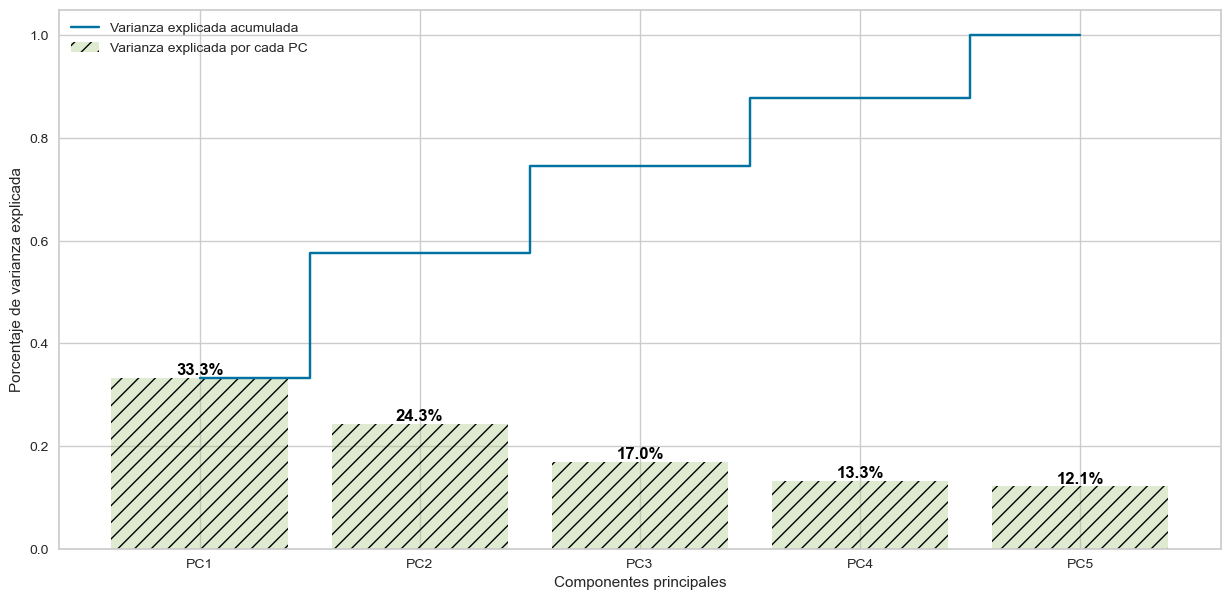

In [244]:
labels = ['PC' + str(x) for x in range(1, len(var_exp)+1)]
plt.figure(figsize=(15, 7))
bars = plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', 
         tick_label=labels, color = 'g',hatch='//')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{round(var_exp[i]*100,1)}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

Encontramos que entre los primeros 4 componentes principales tenemos el 87.9% de la información


In [245]:
np.sum(pca.explained_variance_ratio_[0:4])

0.8786719699437213

Ahora utilizamos los 4 primeros componentes, obteniendo un dataframe con las nuevas variables. En este caso particular, como nuestro objetivo es la predicción, no vamos a caracterizar las nuevas variables (esto sería útil si quisiésemos interpretar los resultados utilizando las variables generadas por el PCA)



In [246]:
pca = PCA(n_components=4)
pca_ = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_, columns=['pc1','pc2','pc3','pc4'],index=df.index)
print('\nFinal PCA:')
pca_df


Final PCA:


pc1       pc2       pc3       pc4
0    1.407518 -1.300857  0.474336 -0.144057
1    2.465536 -1.177799 -0.567309  0.508807
2    1.682942 -0.491761  1.679292  0.754032
3   -1.127658 -1.728856  1.785142 -1.878347
4   -1.133645 -0.604346  0.560158 -1.107752
..        ...       ...       ...       ...
715  1.892434  2.745699 -0.139976  1.245855
716  1.902754  0.468972  0.166061 -0.548648
717  3.231901  0.716251 -0.778103 -0.565901
718  2.478173  1.219235 -2.009002  0.107371
719  2.705351  1.067071 -0.481379  0.040296

[720 rows x 4 columns]

In [247]:
# get categorical columns from df_wins
categorical_columns = df_wins.select_dtypes(include=['object']).columns

In [248]:
# Creamos un Transformer personalizado para realizar PCA sobre las variables numéricas
# Para dummificar las variables categóricas
class PCA_transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        cols = df_wins.select_dtypes(include=['object']).columns
        result = Remove_highly_correlated_features(cols).fit_transform(result)
        df_scaled = scaler.fit_transform(result.select_dtypes('number'))
        df_scaled = pd.DataFrame(df_scaled, columns=result.select_dtypes('number').columns)
        pca = PCA(n_components=4)
        pca_ = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(pca_, columns=['pc1','pc2','pc3','pc4'],index=df.index)
        for col in result.select_dtypes('object'):
            pca_df[col] = result[col] 
        pca_df = pd.get_dummies(pca_df,columns=pca_df.select_dtypes('object').columns,dtype=float)
        return pca_df

In [249]:
df_pca = PCA_transformer().fit_transform(df_wins)
df_pca

pc1       pc2       pc3       pc4
0    1.407518 -1.300857  0.474336 -0.144057
1    2.465536 -1.177799 -0.567309  0.508807
2    1.682942 -0.491761  1.679292  0.754032
3   -1.127658 -1.728856  1.785142 -1.878347
4   -1.133645 -0.604346  0.560158 -1.107752
..        ...       ...       ...       ...
715  1.892434  2.745699 -0.139976  1.245855
716  1.902754  0.468972  0.166061 -0.548648
717  3.231901  0.716251 -0.778103 -0.565901
718  2.478173  1.219235 -2.009002  0.107371
719  2.705351  1.067071 -0.481379  0.040296

[720 rows x 4 columns]

Hacemos uso de un pipeline para dejar listos nuestros dataframes que posteriormente utilizaremos para entrenar nuestros modelos

In [250]:
from sklearn.pipeline import Pipeline

elims = df.columns[~df.columns.isin(['country',
                                    'sex',
                                    'chest_pain_type',
                                    'fasting_blood_sugar',
                                    'number_of_major_vessels', 
                                    'target', 
                                    'exercise_induced_angina', 
                                    'the_slope_of_the_peak_exercise_ST_segment',
                                    'resting_electrocardiographic_results',
                                    'thal'])]

pipe_rem = Pipeline(steps = [('format target variable',Format_target()),
                   ('format features',Format_variables()),
                   ('impute null values',Imputer(cont,cat)),
                   ('winsorize values',Winsorizer(wins_dict,cont_vars)),
                   ('Remove highly correlated features',Remove_highly_correlated_features(elims)),
                   ('Dummify categorical variables',Dummify())])

df = df.apply(pd.to_numeric, errors='ignore')

df_pipeline_rem = pipe_rem.fit_transform(df)

In [251]:
# Construimos una función que nos permite obetener el X y el y para el dataframe de carros

def obtain_X_y(df):
    return df.drop(columns=['target']),df[['target']]

### 5. Protocolos de evaluación

In [252]:
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento
from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

# Particionamos los datos para nuestra primer versión
#X['rem'], y['rem'] = obtain_X_y(df_pipeline_rem)
X['rem'], y['rem'] = obtain_X_y(df_elims_dummified)

X_train['rem'], X_test['rem'], y_train['rem'], y_test['rem'] = train_test_split(X['rem'],y['rem'],random_state=1234,test_size=0.3)
print(X_train['rem'].shape)
print(X_test['rem'].shape)
print(y_train['rem'].shape)
print(y_test['rem'].shape)

(504, 29)
(216, 29)
(504, 1)
(216, 1)


In [253]:
df_elims_dummified.columns

Index(['age', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved', 'oldpeak', 'sex_0', 'sex_1',
       'fasting_blood_sugar_0', 'fasting_blood_sugar_1',
       'resting_electrocardiographic_results_0',
       'resting_electrocardiographic_results_1',
       'resting_electrocardiographic_results_2', 'exercise_induced_angina_0',
       'exercise_induced_angina_1',
       'the_slope_of_the_peak_exercise_ST_segment_1',
       'the_slope_of_the_peak_exercise_ST_segment_1.0',
       'the_slope_of_the_peak_exercise_ST_segment_2',
       'the_slope_of_the_peak_exercise_ST_segment_2.0',
       'the_slope_of_the_peak_exercise_ST_segment_3',
       'number_of_major_vessels_0', 'number_of_major_vessels_0.0',
       'number_of_major_vessels_1', 'number_of_major_vessels_2',
       'number_of_major_vessels_3', 'thal_3', 'thal_3.0', 'thal_6', 'thal_7',
       'thal_7.0', 'target'],
      dtype='object')

In [254]:
categorical_colums_df = df_elims_dummified.columns[
                            ~df_elims_dummified.columns.isin(['age', 
                                                             'resting_blood_pressure', 
                                                             'serum_cholestoral',
                                                             'maximum_heart_rate_achieved', 
                                                             'oldpeak'])]

In [255]:
df_pca_concat = pd.concat([df_pca,df_elims_dummified[categorical_colums_df]], axis=1) 

In [256]:
# Particionamos los datos para nuestra segunda versión
#X['pca_rem'], y['pca_rem'] = obtain_X_y(df_pipeline_rem)
X['pca_rem'], y['pca_rem'] = obtain_X_y(df_pca_concat)

X_train['pca_rem'], X_test['pca_rem'], y_train['pca_rem'], y_test['pca_rem'] = train_test_split(X['pca_rem'],y['pca_rem'],random_state=1234,test_size=0.3)
print(X_train['pca_rem'].shape)
print(X_test['pca_rem'].shape)
print(y_train['pca_rem'].shape)
print(y_test['pca_rem'].shape)

(504, 28)
(216, 28)
(504, 1)
(216, 1)


### 6. Métricas de evaluación

Implementamos una función que nos permita calcular las métricas de regresión para el conjunto de entrenamiento y de prueba (Accuracy, Kappa, Precision, Recall)

Nos retornará el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de entrenamiento y el de prueba
- Accuracy = (TP + TN) / (TP + FP + FN + TN)
- Kappa = (OA - AC) / (1 - AC)
- Precision = TP / (TP + FP) (valor positivo predicho, la proporción correcta de identificaciones positivas)
- Recall = TP / (TP + FN) (la proporción de positivos que fueron identificados correctamente)

In [257]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score

def classification_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    prec_train = precision_score(y_train, y_pred_train,average=None,labels=[4,0,1,2,3])
    prec_test = precision_score(y_test, y_pred_test,average=None,labels=[4,0,1,2,3])
    recall_train = recall_score(y_train, y_pred_train,average=None,labels=[4,0,1,2,3])
    recall_test = recall_score(y_test, y_pred_test,average=None,labels=[4,0,1,2,3])   
    metrics = {"Training Accuracy": acc_train,
               "Test Accuracy": acc_test,
               "Training Kappa": kappa_train,
               "Test Kappa": kappa_test,
               "Training Precision": prec_train,
               "Test Precision": prec_test,
               "Training recall": recall_train,
               "Test recall": recall_test    
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics
    
def kappa_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    return kappa_train, kappa_test

### Baseline a partir del dummy classifier

Establecemos la línea base a partir de un dummy classifier que utiliza como estrategia la moda (ya que estamos trabajando con una tarea de clasificación)

In [258]:
from sklearn.dummy import DummyClassifier

classification_metrics(DummyClassifier(strategy='most_frequent'),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Training Accuracy = 0.5
Test Accuracy = 0.5
Training Kappa = 0.0
Test Kappa = 0.0
Training Precision = [0.  0.5 0.  0.  0. ]
Test Precision = [0.  0.5 0.  0.  0. ]
Training recall = [0. 1. 0. 0. 0.]
Test recall = [0. 1. 0. 0. 0.]


(DummyClassifier(strategy='most_frequent'),
 {'Training Accuracy': 0.5,
  'Test Accuracy': 0.5,
  'Training Kappa': 0.0,
  'Test Kappa': 0.0,
  'Training Precision': array([0. , 0.5, 0. , 0. , 0. ]),
  'Test Precision': array([0. , 0.5, 0. , 0. , 0. ]),
  'Training recall': array([0., 1., 0., 0., 0.]),
  'Test recall': array([0., 1., 0., 0., 0.])})

Training Accuracy = 50%, Test Accuracy = 50%

### Reporte de métricas y matriz de confusión

Vamos a definir una función para dibujar la matriz de confusión y el reporte de clasificación en donde podemos obtener las métricas de entrenamiento y prueba

In [259]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

def report_and_conf_matrix(model,X_train,X_test,y_train,y_test):
    md = model.fit(X_train,y_train)
    y_pred_train = md.predict(X_train)
    y_pred_test = md.predict(X_test)
    cnf_matrix1 = confusion_matrix(y_train, y_pred_train)
    cnf_matrix2 = confusion_matrix(y_test, y_pred_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix1, classes=["4","0","1","2","3"],
                      title='Matriz de confusión Entrenamiento')
    print("Reporte Entrenamiento")  
    print(classification_report(y_train, y_pred_train, target_names=["4","0","1","2","3"]))
    plt.show()
    plt.figure()
    plot_confusion_matrix(cnf_matrix2, classes=["4","0","1","2","3"],
                      title='Matriz de confusión Prueba')
    print("Reporte Prueba")  
    print(classification_report(y_test, y_pred_test, target_names=["4","0","1","2","3"]))
    plt.show()



### Área bajo la curva ROC

Vamos a utilizar el área bajo la curva ROC para evaluar nuestro modelo también. Con esta gráfica vamos a poder visualizar el desempeño del modelo entre la sensibilidad (recall - true positive rate) y la especificidad (true negative rate 1 - FPR), de manera que podamos establecer un balance entre ambos.
- La curva ROC hace un plot entre el TPR y el FPR
- Recall es la habilidad para identificar correctamente las observaciones que son positivas
- Especificidad es la habilidad para indentificar correctamente las observaciones que son negativas
- AUC ROC nos permite identificar que tan bien nuestro modelo puede distinguir entre las clases. 

Al tener nosotros un problema multi - clase utilizaremos una metodología uno vs el resto. Se tendrán tantas curvas como clases. Yellowbrick es muy útil y simple para esto

- Utilizando las curvas individuales podemos ver que tan bien nuestro modelo trabaja para cada una de las categorías 

- La curva micro-average ROC agrega todas las instancias sobre todas las clases y nos brinda una sola curva para todas las predicciones (afectada por la moda).

- La curva macro-average ROC trata clase de manera independiente y nos presenta una curva ROC que es el promedio de los valores para cada clase (cada clase tiene la misma importancia).

In [260]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={
                                        0: 'neutral', 
                                        1: 'riesgo 1', 
                                        2: 'riesgo 2',
                                        3: 'riesgo 3',
                                        4: 'riesgo 4'})                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

Podemos observar el funcionamiento de la curva ROC y el área bajo ella utilizando uno de los modelos más sencillos para abordar tareas de clasificación, la regresión logística.

In [261]:
# get numeric columns of X_train['rem']
numeric_columns = X_train['rem'].select_dtypes(include=['float64']).columns
numeric_columns

Index(['age', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved', 'oldpeak', 'sex_0', 'sex_1',
       'fasting_blood_sugar_0', 'fasting_blood_sugar_1',
       'resting_electrocardiographic_results_0',
       'resting_electrocardiographic_results_1',
       'resting_electrocardiographic_results_2', 'exercise_induced_angina_0',
       'exercise_induced_angina_1',
       'the_slope_of_the_peak_exercise_ST_segment_1',
       'the_slope_of_the_peak_exercise_ST_segment_1.0',
       'the_slope_of_the_peak_exercise_ST_segment_2',
       'the_slope_of_the_peak_exercise_ST_segment_2.0',
       'the_slope_of_the_peak_exercise_ST_segment_3',
       'number_of_major_vessels_0', 'number_of_major_vessels_0.0',
       'number_of_major_vessels_1', 'number_of_major_vessels_2',
       'number_of_major_vessels_3', 'thal_3', 'thal_3.0', 'thal_6', 'thal_7',
       'thal_7.0'],
      dtype='object')

In [262]:
for col in numeric_columns:
	X_train['rem'][col] = X_train['rem'][col].astype(int)
X_train['rem']

age  resting_blood_pressure  serum_cholestoral  \
95    52                     128                255   
427   52                     140                204   
206   58                     128                259   
59    51                     125                213   
13    44                     120                263   
..   ...                     ...                ...   
664   57                     160                  0   
372   44                     130                215   
204   43                     110                211   
53    44                     130                219   
294   63                     124                197   

     maximum_heart_rate_achieved  oldpeak  sex_0  sex_1  \
95                           161        0      0      1   
427                          140        0      1      0   
206                          130        3      0      1   
59                           125        1      0      1   
13                           173        0      0      1   
..                           ...      ...    ...    ...   
664                           98        2      0      1   
372                          135        0      0      1   
204                          161        0      0      1   
53                           188        0      0      1   
294                          136        0      1      0   

     fasting_blood_sugar_0  fasting_blood_sugar_1  \
95                       1                      0   
427                      1                      0   
206                      1                      0   
59                       1                      0   
13                       1                      0   
..                     ...                    ...   
664                      1                      0   
372                      1                      0   
204                      1                      0   
53                       1                      0   
294                      1                      0   

     resting_electrocardiographic_results_0  ...  number_of_major_vessels_0  \
95                                        1  ...                          0   
427                                       1  ...                          1   
206                                       0  ...                          0   
59                                        0  ...                          0   
13                                        1  ...                          1   
..                                      ...  ...                        ...   
664                                       1  ...                          1   
372                                       1  ...                          1   
204                                       1  ...                          1   
53                                        0  ...                          1   
294                                       1  ...                          1   

     number_of_major_vessels_0.0  number_of_major_vessels_1  \
95                             0                          1   
427                            0                          0   
206                            0                          0   
59                             0                          1   
13                             0                          0   
..                           ...                        ...   
664                            0                          0   
372                            0                          0   
204                            0                          0   
53                             0                          0   
294                            0                          0   

     number_of_major_vessels_2  number_of_major_vessels_3  thal_3  thal_3.0  \
95                           0                          0       0         0   
427                          0                          0       1         0   
206                          1                         

In [263]:
y_train['rem'] = y_train['rem'].astype(int)
y_train['rem']

target
95        1
427       0
206       3
59        0
13        0
..      ...
664       2
372       0
204       0
53        0
294       1

[504 rows x 1 columns]

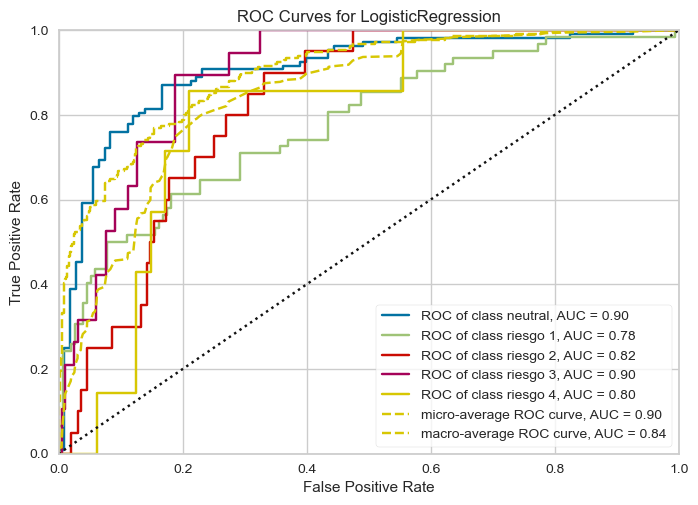

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=LogisticRegression(random_state=1234))

In [264]:
plot_ROC_curve(LogisticRegression(random_state=1234), X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])

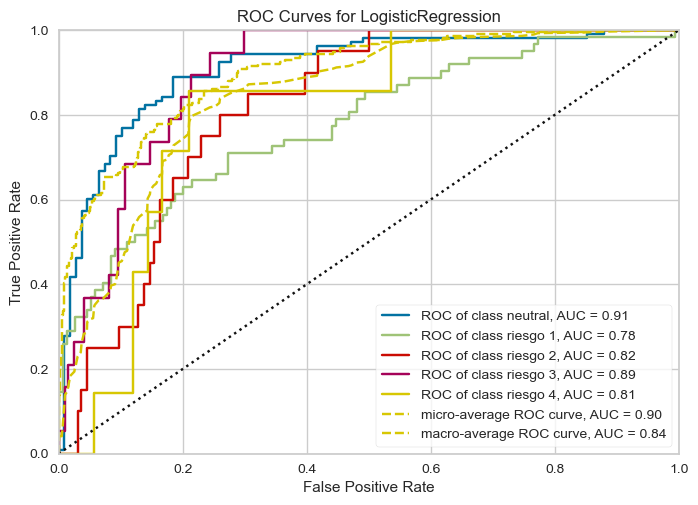

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=LogisticRegression(random_state=1234))

In [265]:
plot_ROC_curve(LogisticRegression(random_state=1234), 
               X_train=X_train['rem'].astype(int), 
               y_train=y_train['rem'].astype(int), 
               X_test=X_test['rem'].astype(int), 
               y_test=y_test['rem'].astype(int))

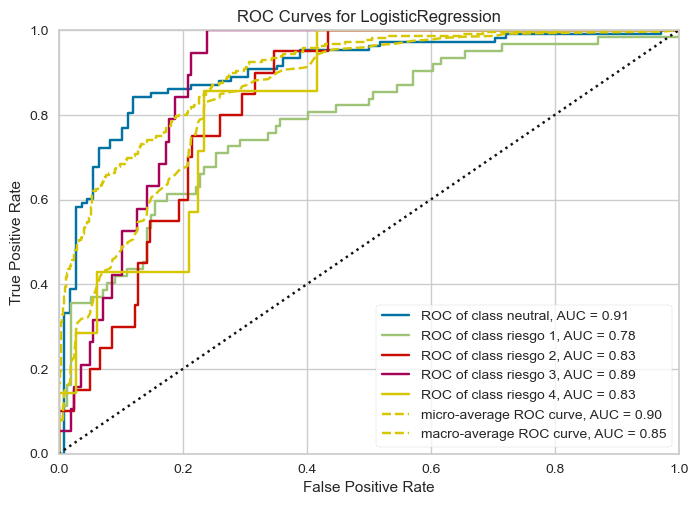

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=LogisticRegression(random_state=1234))

In [266]:
plot_ROC_curve(LogisticRegression(random_state=1234), 
               X_train=X_train['pca_rem'], 
               y_train=y_train['pca_rem'].astype(int), 
               X_test=X_test['pca_rem'], 
               y_test=y_test['pca_rem'].astype(int))

Se puede observar que el conjunto de datos al que se le ha realizado el PCA presenta mucho mejor desempeño. Más adelante ahondaremos más en esto.

### 7. Implementación de modelos

#### 7.1. Modelo de Regresión Logística

Trabajamos sobre el conjunto de datos con eliminación de variables altamente correlacionadas entre sí.

In [267]:
from sklearn.linear_model import LogisticRegression

classification_metrics(LogisticRegression(random_state=1234),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

Training Accuracy = 0.6309523809523809
Test Accuracy = 0.625
Training Kappa = 0.37654460568494696
Test Kappa = 0.38889276982186527
Training Precision = [0.   0.75 0.46 0.38 0.75]
Test Precision = [0.   0.82 0.45 0.   0.33]
Training recall = [0.   0.9  0.56 0.06 0.13]
Test recall = [0.   0.83 0.69 0.   0.11]


(LogisticRegression(random_state=1234),
 {'Training Accuracy': 0.6309523809523809,
  'Test Accuracy': 0.625,
  'Training Kappa': 0.37654460568494696,
  'Test Kappa': 0.38889276982186527,
  'Training Precision': array([0.  , 0.75, 0.46, 0.38, 0.75]),
  'Test Precision': array([0.  , 0.82, 0.45, 0.  , 0.33]),
  'Training recall': array([0.  , 0.9 , 0.56, 0.06, 0.13]),
  'Test recall': array([0.  , 0.83, 0.69, 0.  , 0.11])})

In [268]:
# Guardamos el mejor modelo con regresión logística

import pickle
from sklearn.linear_model import LogisticRegressionCV

model,metrics = classification_metrics(LogisticRegressionCV(cv=5,random_state=1234),
                                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/logisticRegressionRem.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionRemMetrics.pkl', 'wb'))

Training Accuracy = 0.6607142857142857
Test Accuracy = 0.6620370370370371
Training Kappa = 0.44197249488487744
Test Kappa = 0.4722008368200836
Training Precision = [0.   0.77 0.53 0.29 0.54]
Test Precision = [0.   0.85 0.55 0.27 0.38]
Training recall = [0.   0.91 0.53 0.15 0.41]
Test recall = [0.   0.84 0.65 0.2  0.42]


Dentro del contexto en el que nos encontramos trabajando, sería bueno entender que tipo de errores desearíamos que nuestro modelo evitara.

Teniendo en cuenta que actuamos como una compañía aseguradora y queremos predecir el riesgo, quizás sería más importante al tomar como positiva la categoría más riesgosa, predecir que no es riesgosa y que sí lo sea (FN), es decir un recall más alto. Por otro lado al tomar como positiva la categoría menos riesgosa y predecir que no es riesgosa y que sí lo sea es un problema (FP), es decir una precision más alta.

In [269]:
# Los hiperparámetros del mejor modelo de regresión logística

model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.77      0.91      0.83       252
           0       0.53      0.53      0.53       147
           1       0.29      0.15      0.19        48
           2       0.54      0.41      0.47        46
           3       0.00      0.00      0.00        11

    accuracy                           0.66       504
   macro avg       0.43      0.40      0.41       504
weighted avg       0.62      0.66      0.63       504



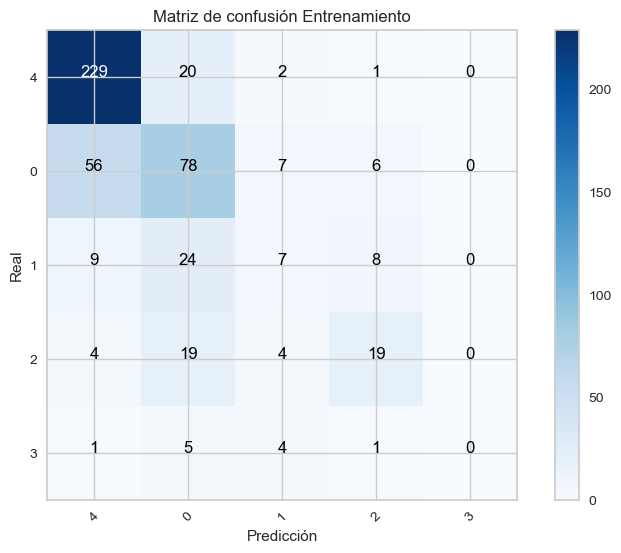

Reporte Prueba
              precision    recall  f1-score   support

           4       0.85      0.84      0.85       108
           0       0.55      0.65      0.59        62
           1       0.27      0.20      0.23        20
           2       0.38      0.42      0.40        19
           3       0.00      0.00      0.00         7

    accuracy                           0.66       216
   macro avg       0.41      0.42      0.41       216
weighted avg       0.64      0.66      0.65       216



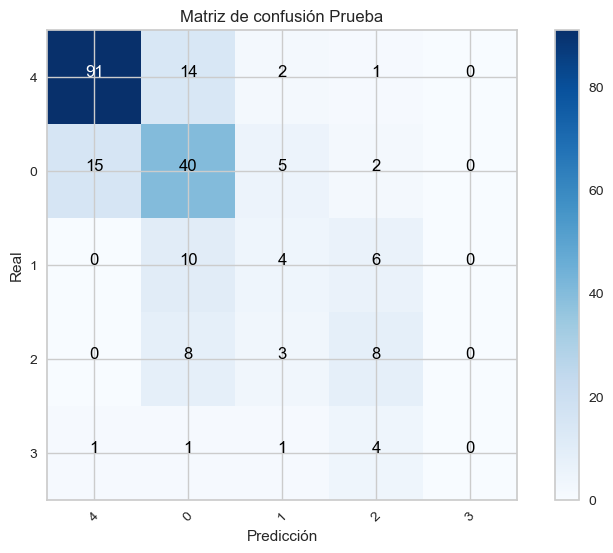

In [270]:
report_and_conf_matrix(LogisticRegressionCV(cv=5,random_state=1234),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

Obtenemos el reporte y la matriz de confusión para nuestro mejor modelo de regresión logística con todas las variables.

Con base en el reporte de entrenamiento podemos observar dos métricas importantes
- Precision (para ver si tenemos un nivel alto de correctitud para la clase positiva). Una mayor precision disminuye los falsos positivos (en este caso desearíamos mayor precisión sobre las categorías de menos riesgo)
- Recall (para ver qué porcentaje de las muestras puede el modelo identificar que pertenecen a la clase positiva). Un mayor recall indica que los falsos negativos disminuyen (en este caso desearíamos mayor sensibilidad sobre las categorías de mayor riesgo)

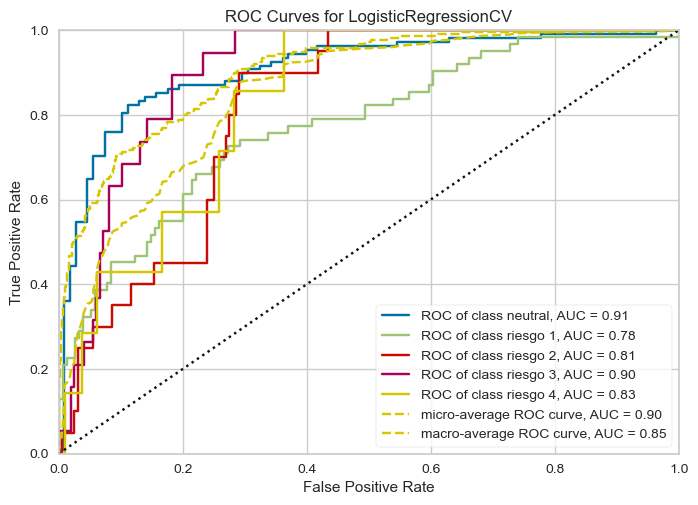

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=LogisticRegressionCV(cv=5, random_state=1234))

In [271]:
plot_ROC_curve(LogisticRegressionCV(cv=5,random_state=1234), 
               X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

- La curva micro-average arroja un valor adecuado de 0.90
- La curva macro-average arroja un valor adecuado de 0.85


Aunque previamente, en la etapa de ingeniería de características habíamos creado nuevas variables y eliminado otras, en esta etapa verificaremos la importancia de las variables independientes con respecto a la objetivo utilizando distintos métodos. 

Esto con el fin de hallar el mejor grupo de variables que sirvan como insumo para nuestros modelos.

### Selección de características

En este caso hacemos uso de SelectKBest que nos permite seleccionar las k mejores variables independientes teniendo en cuenta el f_classif. Construimos una función que a partir del conjunto de entrenamiento y el de prueba nos retorna los conjuntos ya transformados

In [272]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
def select_features(X_train, y_train, X_test,n):
  fs = SelectKBest(score_func=f_classif, k=n)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

Revizamos la importancia de las variables en el conjunto de datos sin PCA

Feature 0: 10.323352
Feature 1: 1.299706
Feature 2: 17.487164
Feature 3: 27.005912
Feature 4: 25.095515
Feature 5: 12.121497
Feature 6: 12.121497
Feature 7: 0.908788
Feature 8: 0.908788
Feature 9: 3.894364
Feature 10: 0.681920
Feature 11: 4.142420
Feature 12: 37.742669
Feature 13: 37.742669
Feature 14: 4.785785
Feature 15: 0.248506
Feature 16: 3.224848
Feature 17: 0.248506
Feature 18: 2.928683
Feature 19: 18.350140
Feature 20: 0.248506
Feature 21: 5.154461
Feature 22: 12.069505
Feature 23: 5.843701
Feature 24: 29.150737
Feature 25: 0.248506
Feature 26: 2.516746
Feature 27: 25.802853
Feature 28: 0.248506


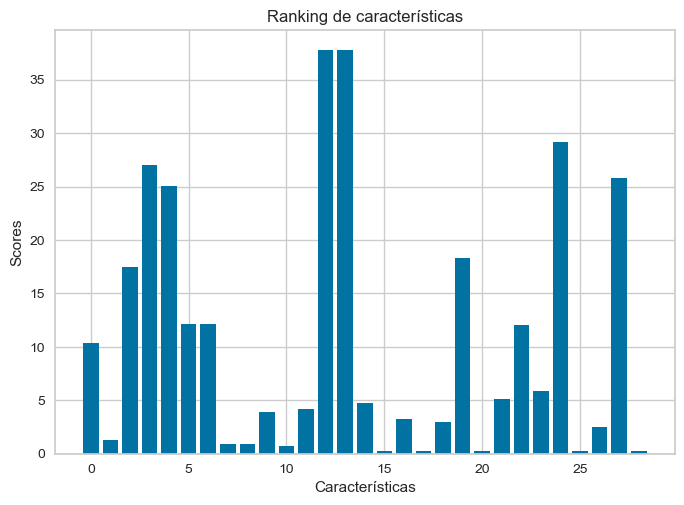

In [273]:
# Haciendo uso de los conjuntos ya transformados podemos ver el score de cada variable
# En este caso utilizamos todas las variables

n = X_train['rem'].shape[1]

X_train['rem_fs'], X_test['rem_fs'], fs = select_features(X_train['rem'], y_train['rem'], X_test['rem'],n)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fig, ax = plt.subplots()
ax.bar([i for i in range(len(fs.scores_))], fs.scores_)
ax.set(title='Ranking de características',xlabel='Características',ylabel='Scores')
plt.show()

Index(['sex_0', 'serum_cholestoral', 'resting_blood_pressure', 'oldpeak',
       'maximum_heart_rate_achieved'],
      dtype='object')


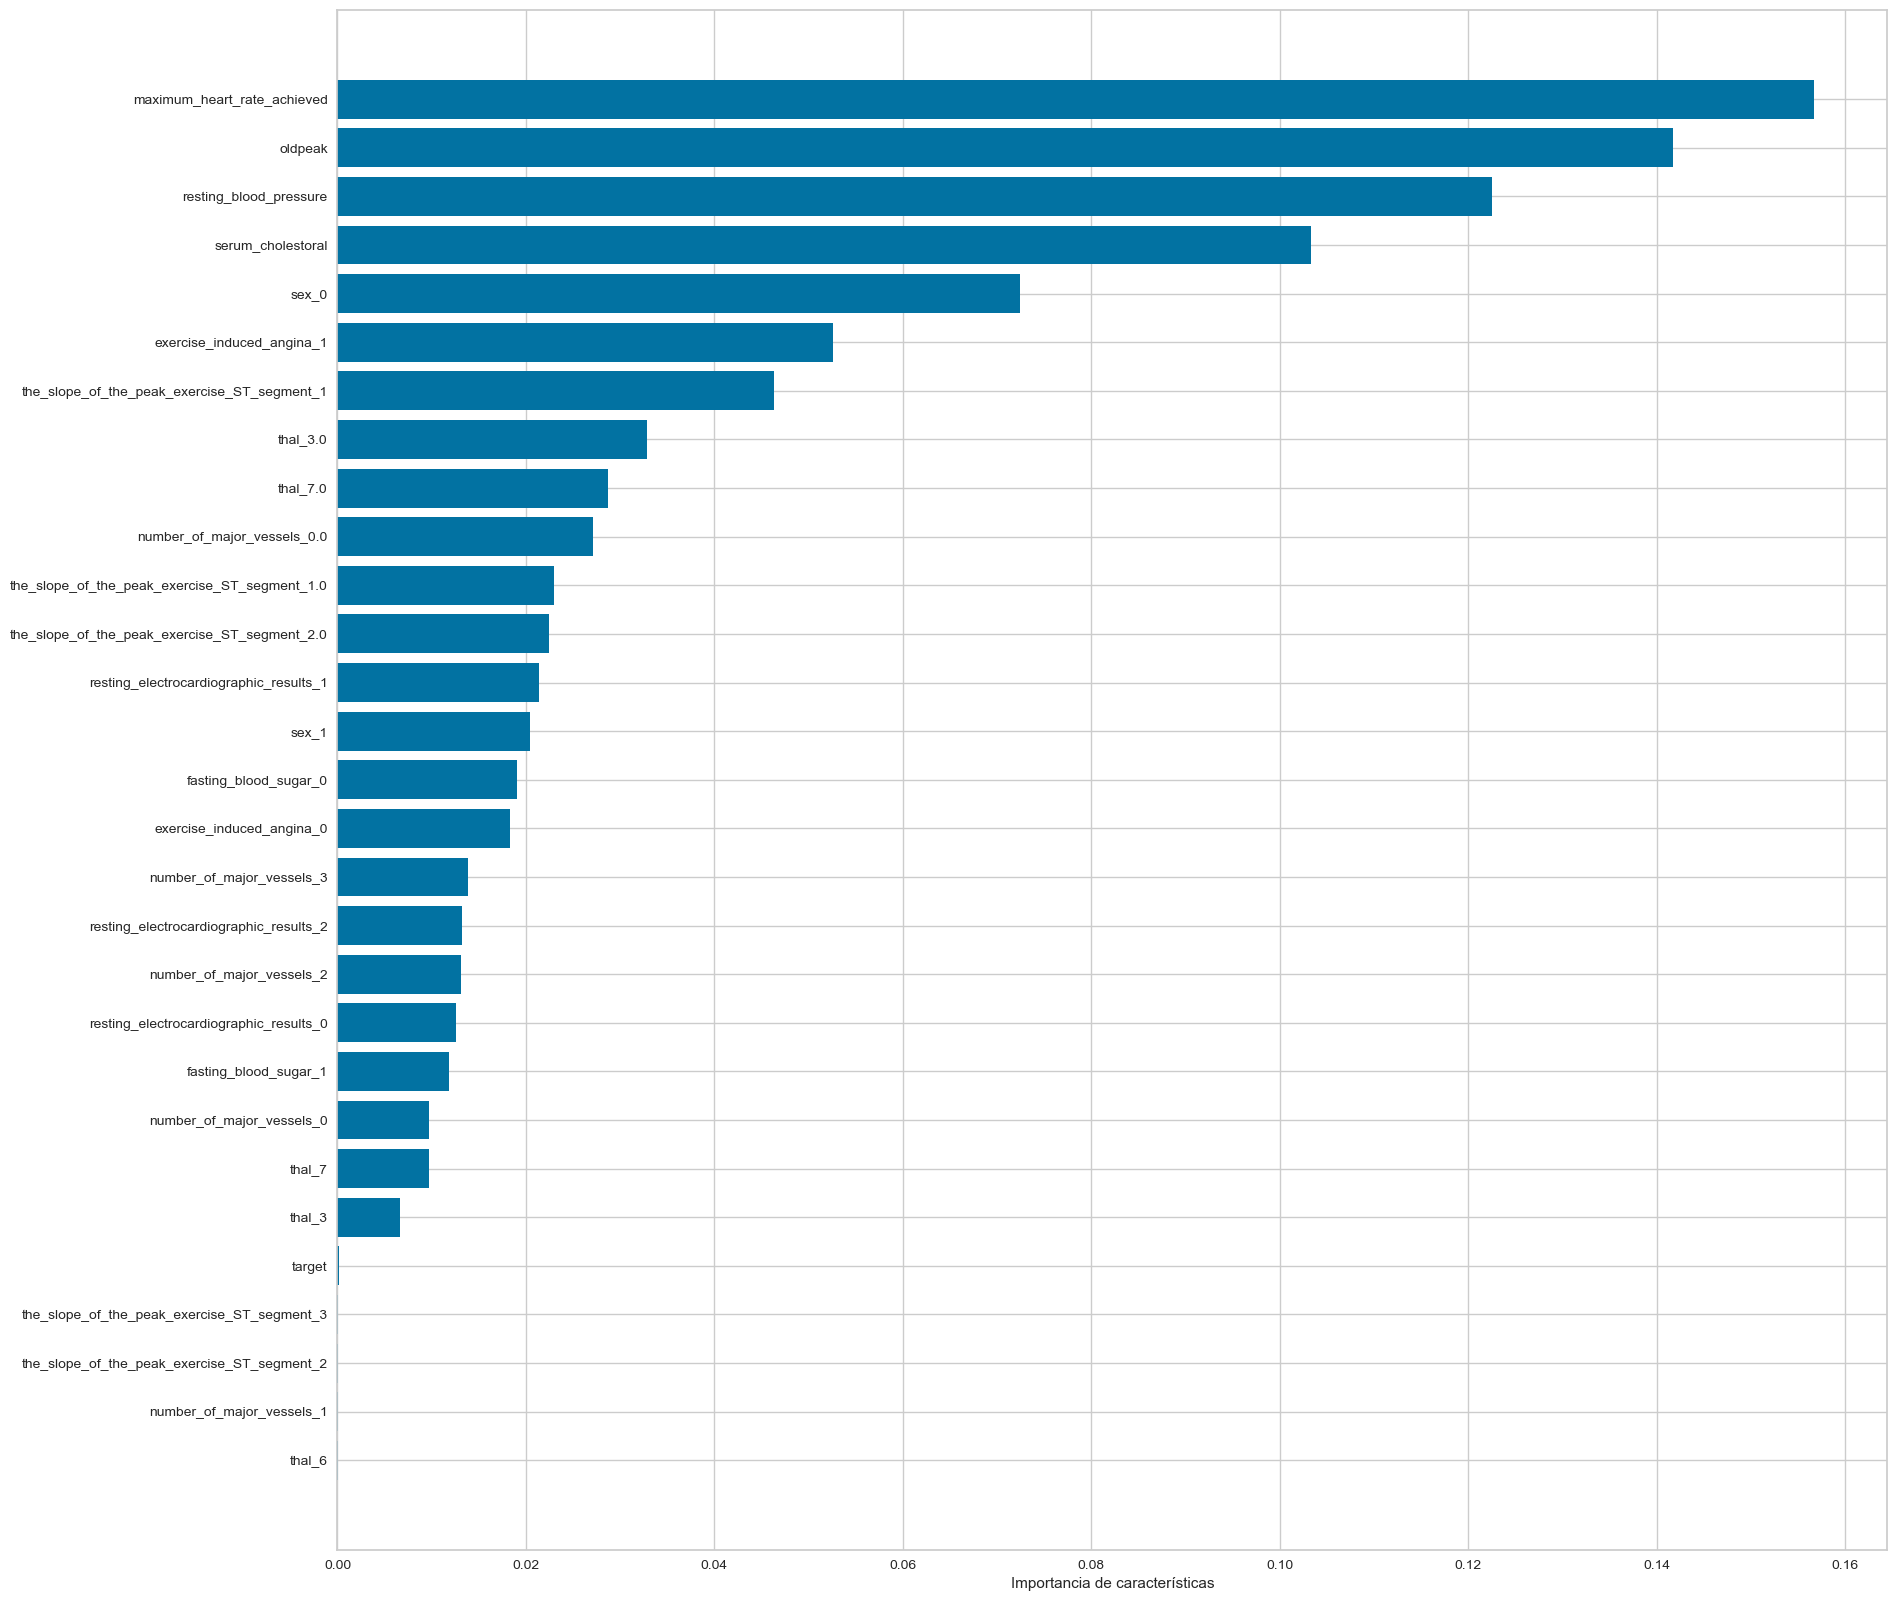

In [274]:
# Haciendo uso de un modelo de Random Forest Classifier hacemos un ranking de características
# Ordenamos y graficamos

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=150,random_state=1234)
rf.fit(X_train['rem'], y_train['rem'])
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(df_elims_dummified.columns[1:][sort], rf.feature_importances_[sort])
plt.xlabel("Importancia de características")
l = len(df_elims_dummified.columns[1:])
importants = df_elims_dummified.columns[1:][sort][-5:]
print(importants)


Revisamos el ranking de variables para el conjunto de datos con PCA

Index(['exercise_induced_angina_1', 'sex_0', 'pc4', 'pc3', 'pc2'], dtype='object')


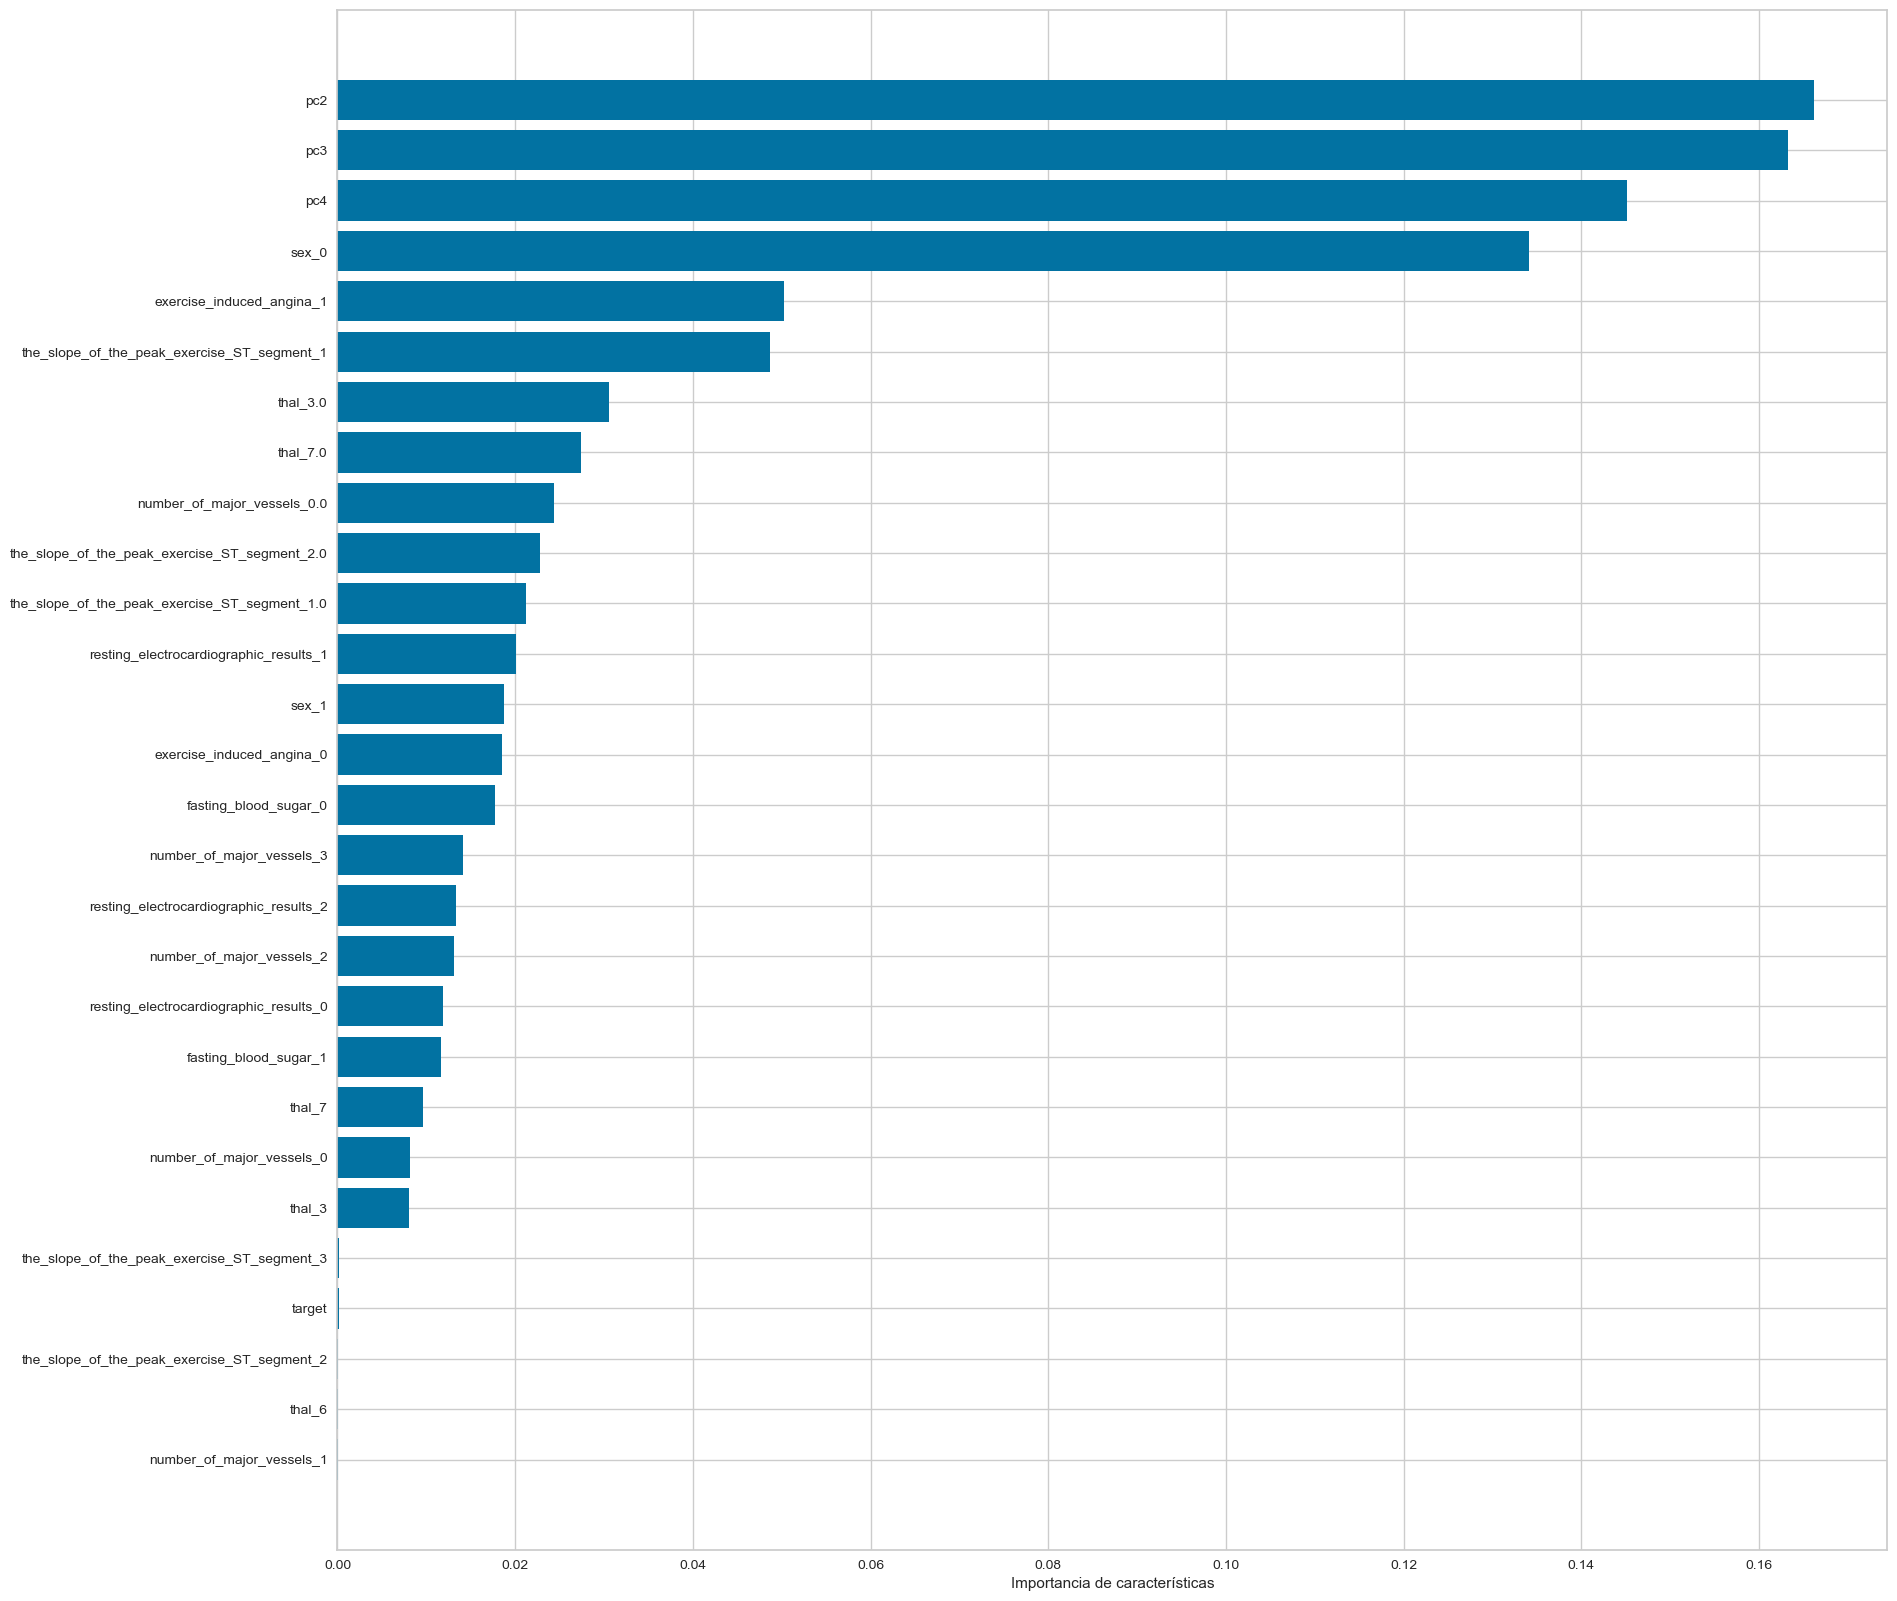

In [275]:
rf = RandomForestClassifier(n_estimators=150,random_state=1234)
rf.fit(X_train['pca_rem'], y_train['pca_rem'])
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(df_pca_concat.columns[1:][sort], rf.feature_importances_[sort])
plt.xlabel("Importancia de características")
l = len(df_pca_concat.columns[1:])
importants = df_pca_concat.columns[1:][sort][-5:]
print(importants)

Revisamos la cantidad de variables a seleccionar para el conjunto de datos sin PCA

(0.413515687851971, 22)


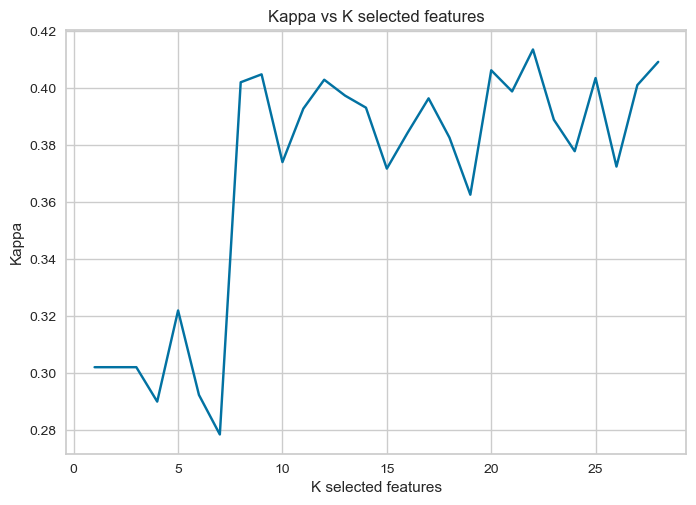

In [276]:
from sklearn.pipeline import make_pipeline

n = X_train['rem'].shape[1]
results = [kappa_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=i),
                                                 StandardScaler(),
                                                 RandomForestClassifier(n_estimators=150,random_state=1234)),
            X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))[1] for i in range(1,n)]
ax = sns.lineplot(x=range(1,n),
             y=results)
ax.set(title="Kappa vs K selected features",ylabel='Kappa',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,n))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

Cantidad de variables a seleccionar para conjunto de datos sin PCA k = 27

Revisamos la cantidad de variables a seleccionar del conjunto de datos con PCA

(0.4119584579706248, 12)


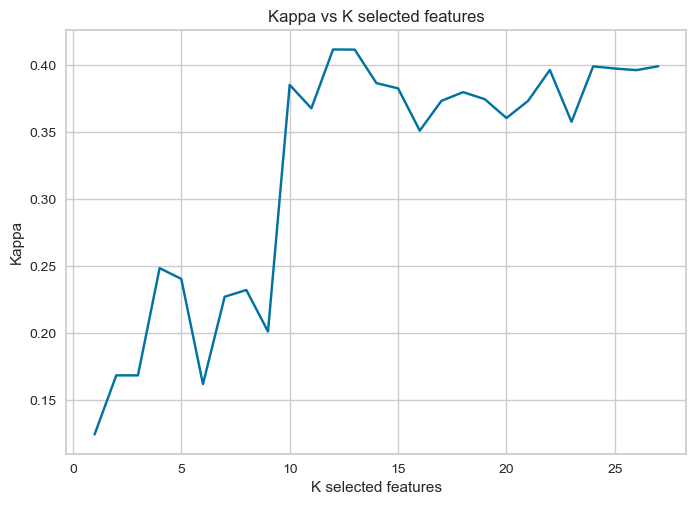

In [277]:
n = X_train['pca_rem'].shape[1]
results = [kappa_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=i),
                                                 StandardScaler(),
                                                 RandomForestClassifier(n_estimators=150,random_state=1234)),
            X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])[1] for i in range(1,n)]
ax = sns.lineplot(x=range(1,n),
             y=results)
ax.set(title="Kappa vs K selected features",ylabel='Kappa',xlabel='K selected features')
kvals = [(col,i) for col,i in zip(results,range(1,n))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [278]:
# Modelo de regresión logística utilizando datos sin PCA y feature selection de 31 variables

model,metrics = classification_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=31),
                                                 LogisticRegressionCV(cv=5,random_state=1234)),
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/logisticRegressionRemFS.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionRemFSMetrics.pkl', 'wb'))

Training Accuracy = 0.6607142857142857
Test Accuracy = 0.6620370370370371
Training Kappa = 0.44197249488487744
Test Kappa = 0.4722008368200836
Training Precision = [0.   0.77 0.53 0.29 0.54]
Test Precision = [0.   0.85 0.55 0.27 0.38]
Training recall = [0.   0.91 0.53 0.15 0.41]
Test recall = [0.   0.84 0.65 0.2  0.42]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.77      0.91      0.83       252
           0       0.53      0.53      0.53       147
           1       0.29      0.15      0.19        48
           2       0.54      0.41      0.47        46
           3       0.00      0.00      0.00        11

    accuracy                           0.66       504
   macro avg       0.43      0.40      0.41       504
weighted avg       0.62      0.66      0.63       504



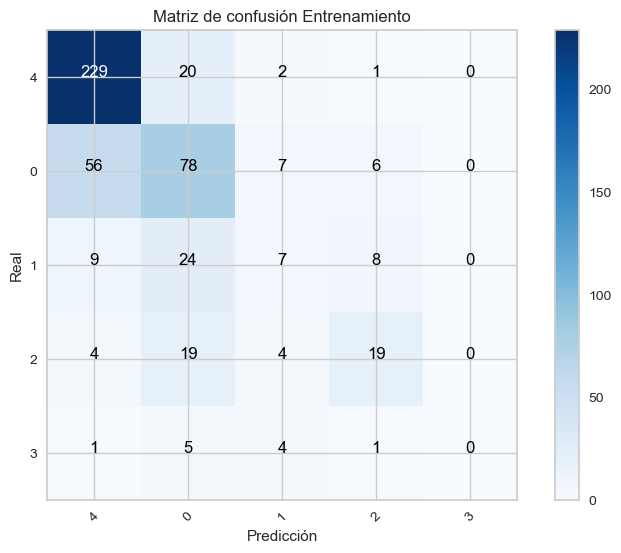

Reporte Prueba
              precision    recall  f1-score   support

           4       0.85      0.84      0.85       108
           0       0.55      0.65      0.59        62
           1       0.27      0.20      0.23        20
           2       0.38      0.42      0.40        19
           3       0.00      0.00      0.00         7

    accuracy                           0.66       216
   macro avg       0.41      0.42      0.41       216
weighted avg       0.64      0.66      0.65       216



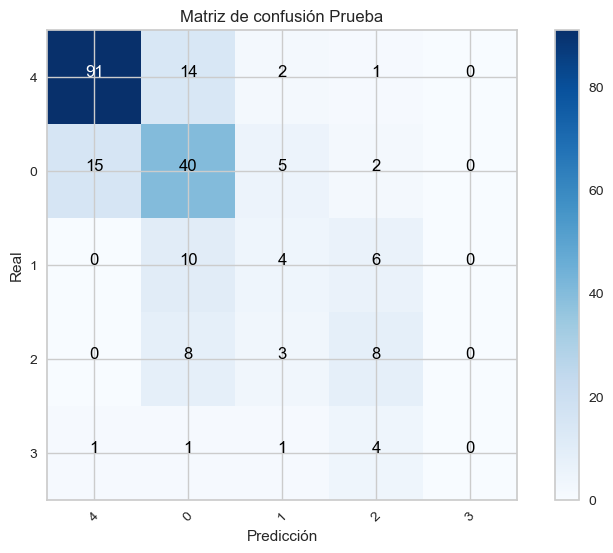

In [279]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif, k=31),
                                                 LogisticRegressionCV(cv=5,random_state=1234))
report_and_conf_matrix(pipeline_lr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

- La exactitud para la prueba de nuestro modelo es del 65%

- La precisión para la clase menos riesgosa es de 21% 

- La sensibilidad para la clase más riesgosa de 83% 

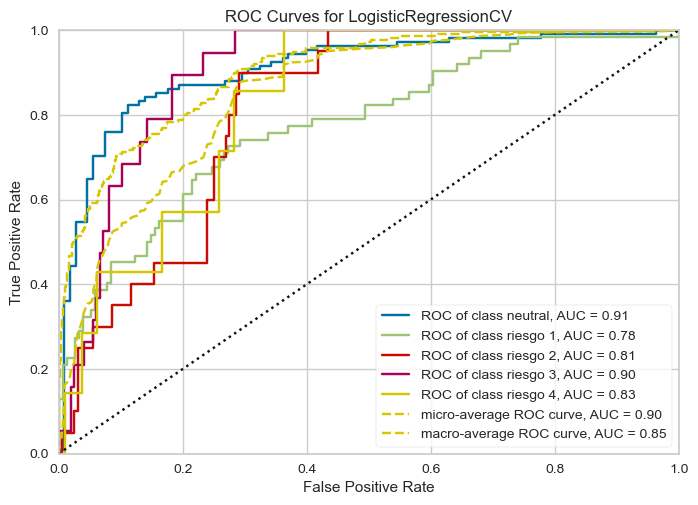

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('logisticregressioncv',
                                  LogisticRegressionCV(cv=5,
                                                       random_state=1234))]))

In [280]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif, k=31),
                                                 LogisticRegressionCV(cv=5,random_state=1234))
plot_ROC_curve(pipeline_lr, X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

- La curva micro-average arroja un valor adecuado de 0.90
- La curva macro-average arroja un valor adecuado de 0.85


Modelo de regresión logistica sobre conjunto de datos con PCA

In [281]:
model,metrics = classification_metrics(LogisticRegressionCV(cv=5,random_state=1234),
                                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/logisticRegressionPCARem.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionPCARemMetrics.pkl', 'wb'))

Training Accuracy = 0.6626984126984127
Test Accuracy = 0.6481481481481481
Training Kappa = 0.44641507239634826
Test Kappa = 0.44486151973217003
Training Precision = [0.   0.77 0.54 0.27 0.47]
Test Precision = [0.   0.84 0.53 0.22 0.3 ]
Training recall = [0.   0.91 0.54 0.08 0.46]
Test recall = [0.   0.85 0.63 0.1  0.37]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.77      0.91      0.84       252
           0       0.54      0.54      0.54       147
           1       0.27      0.08      0.13        48
           2       0.47      0.46      0.46        46
           3       0.00      0.00      0.00        11

    accuracy                           0.66       504
   macro avg       0.41      0.40      0.39       504
weighted avg       0.61      0.66      0.63       504



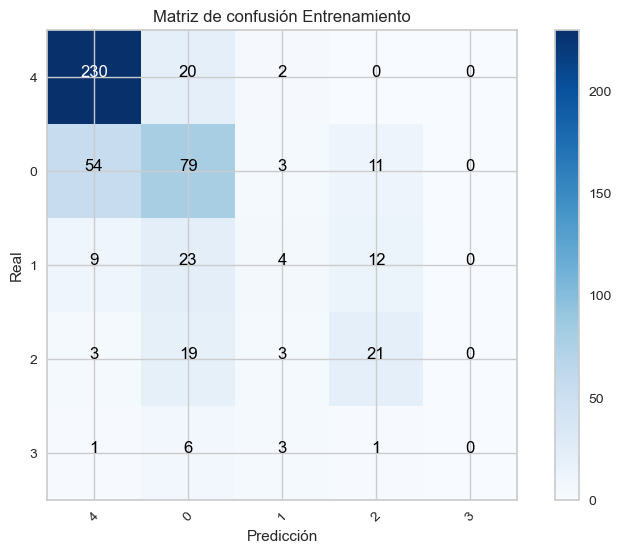

Reporte Prueba
              precision    recall  f1-score   support

           4       0.84      0.85      0.84       108
           0       0.53      0.63      0.57        62
           1       0.22      0.10      0.14        20
           2       0.30      0.37      0.33        19
           3       0.00      0.00      0.00         7

    accuracy                           0.65       216
   macro avg       0.38      0.39      0.38       216
weighted avg       0.62      0.65      0.63       216



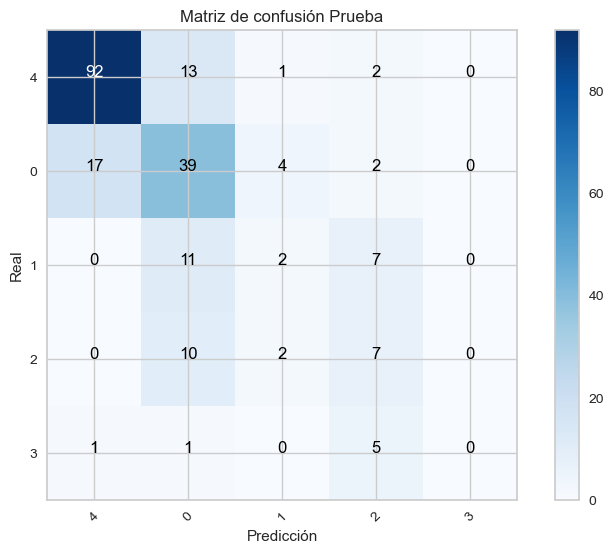

In [282]:
report_and_conf_matrix(LogisticRegressionCV(cv=5,random_state=1234),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

La exactitud para la prueba de nuestro modelo es del 81%

La precisión para la clase menos riesgosa es de 22% 

La sensibilidad para la clase más riesgosa de 85% 

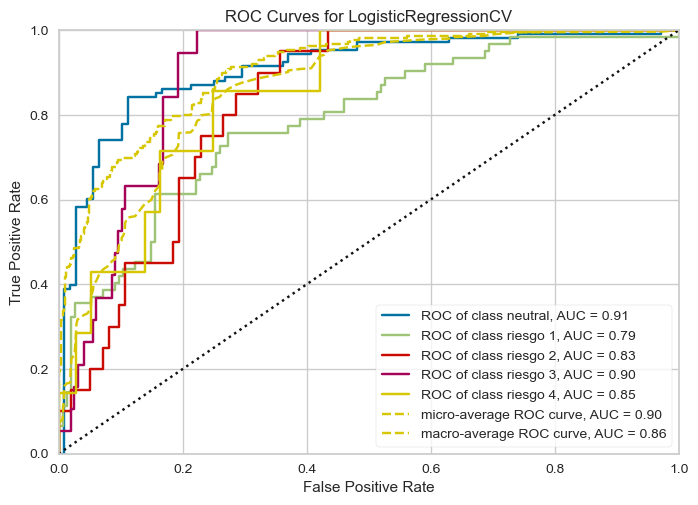

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=LogisticRegressionCV(cv=5, random_state=1234))

In [283]:
plot_ROC_curve(LogisticRegressionCV(cv=5,random_state=1234), 
               X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int), X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

Modelo de Regresión logística sobre conjunto de datos con PCA y feature selection

In [284]:
# Modelo de regresión logística utilizando datos con PCA y feature selection de 27 variables

model,metrics = classification_metrics(make_pipeline(SelectKBest(score_func=f_classif, k=27),
                                                 LogisticRegressionCV(cv=5,random_state=1234)),
                                   X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/logisticRegressionPCARemFS.pkl', 'wb'))
pickle.dump(metrics, open('metrics/logisticRegressionPCARemFSMetrics.pkl', 'wb'))

Training Accuracy = 0.6626984126984127
Test Accuracy = 0.6481481481481481
Training Kappa = 0.44641507239634826
Test Kappa = 0.44486151973217003
Training Precision = [0.   0.77 0.54 0.27 0.47]
Test Precision = [0.   0.84 0.53 0.22 0.3 ]
Training recall = [0.   0.91 0.54 0.08 0.46]
Test recall = [0.   0.85 0.63 0.1  0.37]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.77      0.91      0.84       252
           0       0.54      0.54      0.54       147
           1       0.27      0.08      0.13        48
           2       0.47      0.46      0.46        46
           3       0.00      0.00      0.00        11

    accuracy                           0.66       504
   macro avg       0.41      0.40      0.39       504
weighted avg       0.61      0.66      0.63       504



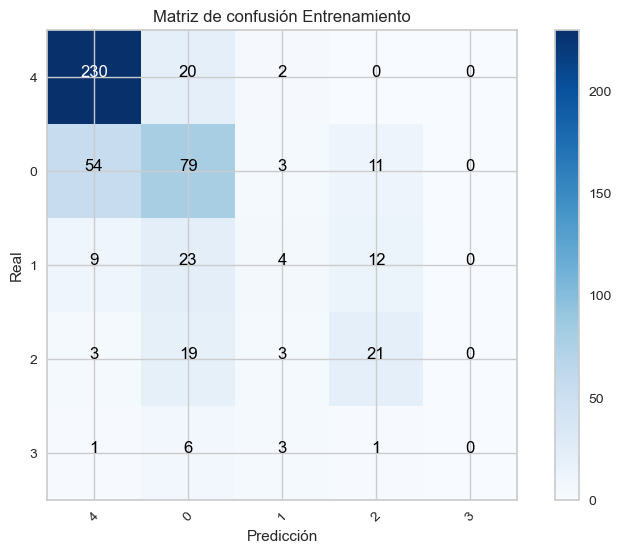

Reporte Prueba
              precision    recall  f1-score   support

           4       0.84      0.85      0.84       108
           0       0.53      0.63      0.57        62
           1       0.22      0.10      0.14        20
           2       0.30      0.37      0.33        19
           3       0.00      0.00      0.00         7

    accuracy                           0.65       216
   macro avg       0.38      0.39      0.38       216
weighted avg       0.62      0.65      0.63       216



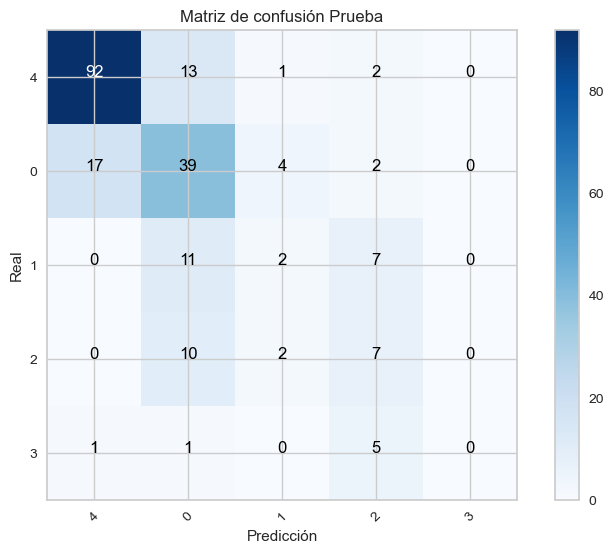

In [285]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            LogisticRegressionCV(cv=5,random_state=1234))
report_and_conf_matrix(pipeline_lr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

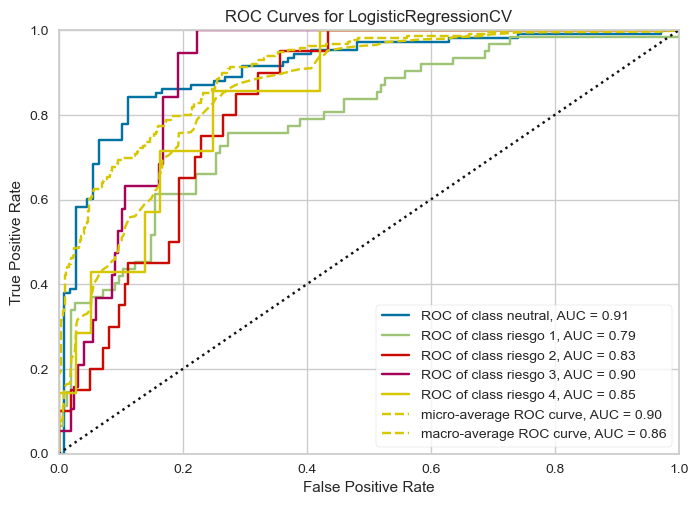

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=27)),
                                 ('logisticregressioncv',
                                  LogisticRegressionCV(cv=5,
                                                       random_state=1234))]))

In [286]:
pipeline_lr = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            LogisticRegressionCV(cv=5,random_state=1234))
plot_ROC_curve(pipeline_lr,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int), X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

### 7.3. Modelo de K vecinos más cercanos

Para este modelo tan solamente incluimos las variables continuas, pues es un método basado en distancias. No tienen sentido utilizar las variables categóricas dummificadas

In [287]:
X_train['rem']

age  resting_blood_pressure  serum_cholestoral  \
95    52                     128                255   
427   52                     140                204   
206   58                     128                259   
59    51                     125                213   
13    44                     120                263   
..   ...                     ...                ...   
664   57                     160                  0   
372   44                     130                215   
204   43                     110                211   
53    44                     130                219   
294   63                     124                197   

     maximum_heart_rate_achieved  oldpeak  sex_0  sex_1  \
95                           161        0      0      1   
427                          140        0      1      0   
206                          130        3      0      1   
59                           125        1      0      1   
13                           173        0      0      1   
..                           ...      ...    ...    ...   
664                           98        2      0      1   
372                          135        0      0      1   
204                          161        0      0      1   
53                           188        0      0      1   
294                          136        0      1      0   

     fasting_blood_sugar_0  fasting_blood_sugar_1  \
95                       1                      0   
427                      1                      0   
206                      1                      0   
59                       1                      0   
13                       1                      0   
..                     ...                    ...   
664                      1                      0   
372                      1                      0   
204                      1                      0   
53                       1                      0   
294                      1                      0   

     resting_electrocardiographic_results_0  ...  number_of_major_vessels_0  \
95                                        1  ...                          0   
427                                       1  ...                          1   
206                                       0  ...                          0   
59                                        0  ...                          0   
13                                        1  ...                          1   
..                                      ...  ...                        ...   
664                                       1  ...                          1   
372                                       1  ...                          1   
204                                       1  ...                          1   
53                                        0  ...                          1   
294                                       1  ...                          1   

     number_of_major_vessels_0.0  number_of_major_vessels_1  \
95                             0                          1   
427                            0                          0   
206                            0                          0   
59                             0                          1   
13                             0                          0   
..                           ...                        ...   
664                            0                          0   
372                            0                          0   
204                            0                          0   
53                             0                          0   
294                            0                          0   

     number_of_major_vessels_2  number_of_major_vessels_3  thal_3  thal_3.0  \
95                           0                          0       0         0   
427                          0                          0       1         0   
206                          1                         

In [288]:
# Escalamos y estandarizamos para ver los resultados del modelo

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

print('Stadardization')
knnReg_st = make_pipeline(StandardScaler(),KNeighborsClassifier())
#cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
cols = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']
classification_metrics(knnReg_st,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'].astype(int))
print()
print('Normalization')
knnReg_norm = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
classification_metrics(knnReg_norm,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'].astype(int))

Stadardization
Training Accuracy = 0.7063492063492064
Test Accuracy = 0.5462962962962963
Training Kappa = 0.5160888519825618
Test Kappa = 0.2685050798258346
Training Precision = [0.   0.76 0.65 0.53 0.67]
Test Precision = [0.   0.72 0.39 0.16 0.22]
Training recall = [0.   0.91 0.63 0.38 0.35]
Test recall = [0.   0.81 0.42 0.15 0.11]

Normalization
Training Accuracy = 0.6944444444444444
Test Accuracy = 0.5694444444444444
Training Kappa = 0.4946282767511818
Test Kappa = 0.2963922942206655
Training Precision = [0.   0.75 0.65 0.46 0.72]
Test Precision = [0.   0.72 0.42 0.21 0.14]
Training recall = [0.   0.91 0.61 0.35 0.28]
Test recall = [0.   0.82 0.48 0.15 0.05]


(Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 {'Training Accuracy': 0.6944444444444444,
  'Test Accuracy': 0.5694444444444444,
  'Training Kappa': 0.4946282767511818,
  'Test Kappa': 0.2963922942206655,
  'Training Precision': array([0.  , 0.75, 0.65, 0.46, 0.72]),
  'Test Precision': array([0.  , 0.72, 0.42, 0.21, 0.14]),
  'Training recall': array([0.  , 0.91, 0.61, 0.35, 0.28]),
  'Test recall': array([0.  , 0.82, 0.48, 0.15, 0.05])})

In [289]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la normalización y el clasificador knn 

#cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
    classification_metrics(knnReg_st,X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'].astype(int))
    print()

Results for k = 1
Training Accuracy = 1.0
Test Accuracy = 0.46296296296296297
Training Kappa = 1.0
Test Kappa = 0.1995655368495033
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.67 0.35 0.24 0.32]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.57 0.4  0.3  0.37]

Results for k = 3
Training Accuracy = 0.7242063492063492
Test Accuracy = 0.5231481481481481
Training Kappa = 0.541533326789045
Test Kappa = 0.21053191866860643
Training Precision = [0.5  0.75 0.68 0.68 0.79]
Test Precision = [0.   0.66 0.37 0.07 0.33]
Training recall = [0.18 0.92 0.65 0.44 0.33]
Test recall = [0.   0.81 0.37 0.05 0.11]

Results for k = 5
Training Accuracy = 0.6944444444444444
Test Accuracy = 0.5694444444444444
Training Kappa = 0.4946282767511818
Test Kappa = 0.2963922942206655
Training Precision = [0.   0.75 0.65 0.46 0.72]
Test Precision = [0.   0.72 0.42 0.21 0.14]
Training recall = [0.   0.91 0.61 0.35 0.28]
Test recall = [0.   0.82 0.48 0.15 0.05]

Results for k = 7
Training Accur

(0.36990394877267874, 19)


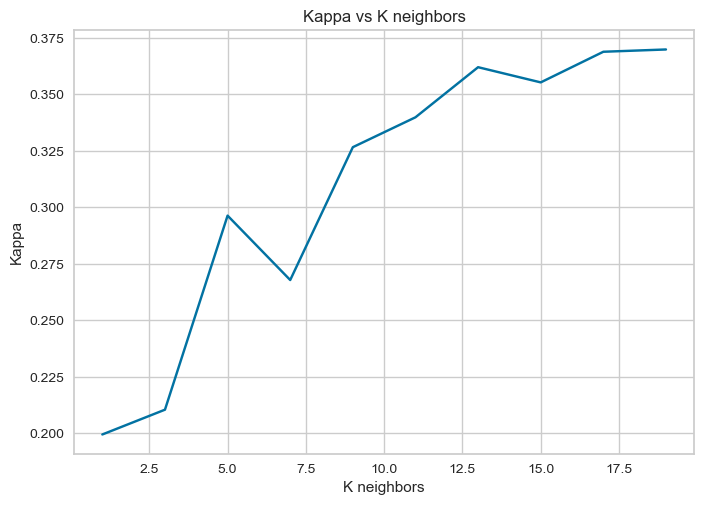

In [290]:
# Visualizamos el kappa
# Observamos la mejor respuesta con k=1

#cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
results = [kappa_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i)),
            X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'].astype(int))[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="Kappa vs K neighbors",ylabel='Kappa',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [291]:
# Guardamos el mejor modelo utilizando k=1 sin PCA

#cols = ['normalized_losses', 'width', 'height', 'bore', 'peak_rpm', 'price']
model,metrics = classification_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                                   X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/KnnClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnClassifierRemMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.46296296296296297
Training Kappa = 1.0
Test Kappa = 0.1995655368495033
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.67 0.35 0.24 0.32]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.57 0.4  0.3  0.37]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



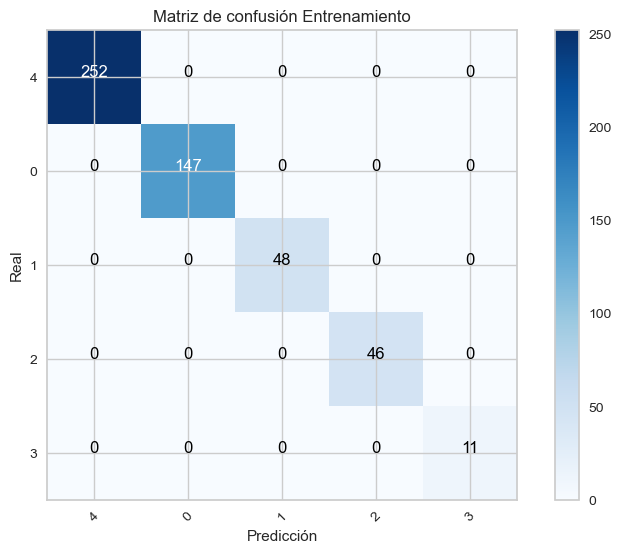

Reporte Prueba
              precision    recall  f1-score   support

           4       0.67      0.57      0.62       108
           0       0.35      0.40      0.37        62
           1       0.24      0.30      0.27        20
           2       0.32      0.37      0.34        19
           3       0.00      0.00      0.00         7

    accuracy                           0.46       216
   macro avg       0.32      0.33      0.32       216
weighted avg       0.49      0.46      0.47       216



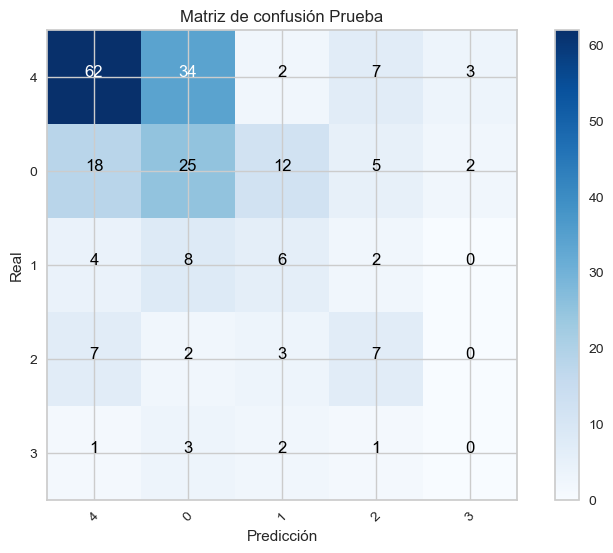

In [292]:
report_and_conf_matrix(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                       X_train['rem'][cols],X_test['rem'][cols],y_train['rem'],y_test['rem'].astype(int))

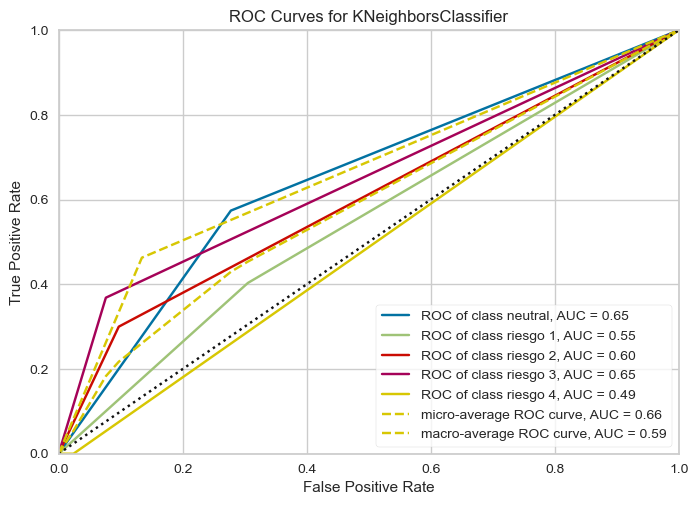

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=1))]))

In [293]:
plot_ROC_curve(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                X_train=X_train['rem'][cols], y_train=y_train['rem'],X_test=X_test['rem'][cols], y_test=y_test['rem'].astype(int))

Obtenemos peores resultados que con la regresión logística, las AUC micro y macro son de 0.66 y 0.59 respectivamente. Aunque aceptables, peores que los obtenidos previamente

Ahora trabajamos con el dataset con PCA

In [294]:
# Podemos encontrar el mejor k para nuestro modelo
# Utilizamos un pipeline para incluir la normalización y el clasificador knn 

cols = ['pc1','pc2','pc3','pc4']
for k in range(1,21,2):
    print('Results for k =',k)
    knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
    classification_metrics(knnReg_st,X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])
    print()

Results for k = 1
Training Accuracy = 1.0
Test Accuracy = 0.46296296296296297
Training Kappa = 1.0
Test Kappa = 0.17181199180273676
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.67 0.32 0.15 0.19]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.65 0.37 0.1  0.26]

Results for k = 3
Training Accuracy = 0.7083333333333334
Test Accuracy = 0.5509259259259259
Training Kappa = 0.514084645604738
Test Kappa = 0.23580260422365695
Training Precision = [0.   0.74 0.65 0.65 0.74]
Test Precision = [0.   0.64 0.43 0.   0.33]
Training recall = [0.   0.91 0.64 0.42 0.3 ]
Test recall = [0.   0.83 0.42 0.   0.16]

Results for k = 5
Training Accuracy = 0.6726190476190477
Test Accuracy = 0.5833333333333334
Training Kappa = 0.46091364635261023
Test Kappa = 0.3121262517249921
Training Precision = [0.   0.74 0.57 0.53 0.71]
Test Precision = [0.   0.7  0.44 0.33 0.3 ]
Training recall = [0.   0.88 0.57 0.35 0.37]
Test recall = [0.   0.86 0.4  0.25 0.16]

Results for k = 7
Training Acc

(0.3513513513513514, 13)


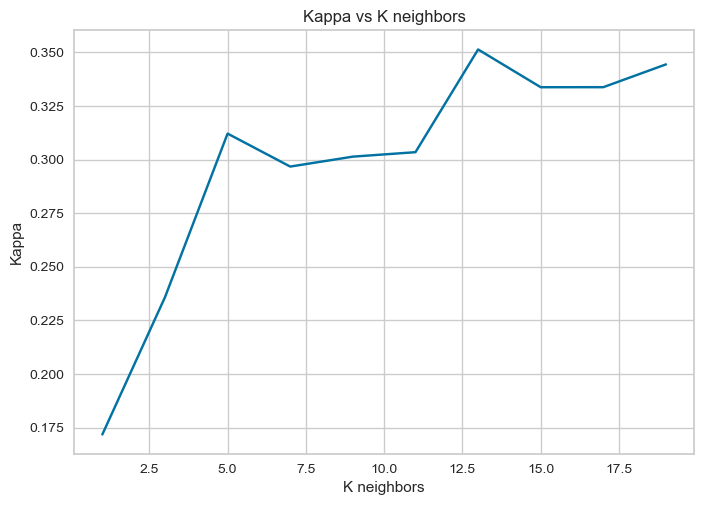

In [295]:
# Visualizamos el kappa
# Observamos la mejor respuesta con k=1

cols = ['pc1','pc2','pc3','pc4']
knnReg_st = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=k))
results = [kappa_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=i)),
            X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])[1] for i in range(1,21,2)]
ax = sns.lineplot(x=range(1,21,2),
             y=results)
ax.set(title="Kappa vs K neighbors",ylabel='Kappa',xlabel='K neighbors')
kvals = [(col,i) for col,i in zip(results,range(1,21,2))]

print(sorted(kvals, key=lambda x: x[0],reverse=True)[0])

In [296]:
# Guardamos el mejor modelo utilizando k=1 sin PCA

cols = ['pc1','pc2','pc3','pc4']
model,metrics = classification_metrics(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                                   X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/KnnClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/KnnClassifierPCARemMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.46296296296296297
Training Kappa = 1.0
Test Kappa = 0.17181199180273676
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.67 0.32 0.15 0.19]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.65 0.37 0.1  0.26]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



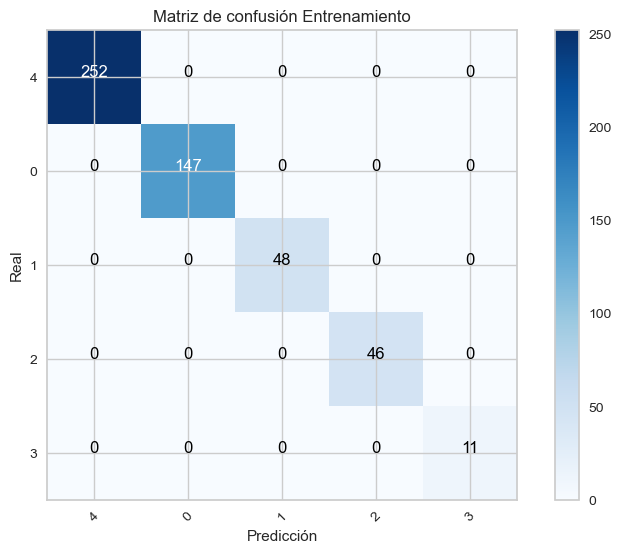

Reporte Prueba
              precision    recall  f1-score   support

           4       0.67      0.65      0.66       108
           0       0.32      0.37      0.35        62
           1       0.15      0.10      0.12        20
           2       0.19      0.26      0.22        19
           3       0.00      0.00      0.00         7

    accuracy                           0.46       216
   macro avg       0.27      0.28      0.27       216
weighted avg       0.46      0.46      0.46       216



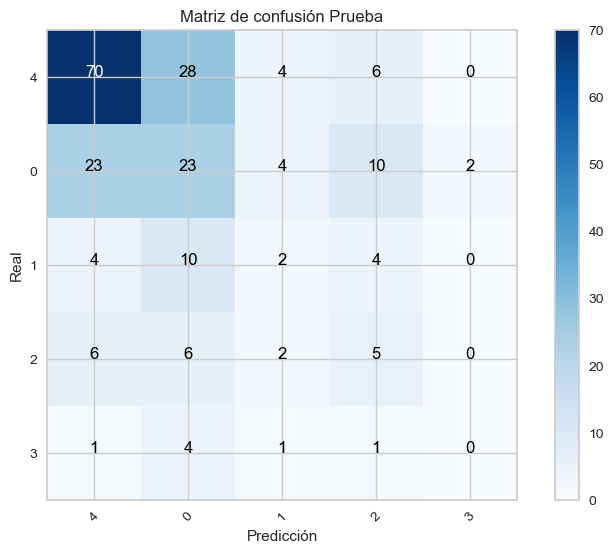

In [297]:
report_and_conf_matrix(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                       X_train['pca_rem'][cols],X_test['pca_rem'][cols],y_train['pca_rem'],y_test['pca_rem'])

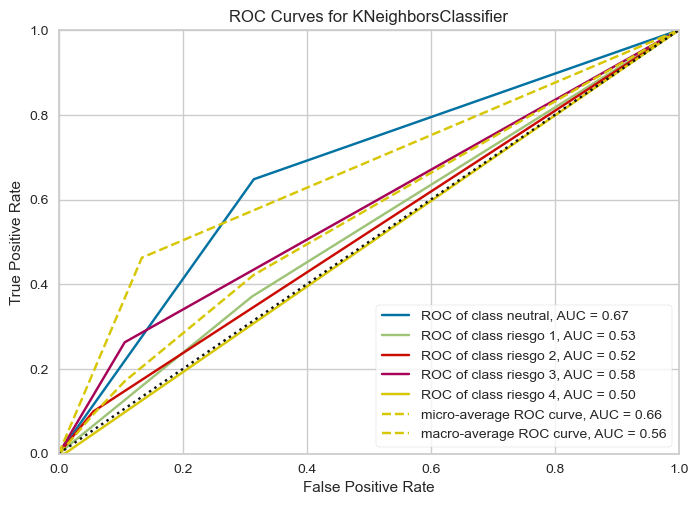

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=1))]))

In [298]:
plot_ROC_curve(make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1)),
                X_train=X_train['pca_rem'][cols], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'][cols], y_test=y_test['pca_rem'].astype(int))

### 7.4. Modelo Naïve Bayes

Utilizamos primero el conjunto de datos sin PCA

In [299]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

classification_metrics(GaussianNB(),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

Training Accuracy = 0.10912698412698413
Test Accuracy = 0.09259259259259259
Training Kappa = 0.011285439031103794
Test Kappa = -0.01226597805035512
Training Precision = [0.03 1.   0.22 0.09 0.43]
Test Precision = [0.03 0.6  0.17 0.1  0.31]
Training recall = [1.   0.03 0.18 0.04 0.2 ]
Test recall = [0.57 0.03 0.13 0.05 0.21]


(GaussianNB(),
 {'Training Accuracy': 0.10912698412698413,
  'Test Accuracy': 0.09259259259259259,
  'Training Kappa': 0.011285439031103794,
  'Test Kappa': -0.01226597805035512,
  'Training Precision': array([0.03, 1.  , 0.22, 0.09, 0.43]),
  'Test Precision': array([0.03, 0.6 , 0.17, 0.1 , 0.31]),
  'Training recall': array([1.  , 0.03, 0.18, 0.04, 0.2 ]),
  'Test recall': array([0.57, 0.03, 0.13, 0.05, 0.21])})

In [300]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train['rem'], y_train['rem'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31e-03,
       1.87...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])},
             scoring='accuracy', verbose=1)

In [301]:
# Mejores hiperparámetros

gs_NB.best_params_

{'var_smoothing': 1.873817422860383e-05}

In [302]:
gs_NB.best_score_

0.6508316831683167

In [303]:
# Guardamos el mejor modelo utilizando el dataset sin PCA

model,metrics = classification_metrics(GaussianNB(var_smoothing=1.232846739442066e-08),
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/NBClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierRemMetrics.pkl','wb'))

Training Accuracy = 0.22420634920634921
Test Accuracy = 0.2037037037037037
Training Kappa = 0.11283584239717637
Test Kappa = 0.08458790193421206
Training Precision = [0.03 0.96 0.41 0.09 0.43]
Test Precision = [0.03 0.9  0.33 0.11 0.31]
Training recall = [1.   0.27 0.16 0.04 0.2 ]
Test recall = [0.57 0.26 0.11 0.05 0.21]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.96      0.27      0.42       252
           0       0.41      0.16      0.23       147
           1       0.09      0.04      0.06        48
           2       0.43      0.20      0.27        46
           3       0.03      1.00      0.06        11

    accuracy                           0.22       504
   macro avg       0.38      0.33      0.21       504
weighted avg       0.65      0.22      0.31       504



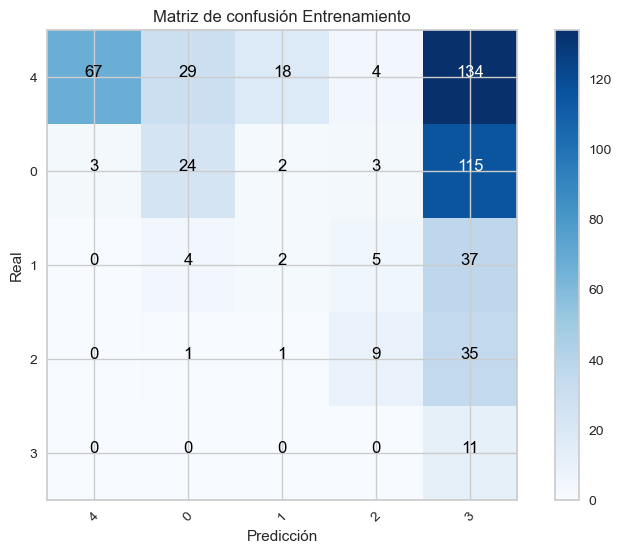

Reporte Prueba
              precision    recall  f1-score   support

           4       0.90      0.26      0.40       108
           0       0.33      0.11      0.17        62
           1       0.11      0.05      0.07        20
           2       0.31      0.21      0.25        19
           3       0.03      0.57      0.05         7

    accuracy                           0.20       216
   macro avg       0.34      0.24      0.19       216
weighted avg       0.59      0.20      0.28       216



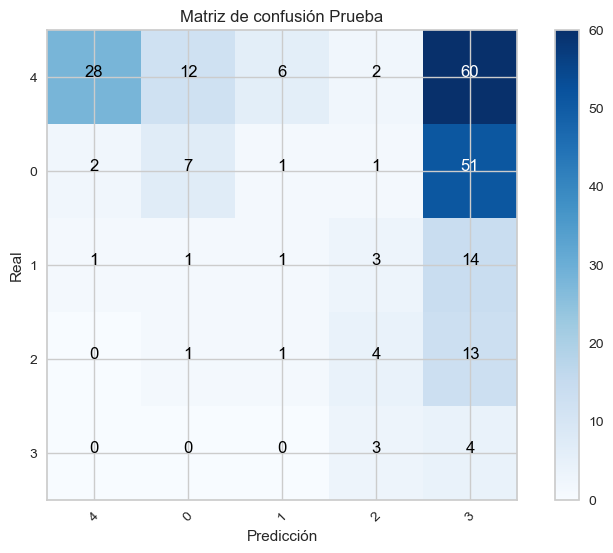

In [304]:
report_and_conf_matrix(GaussianNB(var_smoothing=1.232846739442066e-08),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

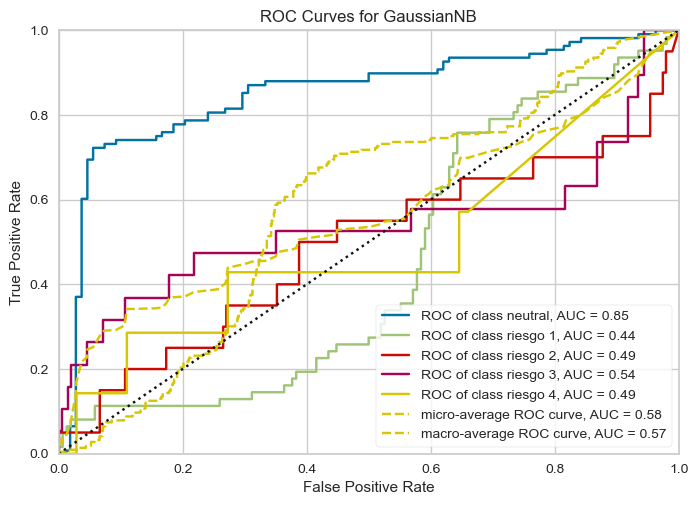

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=GaussianNB(var_smoothing=1.232846739442066e-08))

In [305]:
plot_ROC_curve(GaussianNB(var_smoothing=1.232846739442066e-08),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Trabajamos con el conjunto de datos sin PCA pero con feature selection

In [306]:
nb_classifier = GaussianNB()

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'], y_train['rem'])

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_t, y_train['rem'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31e-03,
       1.87...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])},
             scoring='accuracy', verbose=1)

In [307]:
gs_NB.best_params_

{'var_smoothing': 1.873817422860383e-05}

In [308]:
gs_NB.best_score_

0.6508316831683167

In [309]:
# Guardamos el mejor modelo sin PCA utilizando feature selection

pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            GaussianNB(var_smoothing=6.579332246575682e-09))

model,metrics = classification_metrics(pipeline_nb,
                                   X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/NBClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierRemFSMetrics.pkl','wb'))

Training Accuracy = 0.18253968253968253
Test Accuracy = 0.14814814814814814
Training Kappa = 0.07536936599962607
Test Kappa = 0.03386245958626066
Training Precision = [0.03 0.96 0.3  0.09 0.43]
Test Precision = [0.03 0.84 0.21 0.11 0.31]
Training recall = [1.   0.18 0.16 0.04 0.2 ]
Test recall = [0.57 0.15 0.11 0.05 0.21]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.96      0.18      0.31       252
           0       0.30      0.16      0.21       147
           1       0.09      0.04      0.06        48
           2       0.43      0.20      0.27        46
           3       0.03      1.00      0.06        11

    accuracy                           0.18       504
   macro avg       0.36      0.32      0.18       504
weighted avg       0.62      0.18      0.25       504



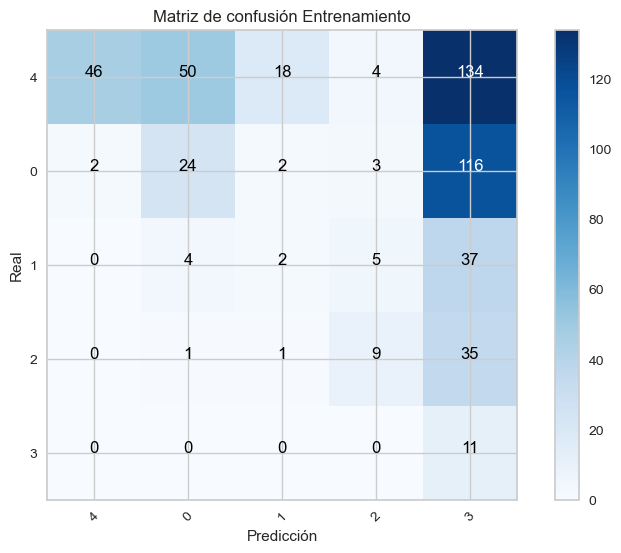

Reporte Prueba
              precision    recall  f1-score   support

           4       0.84      0.15      0.25       108
           0       0.21      0.11      0.15        62
           1       0.11      0.05      0.07        20
           2       0.31      0.21      0.25        19
           3       0.03      0.57      0.05         7

    accuracy                           0.15       216
   macro avg       0.30      0.22      0.15       216
weighted avg       0.52      0.15      0.20       216



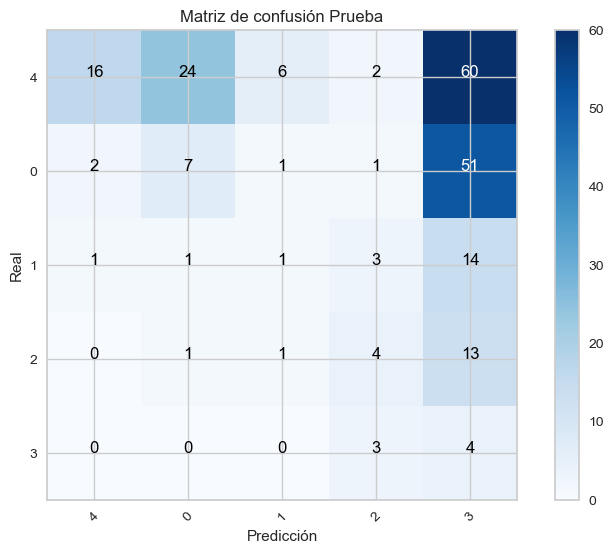

In [310]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            GaussianNB(var_smoothing=6.579332246575682e-09))
report_and_conf_matrix(pipeline_nb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

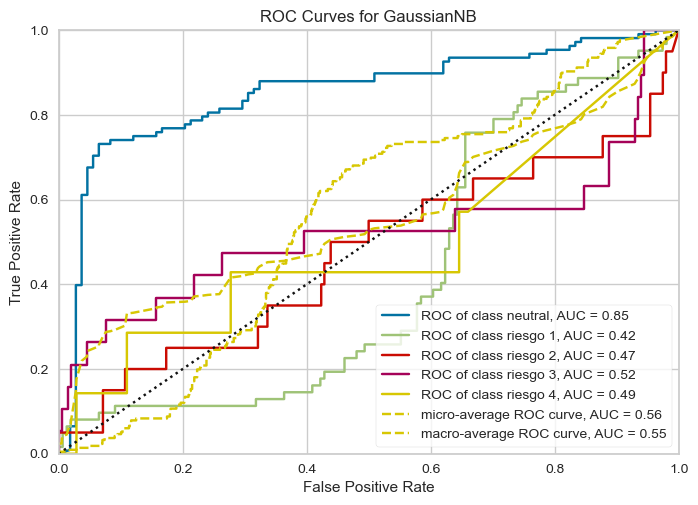

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('gaussiannb',
                                  GaussianNB(var_smoothing=6.579332246575682e-09))]))

In [311]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            GaussianNB(var_smoothing=6.579332246575682e-09))
plot_ROC_curve(pipeline_nb,X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Utilizamos el conjunto de datos con PCA

In [312]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train['pca_rem'], y_train['pca_rem'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31e-03,
       1.87...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])},
             scoring='accuracy', verbose=1)

In [313]:
gs_NB.best_params_

{'var_smoothing': 0.3511191734215131}

In [314]:
gs_NB.best_score_

0.6269108910891089

In [315]:
# Guardamos el mejor modelo utilizando el dataset con PCA

model,metrics = classification_metrics(GaussianNB(var_smoothing=0.0657933224657568),
                                   X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/NBClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierPCARemMetrics.pkl','wb'))

Training Accuracy = 0.6527777777777778
Test Accuracy = 0.625
Training Kappa = 0.4421075935355324
Test Kappa = 0.417673489765352
Training Precision = [0.17 0.78 0.57 0.42 0.52]
Test Precision = [0.08 0.84 0.52 0.14 0.36]
Training recall = [0.55 0.89 0.56 0.1  0.26]
Test recall = [0.14 0.81 0.65 0.05 0.26]


Utilizamos el conjunto de datos con PCA y con feature selection

In [316]:
nb_classifier = GaussianNB()

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'], y_train['pca_rem'])

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_t, y_train['pca_rem'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00e+00, 8.11e-01, 6.58e-01, 5.34e-01, 4.33e-01, 3.51e-01,
       2.85e-01, 2.31e-01, 1.87e-01, 1.52e-01, 1.23e-01, 1.00e-01,
       8.11e-02, 6.58e-02, 5.34e-02, 4.33e-02, 3.51e-02, 2.85e-02,
       2.31e-02, 1.87e-02, 1.52e-02, 1.23e-02, 1.00e-02, 8.11e-03,
       6.58e-03, 5.34e-03, 4.33e-03, 3.51e-03, 2.85e-03, 2.31e-03,
       1.87...
       3.51e-06, 2.85e-06, 2.31e-06, 1.87e-06, 1.52e-06, 1.23e-06,
       1.00e-06, 8.11e-07, 6.58e-07, 5.34e-07, 4.33e-07, 3.51e-07,
       2.85e-07, 2.31e-07, 1.87e-07, 1.52e-07, 1.23e-07, 1.00e-07,
       8.11e-08, 6.58e-08, 5.34e-08, 4.33e-08, 3.51e-08, 2.85e-08,
       2.31e-08, 1.87e-08, 1.52e-08, 1.23e-08, 1.00e-08, 8.11e-09,
       6.58e-09, 5.34e-09, 4.33e-09, 3.51e-09, 2.85e-09, 2.31e-09,
       1.87e-09, 1.52e-09, 1.23e-09, 1.00e-09])},
             scoring='accuracy', verbose=1)

In [317]:
gs_NB.best_params_

{'var_smoothing': 0.23101297000831597}

In [318]:
gs_NB.best_score_

0.628950495049505

In [319]:
# Guardamos el mejor modelo sin PCA utilizando feature selection

pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            GaussianNB(var_smoothing=0.03511191734215131))

model,metrics = classification_metrics(pipeline_nb,
                                   X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/NBClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/NBClassifierPCARemFSMetrics.pkl','wb'))

Training Accuracy = 0.6428571428571429
Test Accuracy = 0.6018518518518519
Training Kappa = 0.4386902773137321
Test Kappa = 0.3956076134699854
Training Precision = [0.13 0.78 0.58 0.35 0.56]
Test Precision = [0.11 0.84 0.52 0.11 0.36]
Training recall = [0.55 0.85 0.56 0.12 0.3 ]
Test recall = [0.29 0.77 0.63 0.05 0.26]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.78      0.85      0.82       252
           0       0.58      0.56      0.57       147
           1       0.35      0.12      0.18        48
           2       0.56      0.30      0.39        46
           3       0.13      0.55      0.21        11

    accuracy                           0.64       504
   macro avg       0.48      0.48      0.44       504
weighted avg       0.65      0.64      0.63       504



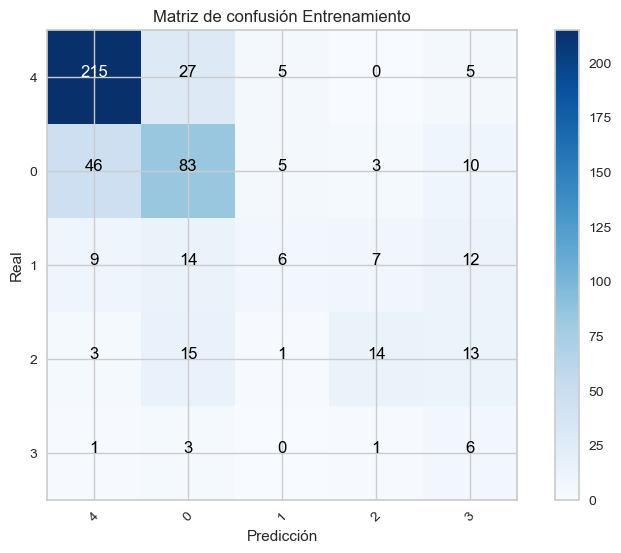

Reporte Prueba
              precision    recall  f1-score   support

           4       0.84      0.77      0.80       108
           0       0.52      0.63      0.57        62
           1       0.11      0.05      0.07        20
           2       0.36      0.26      0.30        19
           3       0.11      0.29      0.15         7

    accuracy                           0.60       216
   macro avg       0.39      0.40      0.38       216
weighted avg       0.61      0.60      0.60       216



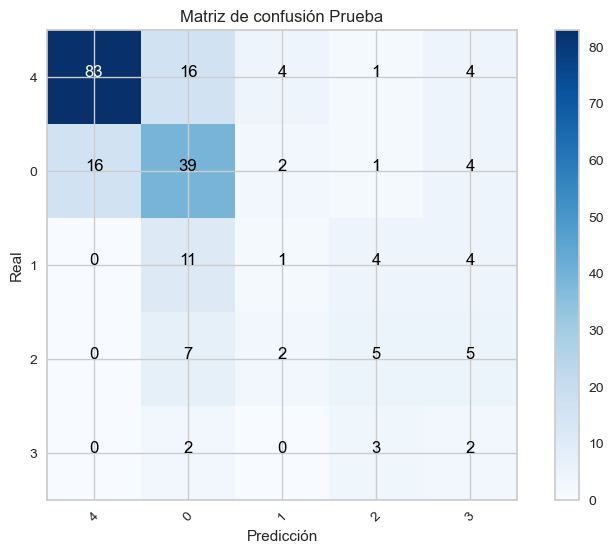

In [320]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            GaussianNB(var_smoothing=0.03511191734215131))
report_and_conf_matrix(pipeline_nb,
                X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

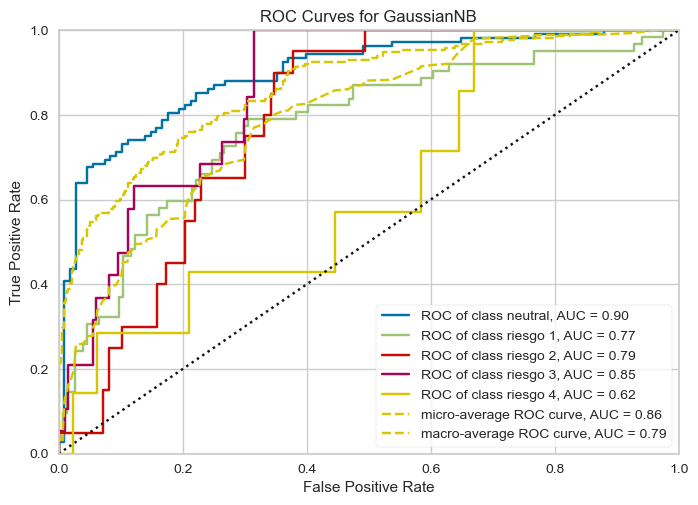

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=27)),
                                 ('gaussiannb',
                                  GaussianNB(var_smoothing=0.03511191734215131))]))

In [321]:
pipeline_nb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            GaussianNB(var_smoothing=0.03511191734215131))
plot_ROC_curve(pipeline_nb,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int), X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

### 7.5. Modelo de Árbol de Clasificación

Conjunto de datos sin PCA

Training Accuracy = 1.0
Test Accuracy = 0.5509259259259259
Training Kappa = 1.0
Test Kappa = 0.3279445727482678
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.79 0.44 0.25 0.35]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.66 0.55 0.3  0.42]
DecisionTreeClassifier(random_state=1234)


[Text(0.5089285714285714, 0.9, 'x[12] <= 0.5\ngini = 0.647\nsamples = 504\nvalue = [252, 147, 48, 46, 11]'),
 Text(0.2857142857142857, 0.7, 'x[24] <= 0.5\ngini = 0.685\nsamples = 157\nvalue = [23.0, 77.0, 22.0, 28.0, 7.0]'),
 Text(0.14285714285714285, 0.5, 'x[3] <= 133.5\ngini = 0.738\nsamples = 74\nvalue = [6, 26, 16, 21, 5]'),
 Text(0.07142857142857142, 0.3, 'x[4] <= 2.5\ngini = 0.677\nsamples = 45\nvalue = [3, 19, 5, 16, 2]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[3] <= 144.5\ngini = 0.747\nsamples = 29\nvalue = [3, 7, 11, 5, 3]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'x[11] <= 0.5\ngini = 0.568\nsamples = 83\nvalue = [17.0, 51.0, 6.0, 7.0, 2.0]'),
 Text(0.35714285714285715, 0.3, 'x[3] <= 157.0\ngini = 0.464\nsamples = 68\nvalue = [12, 48, 4, 4, 0]'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.

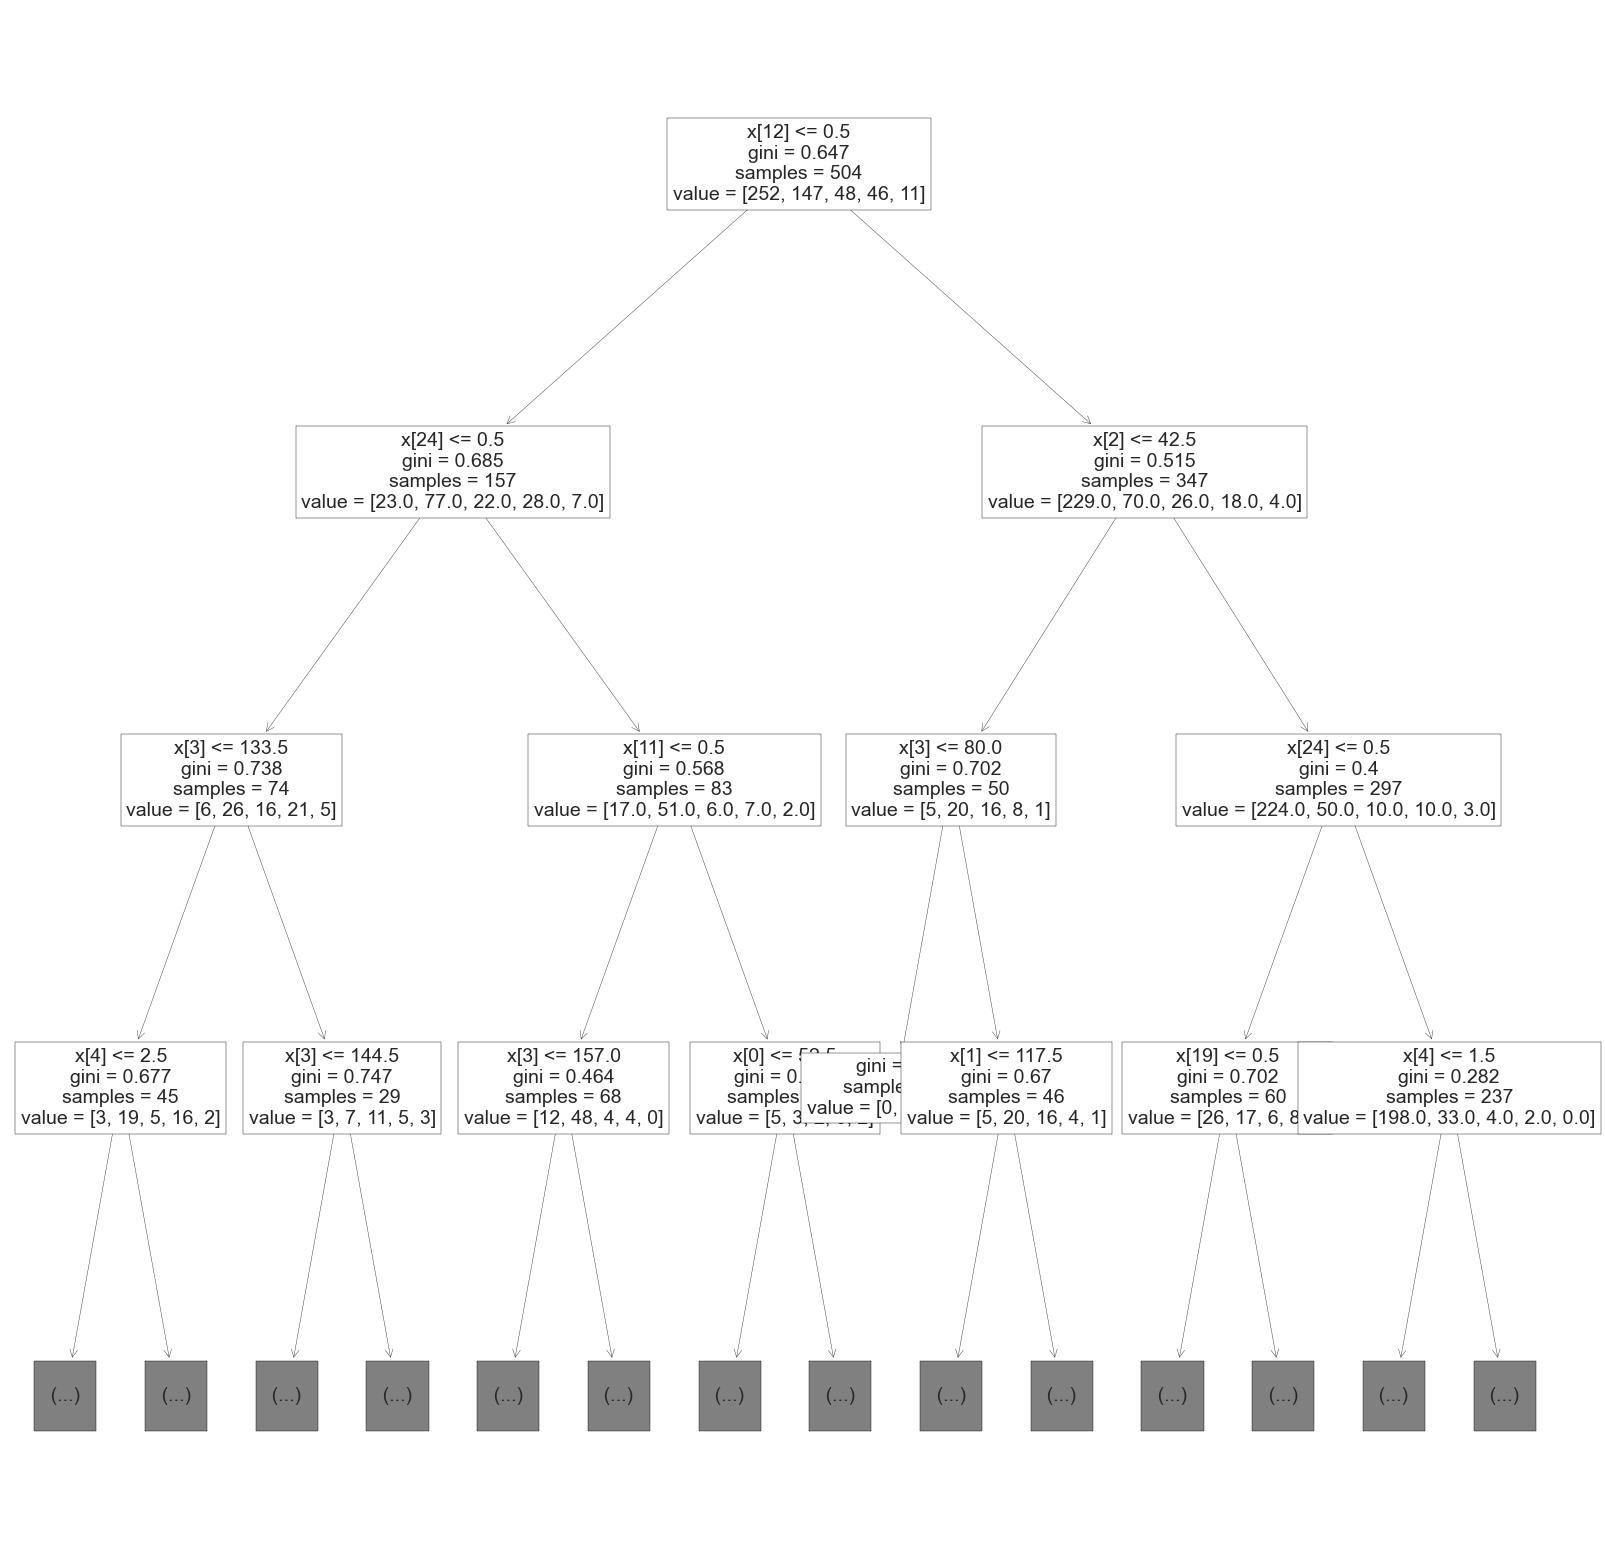

In [322]:
# Utilizamos un árbol de clasificación
# Verificamos sus métricas

from sklearn.tree import DecisionTreeClassifier, plot_tree

classification_metrics(DecisionTreeClassifier(random_state=1234),X_train['rem'],X_test['rem'],y_train['pca_rem'],y_test['pca_rem'])

tree_reg = DecisionTreeClassifier(random_state=1234).fit(X_train['rem'],y_train['rem'])
print(tree_reg)

# Diagramamos los primeros tres niveles del árbol resultante

plt.figure(figsize=(20,20))
plot_tree(tree_reg,filled=False,fontsize=14,max_depth=3)

In [323]:
# Vamos a realizar un ajuste de hiperparámetros para encontrar el mejor modelo de árbol de clasificación
# Establecemos la grilla de parámetros que verificar
# Haciendo uso de estos parámetros y una validación cruzada de 3 doblajes buscamos el mejor modelo
# Tiempo aprox = 9s 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

kappa_scorer = make_scorer(cohen_kappa_score)
tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),
                          param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_train['rem'],y_train['rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_de

[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=0.339 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=0.359 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=0.301 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=0.392 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=0.379 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=0.313 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=0.374 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=0.381 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score

[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.288 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.369 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.430 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.277 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.401 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.416 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.288 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.354 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=0.404 total

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=0.416 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=0.327 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=0.357 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=0.365 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=0.332 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=0.378 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=0.435 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=0.327 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=0.362 tot

[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=0.295 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=0.362 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=0.390 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.352 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.356 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.424 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.302 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.398 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.374 total

[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.363 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.382 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.384 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=0.340 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=0.359 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=0.439 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.308 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.377 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [324]:
# Los híperparámetros del mejor modelo

tuning_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 3,
 'splitter': 'random'}

In [325]:
# El mejor modelo de árbol de clasificación sin PCA


tree_clsfr = DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         splitter='best')

model,metrics = classification_metrics(tree_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/DecissionTreeClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierRemMetrics.pkl','wb'))

Training Accuracy = 0.75
Test Accuracy = 0.6342592592592593
Training Kappa = 0.6012858506203225
Test Kappa = 0.4330520300352182
Training Precision = [1.   0.86 0.62 0.66 0.67]
Test Precision = [0.   0.85 0.5  0.32 0.29]
Training recall = [0.18 0.9  0.71 0.52 0.43]
Test recall = [0.   0.81 0.63 0.35 0.21]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.86      0.90      0.88       252
           0       0.62      0.71      0.66       147
           1       0.66      0.52      0.58        48
           2       0.67      0.43      0.53        46
           3       1.00      0.18      0.31        11

    accuracy                           0.75       504
   macro avg       0.76      0.55      0.59       504
weighted avg       0.75      0.75      0.74       504



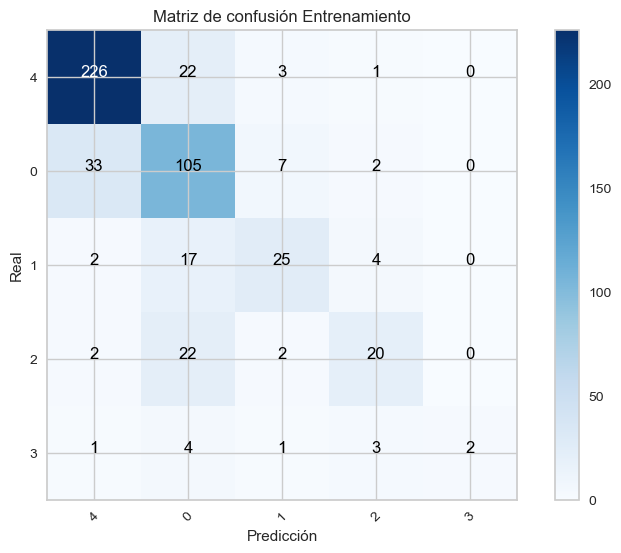

Reporte Prueba
              precision    recall  f1-score   support

           4       0.85      0.81      0.83       108
           0       0.50      0.63      0.56        62
           1       0.32      0.35      0.33        20
           2       0.29      0.21      0.24        19
           3       0.00      0.00      0.00         7

    accuracy                           0.63       216
   macro avg       0.39      0.40      0.39       216
weighted avg       0.62      0.63      0.63       216



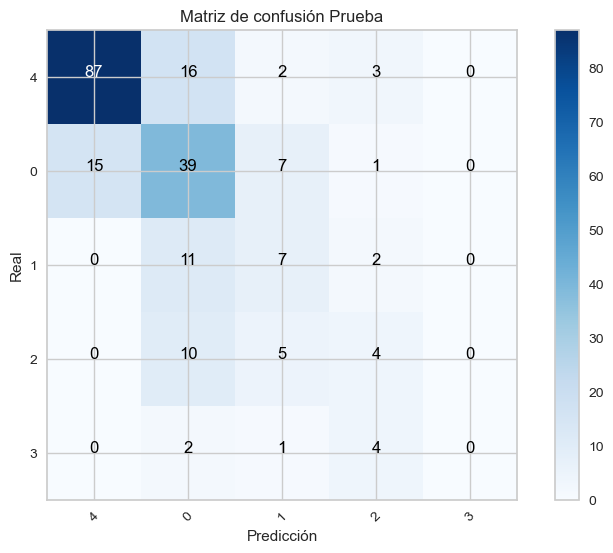

In [326]:
report_and_conf_matrix(DecisionTreeClassifier(random_state=1234,max_depth=11,
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         splitter='best'),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

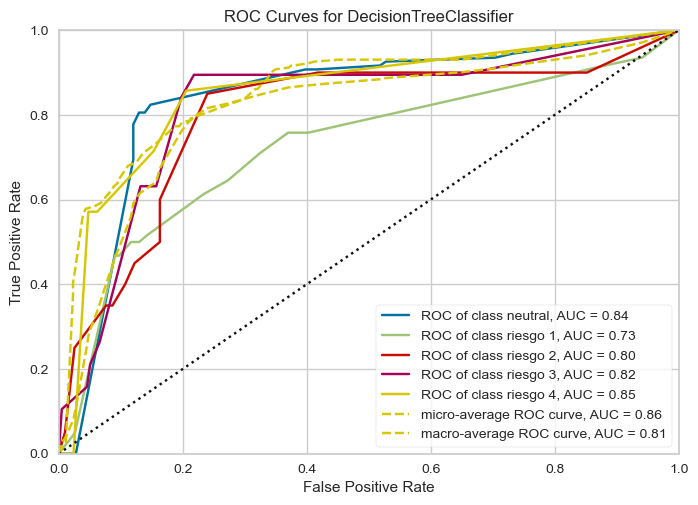

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=DecisionTreeClassifier(max_depth=11, max_leaf_nodes=30,
                                        random_state=1234))

In [327]:
plot_ROC_curve(DecisionTreeClassifier(random_state=1234,max_depth=11,
                                         max_leaf_nodes=30,
                                         min_samples_leaf=1,
                                         splitter='best'),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Conjunto de datos sin PCA y con feature selection

In [328]:
# Tiempo aproximado: 8s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_t,y_train['rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.289 total

[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.261 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.346 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.387 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.326 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.339 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.359 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=0.261 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=0.346 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=0.387

[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.321 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.322 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.413 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.342 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.418 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.402 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.317 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.354 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.404 total

[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=0.381 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.344 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.357 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.446 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.363 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.368 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.393 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=0.331 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=0.348 t

[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=0.313 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=0.388 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=0.420 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=0.359 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=0.388 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=0.381 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.311 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.360 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.446

[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=0.362 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=0.390 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.352 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.356 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.424 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.302 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.398 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.374 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [329]:
tuning_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 3,
 'splitter': 'random'}

In [330]:
# El mejor modelo de árbol de regresión sin PCA
# Con feature selection

pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'))

model,metrics = classification_metrics(pipeline_dt,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/DecissionTreeClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierRemFSMetrics.pkl','wb'))

Training Accuracy = 0.9146825396825397
Test Accuracy = 0.6111111111111112
Training Kappa = 0.8651786047553283
Test Kappa = 0.3915901012675206
Training Precision = [1.   0.89 0.94 0.94 0.98]
Test Precision = [0.5  0.78 0.54 0.27 0.25]
Training recall = [0.82 0.99 0.8  0.94 0.89]
Test recall = [0.14 0.83 0.48 0.3  0.26]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.89      0.99      0.94       252
           0       0.94      0.80      0.86       147
           1       0.94      0.94      0.94        48
           2       0.98      0.89      0.93        46
           3       1.00      0.82      0.90        11

    accuracy                           0.91       504
   macro avg       0.95      0.89      0.91       504
weighted avg       0.92      0.91      0.91       504



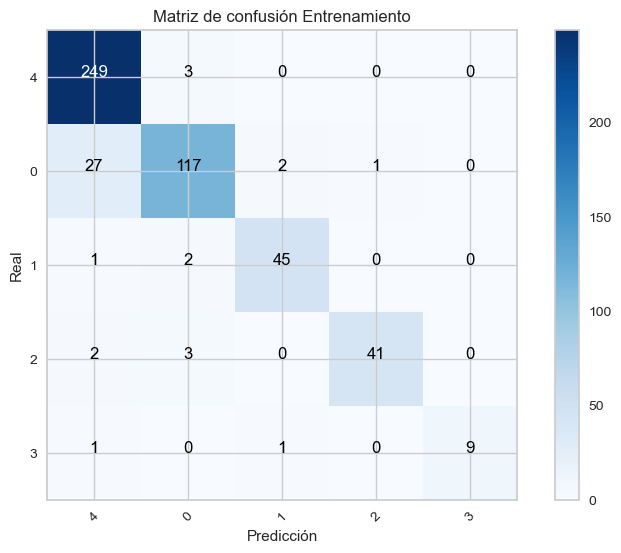

Reporte Prueba
              precision    recall  f1-score   support

           4       0.78      0.83      0.80       108
           0       0.54      0.48      0.51        62
           1       0.27      0.30      0.29        20
           2       0.25      0.26      0.26        19
           3       0.50      0.14      0.22         7

    accuracy                           0.61       216
   macro avg       0.47      0.40      0.42       216
weighted avg       0.61      0.61      0.60       216



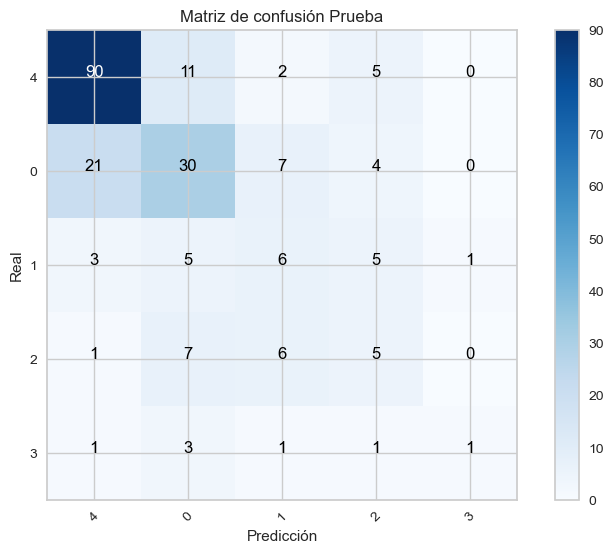

In [331]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'))
report_and_conf_matrix(pipeline_dt,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

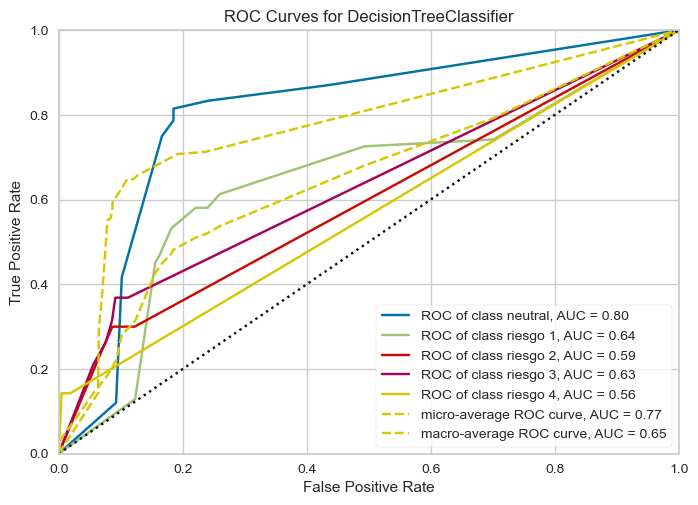

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('decisiontreeclassifier',
                                  DecisionTreeClassifier(max_depth=9,
                                                         random_state=1234))]))

In [332]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=9,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1,
                                         splitter='best'))
plot_ROC_curve(pipeline_dt,X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Modelo con conjunto de datos con PCA

In [333]:
# Tiempo aproximado: 11s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),
                          param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=0.270 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=0.346 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=0.301 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.294 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.371 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=0.347 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.270 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.346 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=0.301

[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=0.353 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=0.242 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.237 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.369 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=0.317 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.366 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.344 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=0.236 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=0.234 tot

[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.301 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.342 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.353 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.341 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.318 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=0.277 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=0.341 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=0.298 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, splitter=random

[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=0.331 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.221 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.351 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=0.291 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.244 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.339 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=0.391 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=0.246 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, scor

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [334]:
tuning_model.best_params_

{'max_depth': 11,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [335]:
# El mejor modelo de árbol de clasificación con PCA


tree_clsfr = DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best')

model,metrics = classification_metrics(tree_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/DecissionTreeClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierPCARemMetrics.pkl','wb'))

Training Accuracy = 0.7876984126984127
Test Accuracy = 0.625
Training Kappa = 0.6556409797961738
Test Kappa = 0.4179640718562875
Training Precision = [0.5  0.82 0.75 0.79 0.67]
Test Precision = [0.   0.84 0.48 0.3  0.36]
Training recall = [0.18 0.96 0.69 0.56 0.52]
Test recall = [0.   0.79 0.63 0.3  0.26]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.82      0.96      0.89       252
           0       0.75      0.69      0.72       147
           1       0.79      0.56      0.66        48
           2       0.67      0.52      0.59        46
           3       0.50      0.18      0.27        11

    accuracy                           0.79       504
   macro avg       0.71      0.58      0.62       504
weighted avg       0.78      0.79      0.78       504



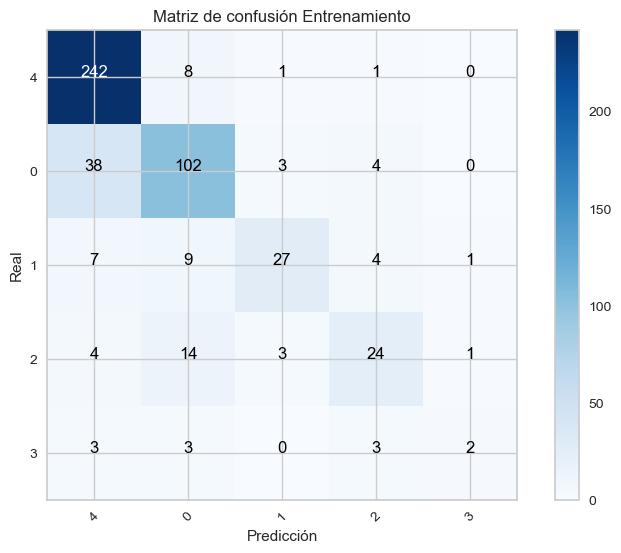

Reporte Prueba
              precision    recall  f1-score   support

           4       0.84      0.79      0.81       108
           0       0.48      0.63      0.55        62
           1       0.30      0.30      0.30        20
           2       0.36      0.26      0.30        19
           3       0.00      0.00      0.00         7

    accuracy                           0.62       216
   macro avg       0.40      0.40      0.39       216
weighted avg       0.62      0.62      0.62       216



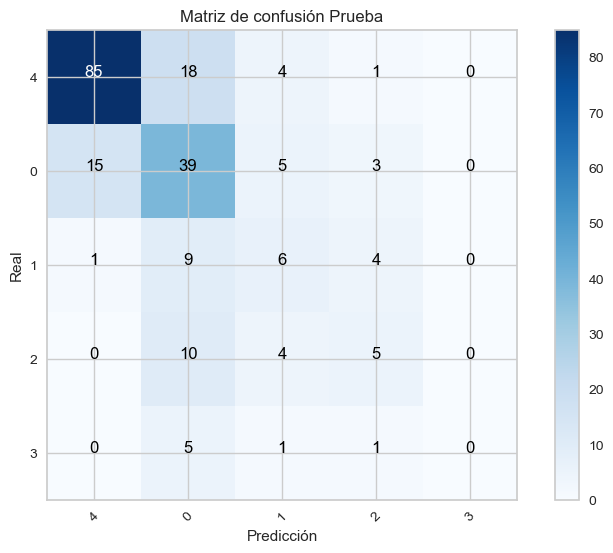

In [336]:
report_and_conf_matrix(DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

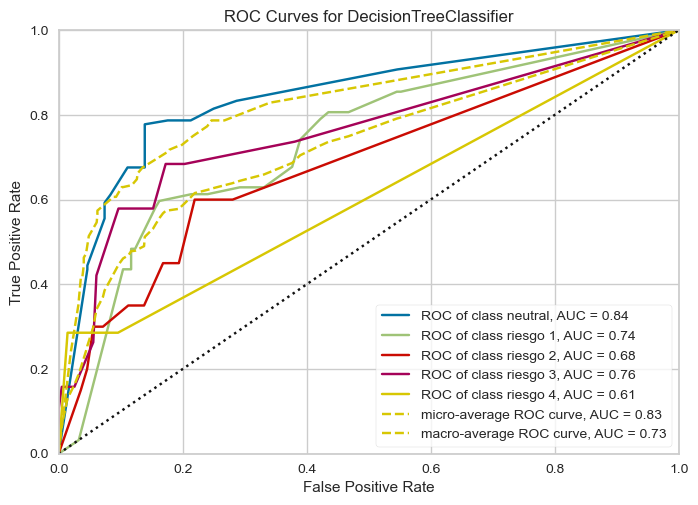

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=4,
                                        random_state=1234))

In [337]:
plot_ROC_curve(DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=4,
                                         splitter='best'),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

Modelo con conjunto de datos con PCA y feature selection

In [338]:
# Tiempo aproximado: 9s

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11],
           "min_samples_leaf":[1,2,3,4,],
           "max_leaf_nodes":[None,10,20,30] }

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(DecisionTreeClassifier(random_state=1234),param_grid=parameters,scoring=kappa_scorer,
                          cv=3,verbose=3)

tuning_model.fit(X_t,y_train['pca_rem'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_de

[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.320 total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=0.304 total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=0.320 t

[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=0.344 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.369 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.352 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.241 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.270 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.387 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.422 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.364 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;,

[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.317 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.354 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.359 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.373 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.261 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.275 total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.300 total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.231 total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=2, splitter=rand

[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.368 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.351 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.301 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.278 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.314 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.319 total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.325 total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.225 total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=2, splitter=ra

[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.318 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.321 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.261 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.306 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=0.289 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.320 total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.268 total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=0.354 total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, sp

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [339]:
tuning_model.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'splitter': 'random'}

In [340]:
# El mejor modelo de árbol de regresión con PCA
# Con feature selection

pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         splitter='best'))

model,metrics = classification_metrics(pipeline_dt,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/DecissionTreeClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/DecisionTreeClassifierPCARemFSMetrics.pkl','wb'))

Training Accuracy = 0.6726190476190477
Test Accuracy = 0.6064814814814815
Training Kappa = 0.46167091754165646
Test Kappa = 0.37762711864406784
Training Precision = [0.   0.78 0.53 0.51 0.8 ]
Test Precision = [0.   0.82 0.45 0.29 0.  ]
Training recall = [0.   0.88 0.63 0.38 0.17]
Test recall = [0.   0.77 0.68 0.3  0.  ]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.78      0.88      0.82       252
           0       0.53      0.63      0.57       147
           1       0.51      0.38      0.43        48
           2       0.80      0.17      0.29        46
           3       0.00      0.00      0.00        11

    accuracy                           0.67       504
   macro avg       0.52      0.41      0.42       504
weighted avg       0.66      0.67      0.65       504



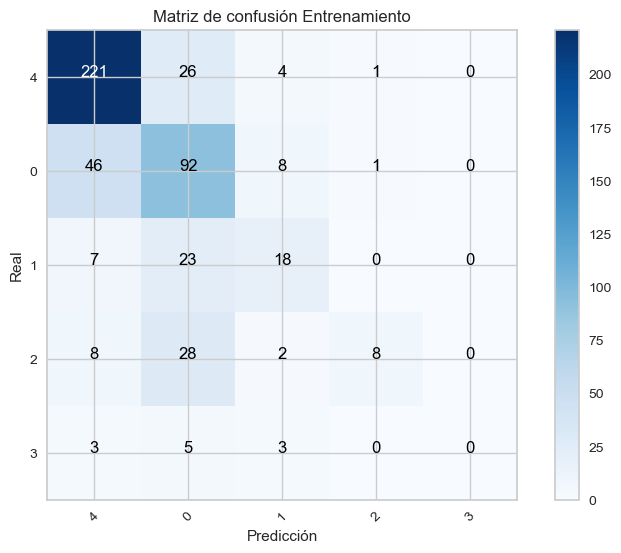

Reporte Prueba
              precision    recall  f1-score   support

           4       0.82      0.77      0.79       108
           0       0.45      0.68      0.54        62
           1       0.29      0.30      0.29        20
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         7

    accuracy                           0.61       216
   macro avg       0.31      0.35      0.33       216
weighted avg       0.57      0.61      0.58       216



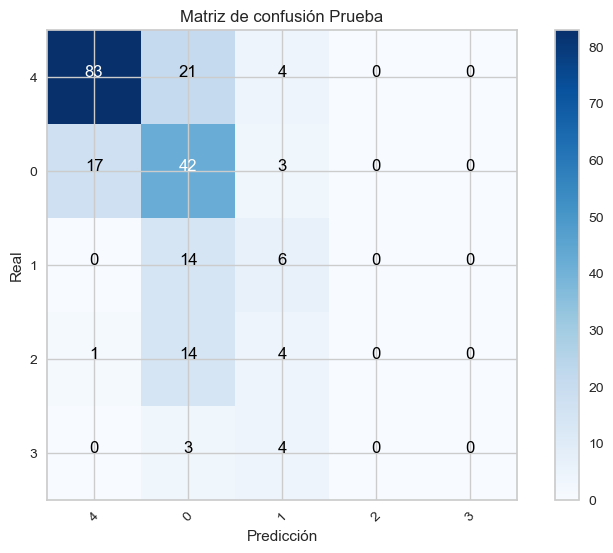

In [341]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                            DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         splitter='best'))
report_and_conf_matrix(pipeline_dt,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

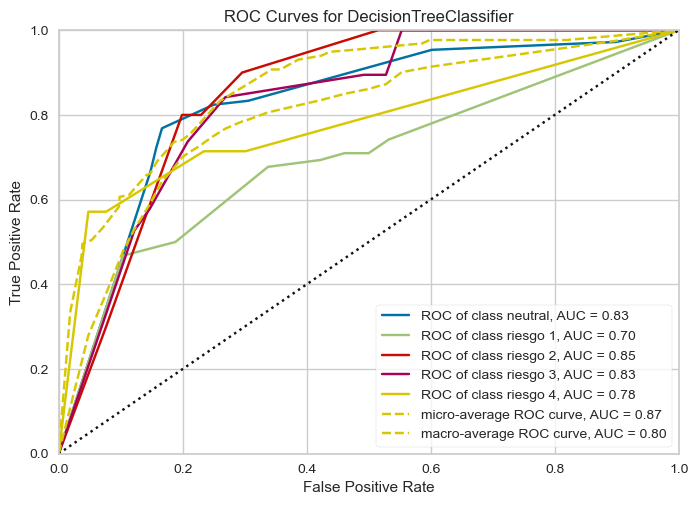

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('decisiontreeclassifier',
                                  DecisionTreeClassifier(max_depth=7,
                                                         max_leaf_nodes=10,
                                                         random_state=1234))]))

In [342]:
pipeline_dt = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                            DecisionTreeClassifier(random_state=1234,max_depth=7,
                                         max_leaf_nodes=10,
                                         min_samples_leaf=1,
                                         splitter='best'))
plot_ROC_curve(pipeline_dt,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int), X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

### 7.6. Modelo de Random Forest

Conjunto de datos sin PCA

In [343]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1234)

classification_metrics(rf,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

rf.fit(X_train['rem'],y_train['rem'])
print(rf.get_params())

Training Accuracy = 1.0
Test Accuracy = 0.6157407407407407
Training Kappa = 1.0
Test Kappa = 0.39790435249865663
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.83 0.54 0.14 0.14]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.83 0.61 0.15 0.11]
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


In [344]:
# Tiempo aproximado: 2m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_train['rem'],y_train['rem'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.381 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.356 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.504 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.416 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.363 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.438 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.340 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.4

[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.346 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.389 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.314 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.436 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.403 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.363 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.389 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.331 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples

[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.304 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.448 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.395 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.348 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.404 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.307 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.467 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.413 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_sampl

[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.432 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.365 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.437 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.319 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.469 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.371 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.386 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.431 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [345]:
tuning_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [346]:
# El mejor modelo de Random Forest
# Sin PCA


rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100)

model,metrics = classification_metrics(rf_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/RandomForestClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierRemMetrics.pkl','wb'))

Training Accuracy = 0.9484126984126984
Test Accuracy = 0.6111111111111112
Training Kappa = 0.9191395620059608
Test Kappa = 0.38534503201327963
Training Precision = [1.   0.94 0.94 1.   1.  ]
Test Precision = [0.   0.82 0.51 0.17 0.08]
Training recall = [0.91 0.99 0.9  0.92 0.93]
Test recall = [0.   0.83 0.61 0.15 0.05]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.94      0.99      0.96       252
           0       0.94      0.90      0.92       147
           1       1.00      0.92      0.96        48
           2       1.00      0.93      0.97        46
           3       1.00      0.91      0.95        11

    accuracy                           0.95       504
   macro avg       0.97      0.93      0.95       504
weighted avg       0.95      0.95      0.95       504



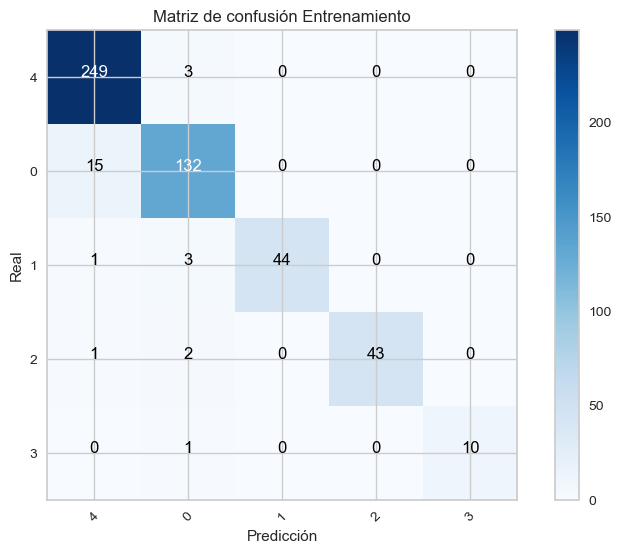

Reporte Prueba
              precision    recall  f1-score   support

           4       0.82      0.83      0.83       108
           0       0.51      0.61      0.55        62
           1       0.17      0.15      0.16        20
           2       0.08      0.05      0.06        19
           3       0.00      0.00      0.00         7

    accuracy                           0.61       216
   macro avg       0.31      0.33      0.32       216
weighted avg       0.58      0.61      0.59       216



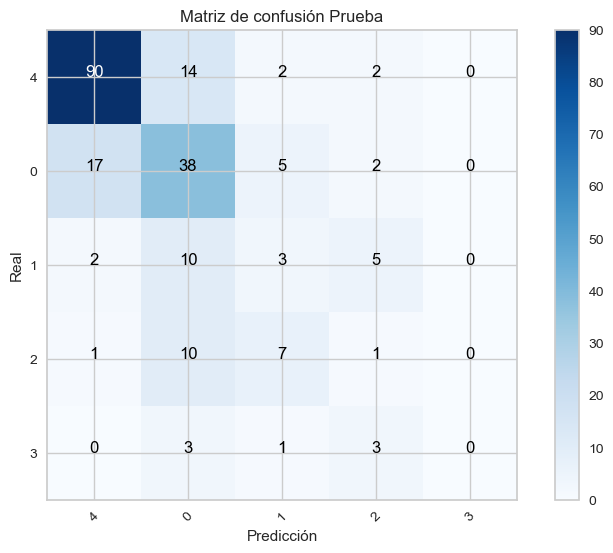

In [347]:
report_and_conf_matrix(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

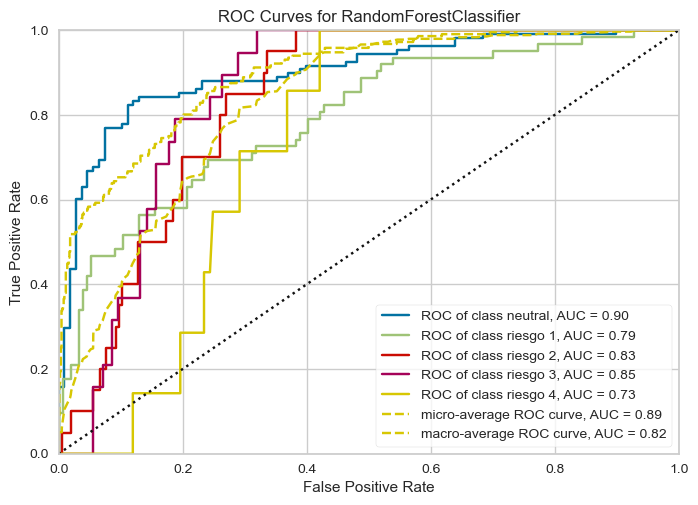

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=RandomForestClassifier(min_samples_split=5, random_state=1234))

In [348]:
plot_ROC_curve(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Modelo sin PCA pero con feature selection

In [349]:
# Tiempo aproximado: 3m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_t,y_train['rem'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.381 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.356 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.504 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.416 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.363 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.438 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.340 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.4

[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.384 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.346 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.389 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.314 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.436 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.403 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.363 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.389 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples

[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.352 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.406 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.304 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.448 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.395 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.348 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.404 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.307 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_sampl

[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.348 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.437 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.318 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.467 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.432 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.365 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.437 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.319 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [350]:
tuning_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [351]:
# El mejor modelo de random forest sin PCA
# Con feature selection

rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=200)

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

model,metrics = classification_metrics(rf_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/RandomForestClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierRemFSMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.6203703703703703
Training Kappa = 1.0
Test Kappa = 0.4032345013477088
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.82 0.54 0.17 0.14]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.85 0.58 0.2  0.11]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



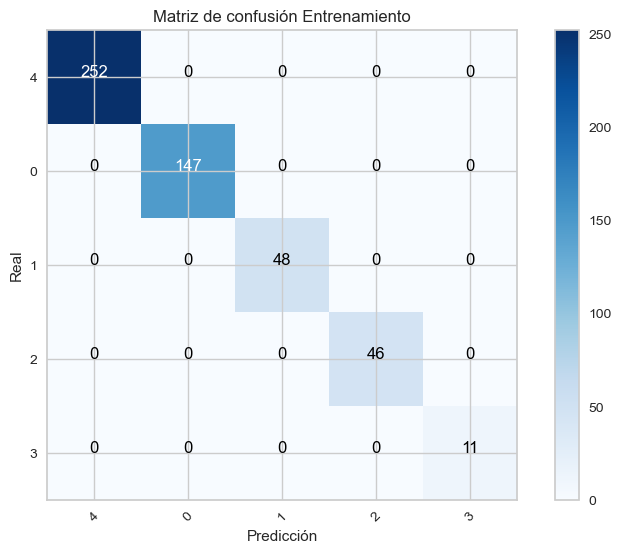

Reporte Prueba
              precision    recall  f1-score   support

           4       0.82      0.85      0.84       108
           0       0.54      0.58      0.56        62
           1       0.17      0.20      0.19        20
           2       0.14      0.11      0.12        19
           3       0.00      0.00      0.00         7

    accuracy                           0.62       216
   macro avg       0.34      0.35      0.34       216
weighted avg       0.59      0.62      0.61       216



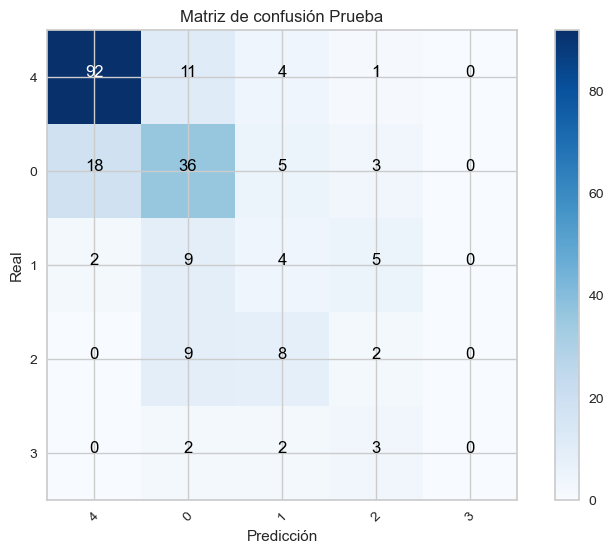

In [352]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                          RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=200))
report_and_conf_matrix(pipeline_rf,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

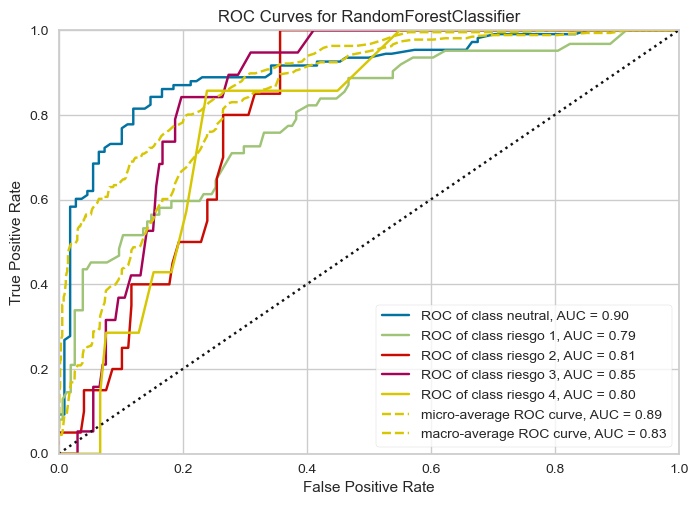

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('randomforestclassifier',
                                  RandomForestClassifier(n_estimators=200,
                                                         random_state=1234))]))

In [353]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                          RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         n_estimators=200))
plot_ROC_curve(pipeline_rf,X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Modelo con conjunto de datos con PCA

In [354]:
# Tiempo aproximado: 2m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.360 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.269 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.452 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.427 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.350 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.395 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.309 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.4

[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.345 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.319 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.358 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.300 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.436 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.338 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.351 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.374 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples

[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.397 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.341 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.360 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.302 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.445 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.364 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.360 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.375 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_sampl

[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.415 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.369 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.400 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.318 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.429 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.453 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.347 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.364 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [355]:
tuning_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [356]:
# El mejor modelo de Random Forest
# Con PCA


rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=400)

model,metrics = classification_metrics(rf_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/RandomForestClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierPCARemMetrics.pkl','wb'))

Training Accuracy = 0.9742063492063492
Test Accuracy = 0.6203703703703703
Training Kappa = 0.9597799931247851
Test Kappa = 0.39501998155548723
Training Precision = [1.   0.96 0.99 1.   1.  ]
Test Precision = [0.   0.82 0.48 0.09 0.27]
Training recall = [1.   1.   0.93 1.   0.93]
Test recall = [0.   0.81 0.68 0.05 0.16]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.96      1.00      0.98       252
           0       0.99      0.93      0.96       147
           1       1.00      1.00      1.00        48
           2       1.00      0.93      0.97        46
           3       1.00      1.00      1.00        11

    accuracy                           0.97       504
   macro avg       0.99      0.97      0.98       504
weighted avg       0.97      0.97      0.97       504



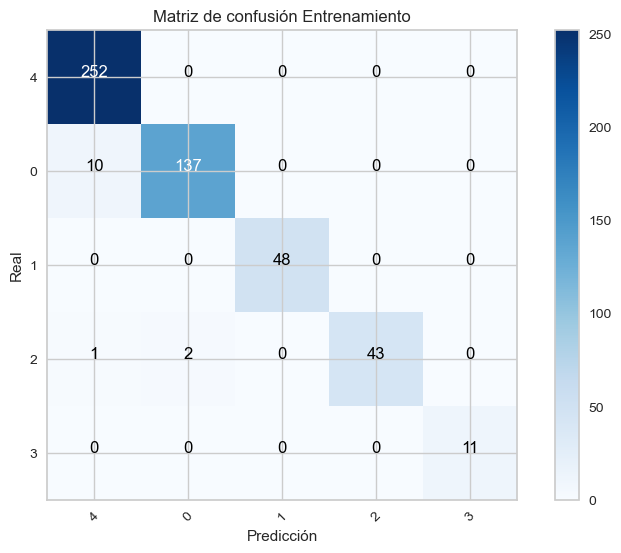

Reporte Prueba
              precision    recall  f1-score   support

           4       0.82      0.81      0.82       108
           0       0.48      0.68      0.56        62
           1       0.09      0.05      0.06        20
           2       0.27      0.16      0.20        19
           3       0.00      0.00      0.00         7

    accuracy                           0.62       216
   macro avg       0.33      0.34      0.33       216
weighted avg       0.58      0.62      0.59       216



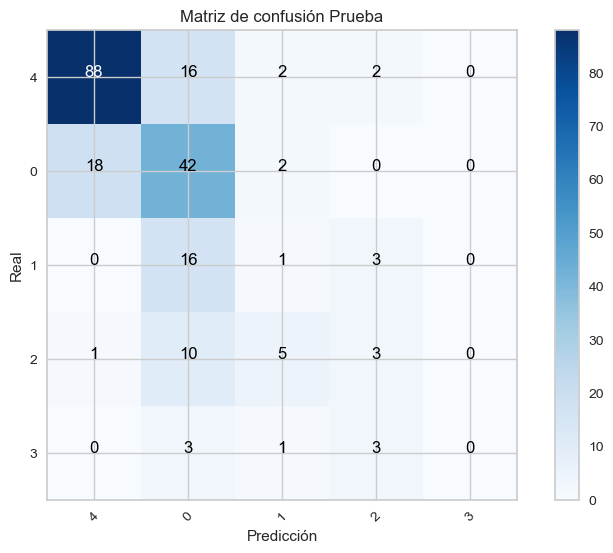

In [357]:
report_and_conf_matrix(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=400),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

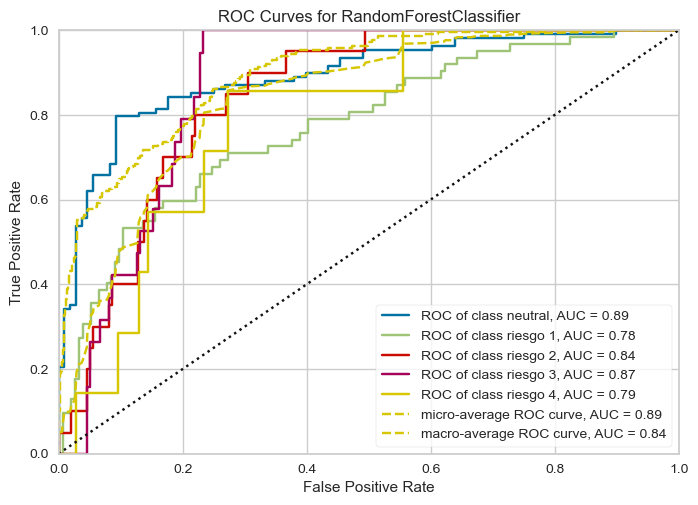

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=RandomForestClassifier(min_samples_split=5, n_estimators=400,
                                        random_state=1234))

In [358]:
plot_ROC_curve(RandomForestClassifier(random_state=1234,max_depth=None,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=400),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

Modelo con PCA y feature selection

In [359]:
# Tiempo aproximado: 3m

params = {'max_depth': [None, 10, 20],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 5],
          'n_estimators': [100, 200, 400]}

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(RandomForestClassifier(random_state=1234),param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)

tuning_model.fit(X_t,y_train['pca_rem'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.410 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.348 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.433 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.434 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.359 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.408 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.323 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.4

[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.370 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.319 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.377 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.326 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.409 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.387 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=400;, score=0.317 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.427 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples

[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.407 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.338 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.387 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.316 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.394 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.422 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.321 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.402 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_sampl

[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.428 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.371 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.398 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.349 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.416 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.366 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.319 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.368 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 400]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [360]:
tuning_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [361]:
# El mejor modelo de random forest con PCA
# Con feature selection

rf_clsfr = RandomForestClassifier(random_state=1234,max_depth=10,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100)

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

model,metrics = classification_metrics(rf_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/RandomForestClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/RandomForestClassifierPCARemFSMetrics.pkl','wb'))

Training Accuracy = 0.9226190476190477
Test Accuracy = 0.6157407407407407
Training Kappa = 0.877287284850074
Test Kappa = 0.3847632120796157
Training Precision = [1.   0.9  0.92 1.   1.  ]
Test Precision = [0.   0.79 0.49 0.3  0.17]
Training recall = [0.64 0.99 0.83 0.96 0.87]
Test recall = [0.   0.81 0.66 0.15 0.11]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       0.89      0.98      0.93       252
           0       0.93      0.82      0.87       147
           1       1.00      0.96      0.98        48
           2       0.98      0.91      0.94        46
           3       1.00      0.64      0.78        11

    accuracy                           0.92       504
   macro avg       0.96      0.86      0.90       504
weighted avg       0.92      0.92      0.92       504



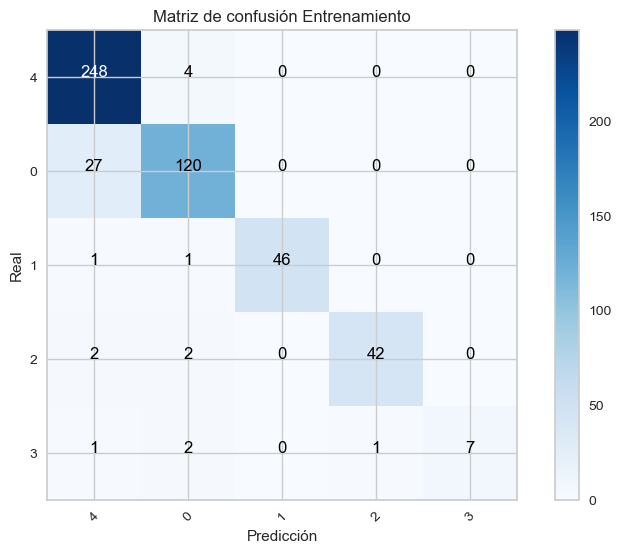

Reporte Prueba
              precision    recall  f1-score   support

           4       0.81      0.82      0.82       108
           0       0.48      0.63      0.54        62
           1       0.23      0.15      0.18        20
           2       0.18      0.11      0.13        19
           3       0.00      0.00      0.00         7

    accuracy                           0.62       216
   macro avg       0.34      0.34      0.33       216
weighted avg       0.58      0.62      0.59       216



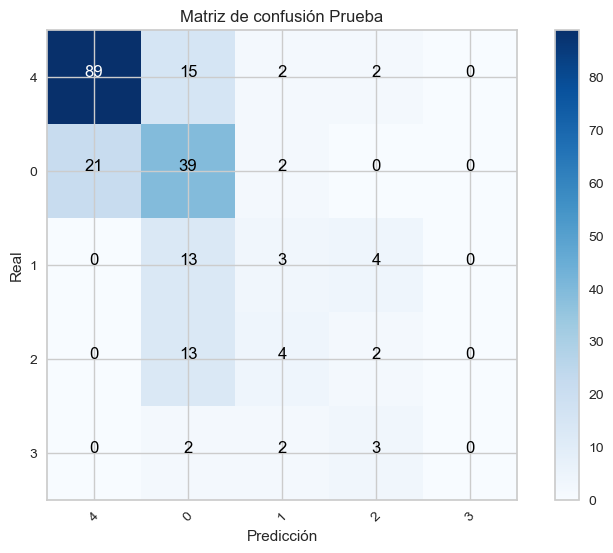

In [362]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                          RandomForestClassifier(random_state=1234,max_depth=10,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100))
report_and_conf_matrix(pipeline_rf,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

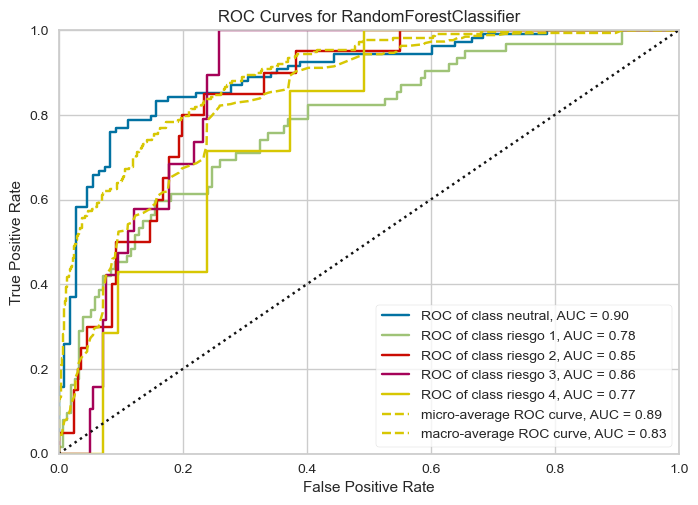

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('randomforestclassifier',
                                  RandomForestClassifier(max_depth=10,
                                                         min_samples_split=5,
                                                         random_state=1234))]))

In [363]:
pipeline_rf = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                          RandomForestClassifier(random_state=1234,max_depth=10,
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100))
plot_ROC_curve(pipeline_rf,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int), X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

### 7.7. Modelo de Gradient Boosting

Modelo con datos sin PCA

In [364]:

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1234)

classification_metrics(gb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

gb.fit(X_train['rem'],y_train['rem'])
print(gb.get_params())

Training Accuracy = 0.9603174603174603
Test Accuracy = 0.5833333333333334
Training Kappa = 0.9381223066629016
Test Kappa = 0.35228067837270516
Training Precision = [1.   0.94 0.96 1.   1.  ]
Test Precision = [0.   0.8  0.46 0.28 0.15]
Training recall = [1.   0.99 0.9  0.98 0.98]
Test recall = [0.   0.8  0.52 0.25 0.16]
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1234, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [365]:
#Tiempo aproximado: 15m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['rem'],y_train['rem'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.401 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.362 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.478 total time=   1.6s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.436 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.389 total time=   1.4s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.366 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.318 total time=   1.2s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.463 total time=   1.2s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_es

[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.393 total time=   2.7s
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.363 total time=   2.8s
[CV 1/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.354 total time=   2.0s
[CV 2/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.340 total time=   2.0s
[CV 3/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.427 total time=   1.9s
[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.429 total time=   1.9s
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.391 total time=   1.9s
[CV 1/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.352 total time=   2.4s
[CV 2/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.377 total time=  

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [366]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.2}

In [367]:
# El mejor modelo de Gradient Boosting
# Sin PCA
 

gb_clsfr = GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5)

model,metrics = classification_metrics(gb_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/GradientBoostingClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierRemMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.5879629629629629
Training Kappa = 1.0
Test Kappa = 0.352356567732372
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.8  0.46 0.17 0.15]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.82 0.52 0.2  0.11]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



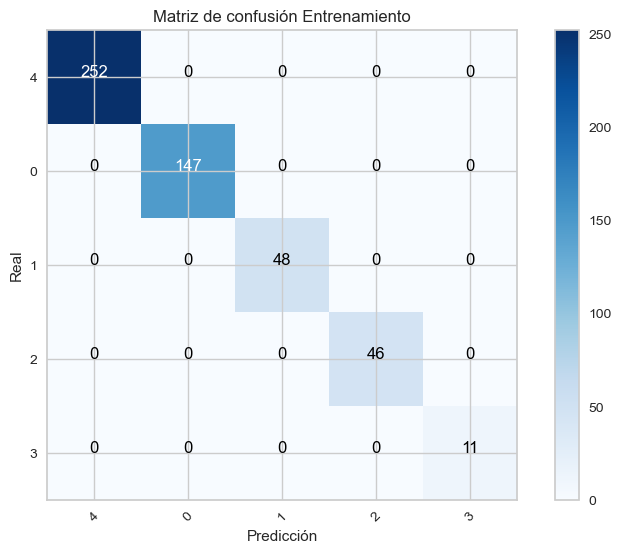

Reporte Prueba
              precision    recall  f1-score   support

           4       0.80      0.82      0.81       108
           0       0.46      0.52      0.49        62
           1       0.17      0.20      0.19        20
           2       0.15      0.11      0.12        19
           3       0.00      0.00      0.00         7

    accuracy                           0.59       216
   macro avg       0.32      0.33      0.32       216
weighted avg       0.56      0.59      0.57       216



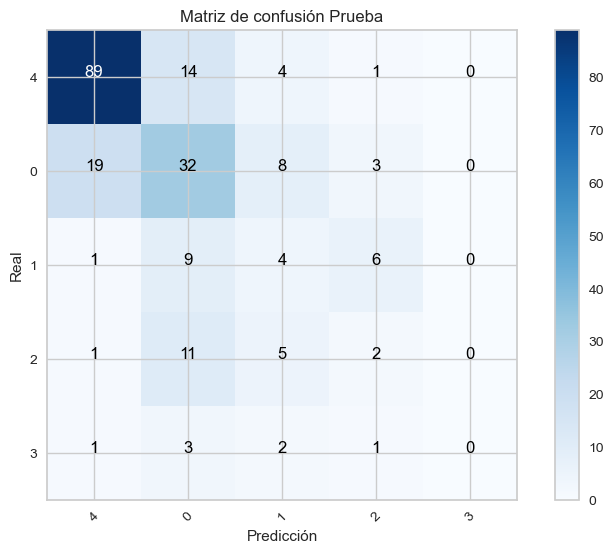

In [368]:
report_and_conf_matrix(GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

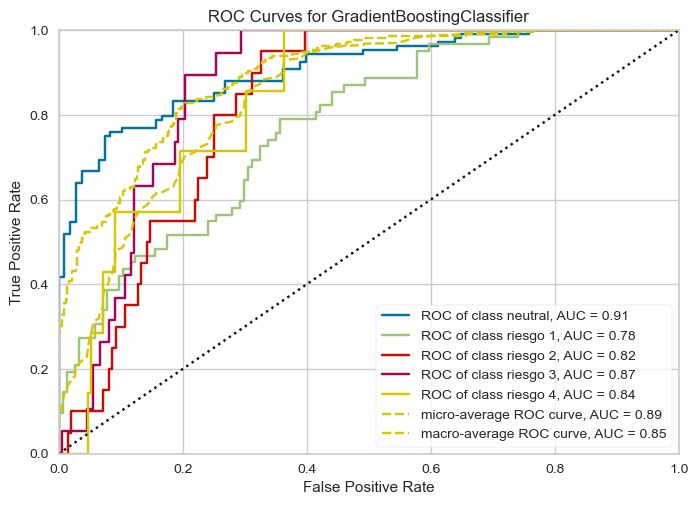

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=GradientBoostingClassifier(learning_rate=0.01, max_depth=6,
                                            n_estimators=1000,
                                            random_state=1234, subsample=0.5))

In [369]:
plot_ROC_curve(GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Conjunto de datos sin PCA y con feature selection

In [370]:
#Tiempo aproximado: 13m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['rem'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.401 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.362 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.478 total time=16.9min
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.436 total time=   1.4s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.389 total time=   1.3s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.366 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.318 total time=   1.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.463 total time=16.7min
[CV 4/5] END learning_rate=0.01, max_depth=4, n_es

[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.393 total time=   2.7s
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.363 total time=   2.7s
[CV 1/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.354 total time=16.8min
[CV 2/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.340 total time=   2.1s
[CV 3/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.427 total time=   1.9s
[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.429 total time=16.2min
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.391 total time=   2.1s
[CV 1/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.352 total time=   2.4s
[CV 2/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.377 total time= 8

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [371]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.2}

In [372]:
# El mejor modelo de Gradient Boosting sin PCA
# Con feature selection


pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5))

model,metrics = classification_metrics(pipeline_gb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/GradientBoostingClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierRemFSMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.5879629629629629
Training Kappa = 1.0
Test Kappa = 0.352356567732372
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.8  0.46 0.17 0.15]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.82 0.52 0.2  0.11]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



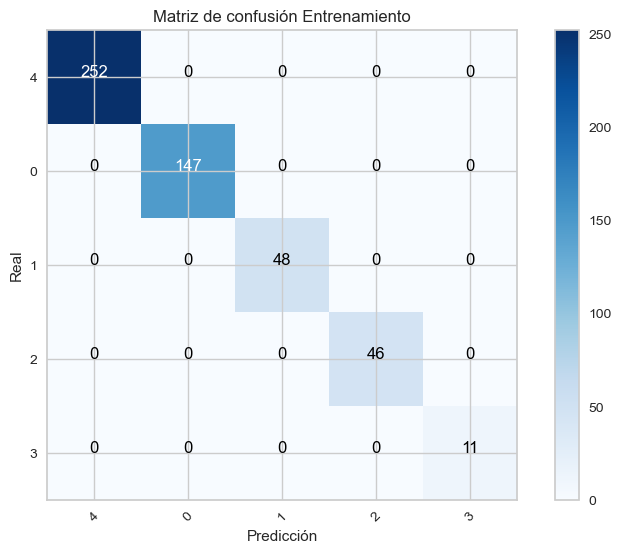

Reporte Prueba
              precision    recall  f1-score   support

           4       0.80      0.82      0.81       108
           0       0.46      0.52      0.49        62
           1       0.17      0.20      0.19        20
           2       0.15      0.11      0.12        19
           3       0.00      0.00      0.00         7

    accuracy                           0.59       216
   macro avg       0.32      0.33      0.32       216
weighted avg       0.56      0.59      0.57       216



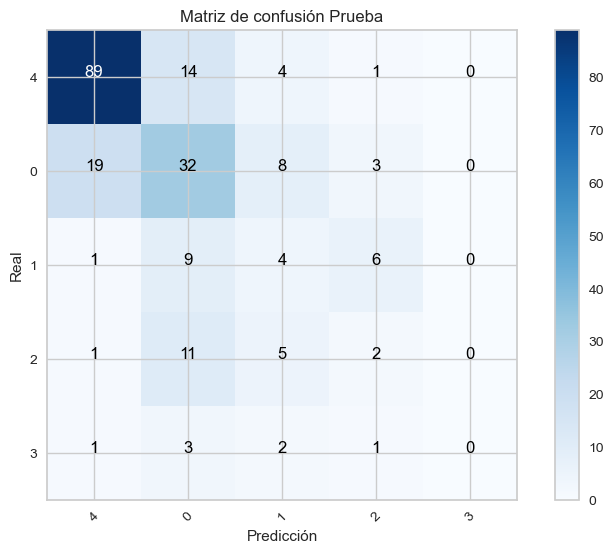

In [373]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5))
report_and_conf_matrix(pipeline_gb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

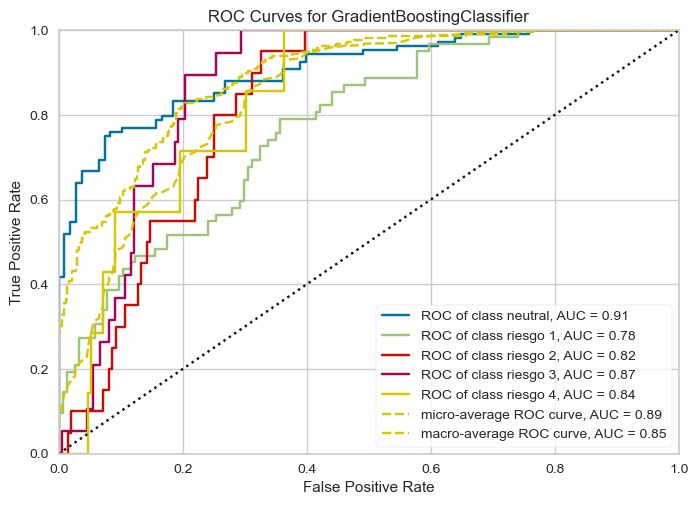

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=31)),
                                 ('gradientboostingclassifier',
                                  GradientBoostingClassifier(learning_rate=0.01,
                                                             max_depth=6,
                                                             n_estimators=1000,
                                                             random_state=1234,
                                                             subsample=0.5))]))

In [374]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.01, 
                                      max_depth=6, n_estimators=1000,subsample=0.5))
plot_ROC_curve(pipeline_gb,X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Modelo con PCA

In [375]:
#Tiempo aproximado: 17m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.425 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.360 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.500 total time=   1.5s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.393 total time=10.6min
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.310 total time=   1.6s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.448 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.339 total time=   1.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.533 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_es

[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.399 total time=   2.9s
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.301 total time=15.4min
[CV 1/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.369 total time=   1.9s
[CV 2/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.255 total time=16.9min
[CV 3/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.533 total time=   2.2s
[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.440 total time=   1.9s
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.302 total time=   1.9s
[CV 1/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.391 total time=17.1min
[CV 2/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.370 total time=  

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [376]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.2}

In [377]:
# El mejor modelo de Gradient Boosting
# Con PCA
 

gb_clsfr = GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=1000,subsample=0.5)

model,metrics = classification_metrics(gb_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/GradientBoostingClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierPCARemMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.6203703703703703
Training Kappa = 1.0
Test Kappa = 0.40709001439426906
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.81 0.49 0.29 0.35]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.81 0.56 0.2  0.42]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



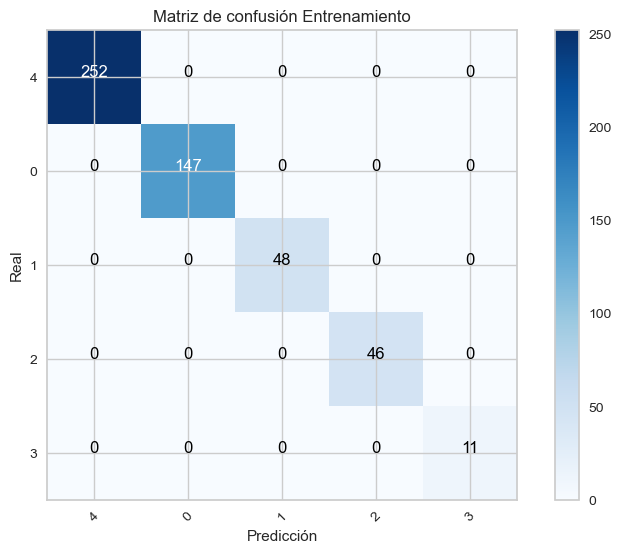

Reporte Prueba
              precision    recall  f1-score   support

           4       0.81      0.81      0.81       108
           0       0.49      0.56      0.53        62
           1       0.29      0.20      0.24        20
           2       0.35      0.42      0.38        19
           3       0.00      0.00      0.00         7

    accuracy                           0.62       216
   macro avg       0.39      0.40      0.39       216
weighted avg       0.60      0.62      0.61       216



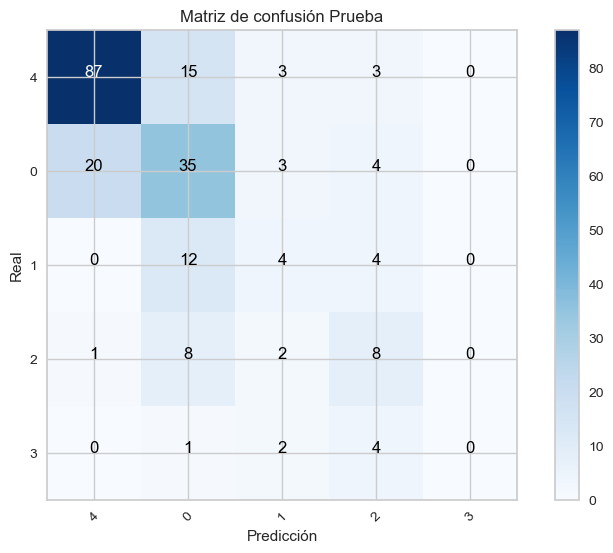

In [378]:
report_and_conf_matrix(GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=1000,subsample=0.5),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

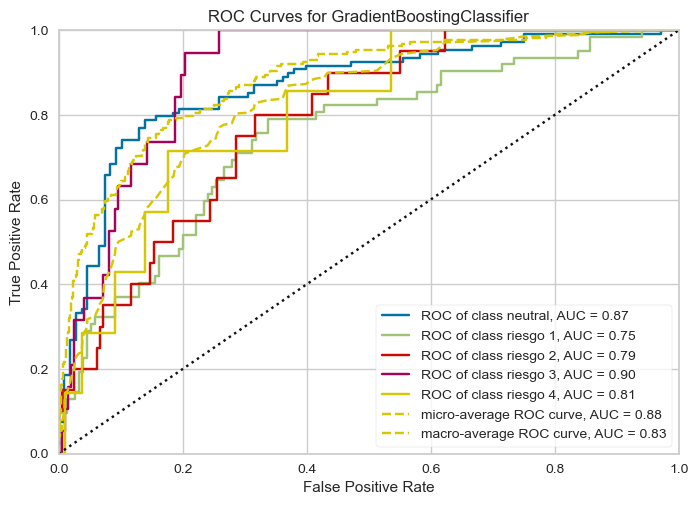

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=GradientBoostingClassifier(learning_rate=0.03, max_depth=4,
                                            n_estimators=1000,
                                            random_state=1234, subsample=0.5))

In [379]:
plot_ROC_curve(GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=1000,subsample=0.5),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

Modelo con PCA y feature selection

In [380]:
#Tiempo aproximado: 70m

params = {'learning_rate': [0.01,0.03],
                  'subsample'    : [0.5, 0.2],
                  'n_estimators' : [500,1000],
                  'max_depth'    : [4,6,8]    
            }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(GradientBoostingClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['pca_rem'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.425 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.360 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.500 total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.393 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5;, score=0.310 total time=   1.6s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.448 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.339 total time=   1.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.2;, score=0.533 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_es

[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.399 total time=   3.0s
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.5;, score=0.301 total time=   2.9s
[CV 1/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.369 total time=16.3min
[CV 2/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.255 total time=   1.9s
[CV 3/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.533 total time=   1.9s
[CV 4/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.440 total time=16.1min
[CV 5/5] END learning_rate=0.03, max_depth=4, n_estimators=1000, subsample=0.2;, score=0.302 total time=   2.0s
[CV 1/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.391 total time=   2.4s
[CV 2/5] END learning_rate=0.03, max_depth=6, n_estimators=500, subsample=0.5;, score=0.370 total time=15

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1234),
             param_grid={'learning_rate': [0.01, 0.03], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.2]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'),
             verbose=3)

In [381]:
tuning_model.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.2}

In [382]:
# El mejor modelo de Gradient Boosting
# Con PCA y feature selection
 
X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

gb_clsfr = GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=500,subsample=0.5)

model,metrics = classification_metrics(gb_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/GradientBoostingClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/GradientBoostingClassifierPCARemFSMetrics.pkl','wb'))

Training Accuracy = 1.0
Test Accuracy = 0.6203703703703703
Training Kappa = 1.0
Test Kappa = 0.40891039546137153
Training Precision = [1. 1. 1. 1. 1.]
Test Precision = [0.   0.81 0.48 0.29 0.42]
Training recall = [1. 1. 1. 1. 1.]
Test recall = [0.   0.79 0.58 0.25 0.42]


Reporte Entrenamiento
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       252
           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        11

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



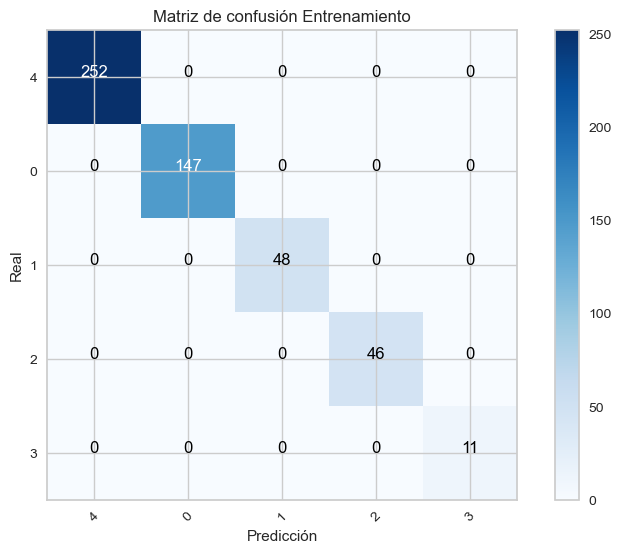

Reporte Prueba
              precision    recall  f1-score   support

           4       0.81      0.81      0.81       108
           0       0.49      0.58      0.53        62
           1       0.33      0.25      0.29        20
           2       0.38      0.42      0.40        19
           3       0.00      0.00      0.00         7

    accuracy                           0.63       216
   macro avg       0.40      0.41      0.41       216
weighted avg       0.61      0.63      0.62       216



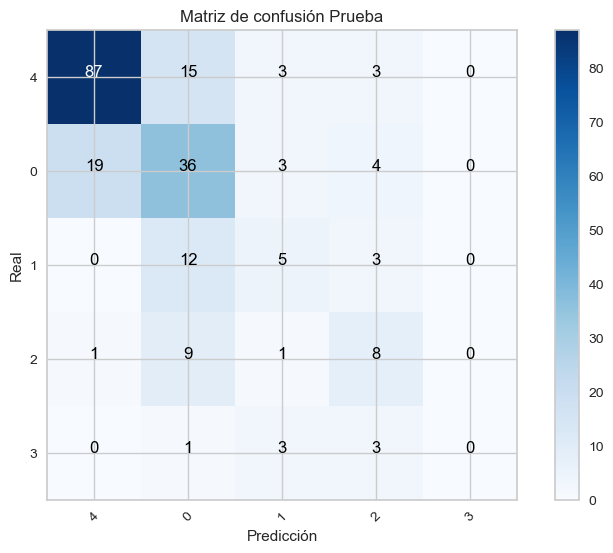

In [383]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=500,subsample=0.5))
report_and_conf_matrix(pipeline_gb,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

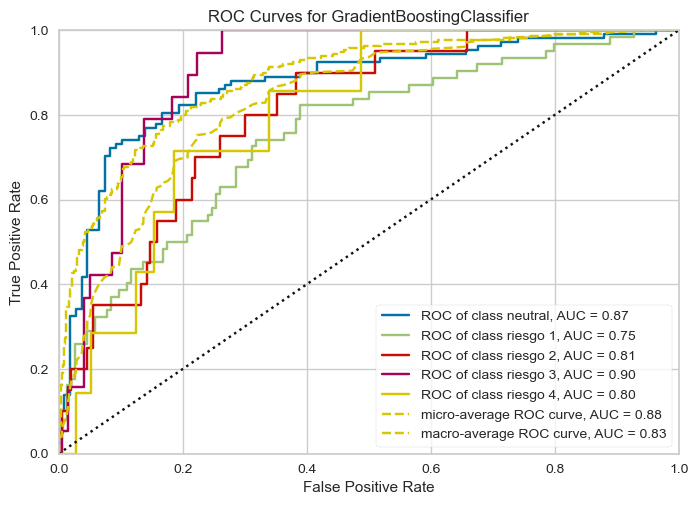

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'neutral', 1: 'riesgo 1', 2: 'riesgo 2', 3: 'riesgo 3',
                4: 'riesgo 4'},
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=27)),
                                 ('gradientboostingclassifier',
                                  GradientBoostingClassifier(learning_rate=0.03,
                                                             max_depth=4,
                                                             n_estimators=500,
                                                             random_state=1234,
                                                             subsample=0.5))]))

In [384]:
pipeline_gb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                           GradientBoostingClassifier(random_state=1234,learning_rate=0.03, 
                                      max_depth=4, n_estimators=500,subsample=0.5))
plot_ROC_curve(pipeline_gb,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

### 7.8. Modelo de XGBoost

In [385]:
y_train['rem']['target'].unique()

array([1, 0, 3, 2, 4])

Conjunto de datos sin PCA

In [386]:
# Tiempo aproximado: 7m

import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train['rem'] = le.fit_transform(y_train['rem'])
y_test['rem'] = le.transform(y_test['rem'])

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['rem'],y_train['rem'])

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_clsfr = xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1)

model,metrics = classification_metrics(xgb_clsfr,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/XGBoostClassifierRem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierRemMetrics.pkl','wb'))

In [ ]:
def plot_ROC_curve_xgb(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={0: 'riesgo negativo',
                                        1: 'neutral', 
                                        2: 'riesgo 1', 
                                        3: 'riesgo 2',
                                        4: 'riesgo 3'})                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

In [ ]:
tuning_model.best_params_

In [ ]:
report_and_conf_matrix(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1),
                       X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

In [ ]:
plot_ROC_curve_xgb(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1),
                X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Conjunto de datos sin PCA y feature selection

In [ ]:
# Tiempo aproximado: 7m

le = LabelEncoder()
y_train['rem'] = le.fit_transform(y_train['rem'])
y_test['rem'] = le.transform(y_test['rem'])

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

X_t = SelectKBest(score_func=f_classif,k=31).fit_transform(X_train['rem'],y_train['rem'])

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['rem'])

In [ ]:
tuning_model.best_params_

In [ ]:

pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1))

model,metrics = classification_metrics(pipeline_xgb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))
pickle.dump(model, open('models/XGBoostClassifierRemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierRemFSMetrics.pkl','wb'))

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1))

report_and_conf_matrix(pipeline_xgb,X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'].astype(int))

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=31),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=None,
                               n_estimators=500,
                               subsample=1))

plot_ROC_curve_xgb(pipeline_xgb,X_train=X_train['rem'], y_train=y_train['rem'],X_test=X_test['rem'], y_test=y_test['rem'].astype(int))

Conjunto de datos con PCA

In [ ]:
# Tiempo aproximado: 6m

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train['pca_rem'] = le.fit_transform(y_train['pca_rem'])
y_test['pca_rem'] = le.transform(y_test['pca_rem'])

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_train['pca_rem'],y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
xgb_clsfr = xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1)

model,metrics = classification_metrics(xgb_clsfr,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/XGBoostClassifierPCARem.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierPCARemMetrics.pkl','wb'))

In [ ]:
report_and_conf_matrix(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1),
                       X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
plot_ROC_curve_xgb(xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.3,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1),
                X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

Conjunto de datos con PCA y feature selection

In [ ]:
# Tiempo aproximado: 9m

params = {'learning_rate': [0.03,0.3],
                  'subsample'    : [1, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [None,5,7]    
            }

X_t = SelectKBest(score_func=f_classif,k=27).fit_transform(X_train['pca_rem'],y_train['pca_rem'])

tuning_model=GridSearchCV(xgb.XGBClassifier(random_state=1234),
                          param_grid=params,scoring=kappa_scorer,cv=5,verbose=3)
tuning_model.fit(X_t,y_train['pca_rem'])

In [ ]:
tuning_model.best_params_

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1))

model,metrics = classification_metrics(pipeline_xgb,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])
pickle.dump(model, open('models/XGBoostClassifierPCARemFS.pkl','wb'))
pickle.dump(metrics, open('metrics/XGBoostClassifierPCARemFSMetrics.pkl','wb'))

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1))

report_and_conf_matrix(pipeline_xgb,X_train['pca_rem'],X_test['pca_rem'],y_train['pca_rem'],y_test['pca_rem'])

In [ ]:
pipeline_xgb = make_pipeline(SelectKBest(score_func=f_classif,k=27),
                             xgb.XGBClassifier(random_state=1234,
                               learning_rate=0.03,
                               max_depth=7,
                               n_estimators=1000,
                               subsample=1))

plot_ROC_curve_xgb(pipeline_xgb,X_train=X_train['pca_rem'], y_train=y_train['pca_rem'].astype(int),X_test=X_test['pca_rem'], y_test=y_test['pca_rem'].astype(int))

### 8. Comparación de los distintos modelos

Cargamos las métricas de los modelos previamente guardados 

In [ ]:
metrics = list()
names = list()
metrics.append(pickle.load(open('metrics/logisticRegressionRemMetrics.pkl','rb')))
names.append('logisticRegressionRemMetrics')
metrics.append(pickle.load(open('metrics/logisticRegressionRemFSMetrics.pkl','rb')))
names.append('logisticRegressionRemFSMetrics')
metrics.append(pickle.load(open('metrics/logisticRegressionPCARemMetrics.pkl','rb')))
names.append('logisticRegressionPCARemMetrics')
metrics.append(pickle.load(open('metrics/logisticRegressionPCARemFSMetrics.pkl','rb')))
names.append('logisticRegressionPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/KnnClassifierRemMetrics.pkl','rb')))
names.append('KnnClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/KnnClassifierPCARemMetrics.pkl','rb')))
names.append('KnnClassifiePCARemMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierRemMetrics.pkl','rb')))
names.append('NBClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierRemFSMetrics.pkl','rb')))
names.append('NBClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierPCARemMetrics.pkl','rb')))
names.append('NBClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/NBClassifierPCARemFSMetrics.pkl','rb')))
names.append('NBClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierRemMetrics.pkl','rb')))
names.append('DecisionTreeClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierRemFSMetrics.pkl','rb')))
names.append('DecisionTreeClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierPCARemMetrics.pkl','rb')))
names.append('DecisionTreeClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/DecisionTreeClassifierPCARemFSMetrics.pkl','rb')))
names.append('DecisionTreeClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierRemMetrics.pkl','rb')))
names.append('RandomForestClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierRemFSMetrics.pkl','rb')))
names.append('RandomForestClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierPCARemMetrics.pkl','rb')))
names.append('RandomForestClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/RandomForestClassifierPCARemFSMetrics.pkl','rb')))
names.append('RandomForestClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierRemMetrics.pkl','rb')))
names.append('GradientBoostingClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierRemFSMetrics.pkl','rb')))
names.append('GradientBoostingClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierPCARemMetrics.pkl','rb')))
names.append('GradientBoostingClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/GradientBoostingClassifierPCARemFSMetrics.pkl','rb')))
names.append('GradientBoostingClassifierPCARemFSMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierRemMetrics.pkl','rb')))
names.append('XGBoostClassifierRemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierRemFSMetrics.pkl','rb')))
names.append('XGBoostClassifierRemFSMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierPCARemMetrics.pkl','rb')))
names.append('XGBoostClassifierPCARemMetrics')
metrics.append(pickle.load(open('metrics/XGBoostClassifierPCARemFSMetrics.pkl','rb')))
names.append('XGBoostClassifierPCARemFSMetrics')

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al Accuracy de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Accuracy'] for i in metrics])
ax.set(title='Accuracy de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Diagrama de barras para observar el modelo más importante de acuerdo al Kappa de prueba

fig, ax = plt.subplots()
fig.set_size_inches((20,20))
ax.bar(names, [i['Test Kappa'] for i in metrics])
ax.set(title='Kappa de prueba',xlabel='Modelos',ylabel='Score')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Se organizan los modelos de acuerdo a su Accuracy de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Accuracy'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Accuracy'])
for model in models:
    ranking = pd.concat([ranking, pd.DataFrame([{'Model':model[0],'Test Accuracy':model[1]['Test Accuracy']}])],ignore_index=True)
ranking

In [ ]:
# Se organizan los modelos de acuerdo a su Kappa de prueba

models = [(names[i],metrics[i]) for i in range(len(names))]
models = sorted(models,key=lambda x:x[1]['Test Kappa'],reverse=True)
ranking = pd.DataFrame(columns=['Model','Test Kappa'])
for model in models:
    ranking = pd.concat([ranking, pd.DataFrame([{'Model':model[0],'Test Kappa':model[1]['Test Kappa']}])],ignore_index=True)
ranking